In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
data = pd.read_csv('./Data/General_Preprocessed_Data.csv')

C:\Users\Admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (19,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loan_data = data.copy()

In [4]:
loan_data

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0       1077501    1296599       5000         5000           4975.0   
1       1077430    1314167       2500         2500           2500.0   
2       1077175    1313524       2400         2400           2400.0   
3       1076863    1277178      10000        10000          10000.0   
4       1075358    1311748       3000         3000           3000.0   
...         ...        ...        ...          ...              ...   
466280  8598660    1440975      18400        18400          18400.0   
466281  9684700   11536848      22000        22000          22000.0   
466282  9584776   11436914      20700        20700          20700.0   
466283  9604874   11457002       2000         2000           2000.0   
466284  9199665   11061576      10000        10000           9975.0   

              term  int_rate  installment grade sub_grade  ... addr_state:TX  \
0        36 months     10.65       162.87     B        B2  ...             0   
1        60 months     15.27        59.83     C        C4  ...             0   
2        36 months     15.96        84.33     C        C5  ...             0   
3        36 months     13.49       339.31     C        C1  ...             0   
4        60 months     12.69        67.79     B        B5  ...             0   
...            ...       ...          ...   ...       ...  ...           ...   
466280   60 months     14.47       432.64     C        C2  ...             1   
466281   60 months     19.97       582.50     D        D5  ...             0   
466282   60 months     16.99       514.34     D        D1  ...             0   
466283   36 months      7.90        62.59     A        A4  ...             0   
466284   36 months     19.20       367.58     D        D3  ...             0   

       addr_state:UT addr_state:VA  addr_state:VT addr_state:WA addr_state:WI  \
0                  0             0              0             0             0   
1                  0             0              0             0             0   
2                  0             0              0             0             0   
3                  0             0              0             0             0   
4                  0             0              0             0             0   
...              ...           ...            ...           ...           ...   
466280             0             0              0             0             0   
466281             0             0              0             0             0   
466282             0             0              0             0             0   
466283             0             0              0             0             0   
466284             0             0              0             0             0   

       addr_state:WV addr_state:WY initial_list_status:f initial_list_status:w  
0                  0             0                     1                     0  
1                  0             0                     1                     0  
2                  0             0                     1                     0  
3                  0             0                     1                     0  
4                  0             0                     1                     0  
...              ...           ...                   ...                   ...  
466280             0             0                     0                     1  
466281             0             0                     1                     0  
466282             0             0                     1                     0  
466283             0             0                     0                     1  
466284             0             0                     1                     0  

[466285 rows x 206 columns]

# PD Model

## Data Preparation for PD Model

### Dependent Variable. Good/ Bad (Default) Definition. Default and Non-default Accounts.

In [5]:
print(loan_data['loan_status'].nunique())
print(loan_data['loan_status'].unique())

9
['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']


In [6]:
loan_data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [7]:
print(loan_data['loan_status'].nunique())
print(loan_data['loan_status'].count())
print(len(loan_data['loan_status']))

9
466285
466285


In [8]:
# Get the proportion (percentage) for each loan status 
round(loan_data['loan_status'].value_counts() / loan_data['loan_status'].count(),3)

Current                                                0.481
Fully Paid                                             0.396
Charged Off                                            0.091
Late (31-120 days)                                     0.015
In Grace Period                                        0.007
Does not meet the credit policy. Status:Fully Paid     0.004
Late (16-30 days)                                      0.003
Default                                                0.002
Does not meet the credit policy. Status:Charged Off    0.002
Name: loan_status, dtype: float64

- Good / Non Default = 1
        Current, Fully Paid, In Grace Period, Does not meet the credit policy, Status:Fully Paid, Late (16-30 days)
- Bad / Default = 0
        Charged Off, Late (31-120 days), Default,  Does not meet the credit policy. Status:Charged Off

In [9]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Late (31-120 days)', 'Default',
                               'Does not meet the credit policy. Status:Charged Off']), 0, 1)

In [10]:
## Alternative syntax to make loan_data['good_bad']

# good_bad = []
# bad = ['Charged Off', 'Late (31-120 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off']

# for i in loan_data['loan_status']:
#     if i in bad:
#         good_bad.append(0)
#     else:
#         good_bad.append(1)
        
# loan_data['good_bad'] = good_bad

In [11]:
loan_data[['loan_status', 'good_bad']]

loan_status  good_bad
0        Fully Paid         1
1       Charged Off         0
2        Fully Paid         1
3        Fully Paid         1
4           Current         1
...             ...       ...
466280      Current         1
466281  Charged Off         0
466282      Current         1
466283   Fully Paid         1
466284      Current         1

[466285 rows x 2 columns]

In [12]:
loan_data['good_bad'].value_counts()

1    415317
0     50968
Name: good_bad, dtype: int64

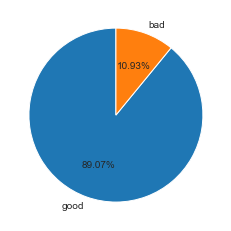

In [13]:
plt.pie(loan_data['good_bad'].value_counts(), autopct='%.2f%%', startangle=90,
       labels=['good','bad'])
plt.show()

In [14]:
len(loan_data.columns)

207

In [15]:
loan_data.shape

(466285, 207)

## Splitting Data
train_test_split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = loan_data.drop('good_bad', axis=1)
y = loan_data['good_bad']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [19]:
# loan_data_inputs_train
X_train.shape

(373028, 206)

In [20]:
# loan_data_targets_train
y_train.shape

(373028,)

In [21]:
# loan_data_inputs_test
X_test.shape

(93257, 206)

In [22]:
# # loan_data_targets_test
y_test.shape

(93257,)

## Data Preparation

**GOAL**

- Fine Classing Continuous variables. For Discrete variables don't need fine classing or splitting into categories because they are already categorical by definition
- Getting Weight od Evidence (WoE) & Information Value (IV) 

In [23]:
# df_inputs_prepr = loan_data.drop('good_bad',axis=1)
# df_targets_prepr = loan_data['good_bad']

In [24]:
## rename the data train

# df_inputs_prepr = X_train
# df_targets_prepr = y_train

df_inputs_prepr = X_test
df_targets_prepr = y_test

#### EXAMPLE

Let's start with a simple variable `grade`. We want to assess its explanatory power with respect to the outcome of interest that is being a good or a bad borrower.

In [25]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr],axis=1)
df1

grade  good_bad
362514     C         1
288564     E         1
213591     C         1
263083     C         1
165001     A         1
...      ...       ...
115        B         1
296284     B         1
61777      A         0
91763      A         1
167512     A         1

[93257 rows x 2 columns]

In [26]:
df1.groupby('grade', as_index=False).count() 

grade  good_bad
0     A     15108
1     B     27199
2     C     25048
3     D     15390
4     E      7145
5     F      2699
6     G       668

In [27]:
df1.groupby('grade', as_index=False).sum() 

grade  good_bad
0     A     14539
1     B     25107
2     C     22115
3     D     12994
4     E      5753
5     F      2093
6     G       466

In [28]:
df1.groupby('grade', as_index=False).sum()

grade  good_bad
0     A     14539
1     B     25107
2     C     22115
3     D     12994
4     E      5753
5     F      2093
6     G       466

In [29]:
df1.groupby('grade', as_index=False).sum()['good_bad'] / df1.groupby('grade', as_index=False).count()['good_bad']

0    0.962338
1    0.923085
2    0.882905
3    0.844314
4    0.805178
5    0.775472
6    0.697605
Name: good_bad, dtype: float64

In [30]:
df1.groupby('grade', as_index=False).mean() 

grade  good_bad
0     A  0.962338
1     B  0.923085
2     C  0.882905
3     D  0.844314
4     E  0.805178
5     F  0.775472
6     G  0.697605

In [31]:
df1 = pd.merge(df1.groupby('grade', as_index=False).count(), 
               df1.groupby('grade', as_index=False).mean(), on='grade')
df1

grade  good_bad_x  good_bad_y
0     A       15108    0.962338
1     B       27199    0.923085
2     C       25048    0.882905
3     D       15390    0.844314
4     E        7145    0.805178
5     F        2699    0.775472
6     G         668    0.697605

In [32]:
df1.columns = ['grade', 'n_obs', 'prop_good']
df1

grade  n_obs  prop_good
0     A  15108   0.962338
1     B  27199   0.923085
2     C  25048   0.882905
3     D  15390   0.844314
4     E   7145   0.805178
5     F   2699   0.775472
6     G    668   0.697605

In [33]:
df1['prop_bad'] = 1 - df1['prop_good']
df1

grade  n_obs  prop_good  prop_bad
0     A  15108   0.962338  0.037662
1     B  27199   0.923085  0.076915
2     C  25048   0.882905  0.117095
3     D  15390   0.844314  0.155686
4     E   7145   0.805178  0.194822
5     F   2699   0.775472  0.224528
6     G    668   0.697605  0.302395

In [34]:
df1['prop_n_obs'] = df1['n_obs']/df1['n_obs'].sum()*100 #multiply by 100 to make it percantage
df1

grade  n_obs  prop_good  prop_bad  prop_n_obs
0     A  15108   0.962338  0.037662   16.200392
1     B  27199   0.923085  0.076915   29.165639
2     C  25048   0.882905  0.117095   26.859110
3     D  15390   0.844314  0.155686   16.502783
4     E   7145   0.805178  0.194822    7.661623
5     F   2699   0.775472  0.224528    2.894153
6     G    668   0.697605  0.302395    0.716300

In [35]:
df1['n_obs']/df1['n_obs'].sum()*100

0    16.200392
1    29.165639
2    26.859110
3    16.502783
4     7.661623
5     2.894153
6     0.716300
Name: n_obs, dtype: float64

In [36]:
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = df1['prop_bad'] * df1['n_obs']
df1

grade  n_obs  prop_good  prop_bad  prop_n_obs   n_good   n_bad
0     A  15108   0.962338  0.037662   16.200392  14539.0   569.0
1     B  27199   0.923085  0.076915   29.165639  25107.0  2092.0
2     C  25048   0.882905  0.117095   26.859110  22115.0  2933.0
3     D  15390   0.844314  0.155686   16.502783  12994.0  2396.0
4     E   7145   0.805178  0.194822    7.661623   5753.0  1392.0
5     F   2699   0.775472  0.224528    2.894153   2093.0   606.0
6     G    668   0.697605  0.302395    0.716300    466.0   202.0

In [37]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()*100 #multiply by 100 to make it percantage
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()*100 #multiply by 100 to make it percantage
df1

grade  n_obs  prop_good  prop_bad  prop_n_obs   n_good   n_bad  prop_n_good  \
0     A  15108   0.962338  0.037662   16.200392  14539.0   569.0    17.502739   
1     B  27199   0.923085  0.076915   29.165639  25107.0  2092.0    30.224999   
2     C  25048   0.882905  0.117095   26.859110  22115.0  2933.0    26.623087   
3     D  15390   0.844314  0.155686   16.502783  12994.0  2396.0    15.642794   
4     E   7145   0.805178  0.194822    7.661623   5753.0  1392.0     6.925735   
5     F   2699   0.775472  0.224528    2.894153   2093.0   606.0     2.519653   
6     G    668   0.697605  0.302395    0.716300    466.0   202.0     0.560993   

   prop_n_bad  
0    5.583906  
1   20.529931  
2   28.783121  
3   23.513248  
4   13.660451  
5    5.947007  
6    1.982336

In [38]:
df1['WoE'] = np.log(df1['prop_n_good']/df1['prop_n_bad'])
df1 = df1.sort_values('WoE')
df1 = df1.reset_index(drop=True)
df1
# In this way we'll see the categories where borrowers have the highest default rate first.

grade  n_obs  prop_good  prop_bad  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668   0.697605  0.302395    0.716300    466.0   202.0     0.560993   
1     F   2699   0.775472  0.224528    2.894153   2093.0   606.0     2.519653   
2     E   7145   0.805178  0.194822    7.661623   5753.0  1392.0     6.925735   
3     D  15390   0.844314  0.155686   16.502783  12994.0  2396.0    15.642794   
4     C  25048   0.882905  0.117095   26.859110  22115.0  2933.0    26.623087   
5     B  27199   0.923085  0.076915   29.165639  25107.0  2092.0    30.224999   
6     A  15108   0.962338  0.037662   16.200392  14539.0   569.0    17.502739   

   prop_n_bad       WoE  
0    1.982336 -1.262323  
1    5.947007 -0.858767  
2   13.660451 -0.679261  
3   23.513248 -0.407554  
4   28.783121 -0.078010  
5   20.529931  0.386785  
6    5.583906  1.142469

In [39]:
df1['IV'] = df1['WoE'] * (df1['prop_n_good'] - df1['prop_n_bad'])/100 #devided by 100 to keep it in range 0-1
df1['sum_IV'] = df1['IV'].sum()
df1

grade  n_obs  prop_good  prop_bad  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668   0.697605  0.302395    0.716300    466.0   202.0     0.560993   
1     F   2699   0.775472  0.224528    2.894153   2093.0   606.0     2.519653   
2     E   7145   0.805178  0.194822    7.661623   5753.0  1392.0     6.925735   
3     D  15390   0.844314  0.155686   16.502783  12994.0  2396.0    15.642794   
4     C  25048   0.882905  0.117095   26.859110  22115.0  2933.0    26.623087   
5     B  27199   0.923085  0.076915   29.165639  25107.0  2092.0    30.224999   
6     A  15108   0.962338  0.037662   16.200392  14539.0   569.0    17.502739   

   prop_n_bad       WoE        IV    sum_IV  
0    1.982336 -1.262323  0.017942  0.300551  
1    5.947007 -0.858767  0.029433  0.300551  
2   13.660451 -0.679261  0.045746  0.300551  
3   23.513248 -0.407554  0.032076  0.300551  
4   28.783121 -0.078010  0.001685  0.300551  
5   20.529931  0.386785  0.037499  0.300551  
6    5.583906  1.142469  0.136169  0.300551

`grade` has Information value 0.288636. it means `grade` has moderate predictive powers to the dependent variable (good_bad)

## Preprocessing Discrete Variables: Automating Calculations
Creating Function to simplify the step above & apply it to the all features with deiscrete variable

In [40]:
def Woe_IV_discrete (df_predictor, feature_name, df_target):
    df = pd.concat([df_predictor[feature_name], df_target],axis=1)
    df = pd.merge(df.groupby(feature_name, as_index=False).count(), 
               df.groupby(feature_name, as_index=False).mean(), on=feature_name)
    df.columns = [feature_name, 'n_obs', 'prop_good']
    
    df['prop_bad'] = 1 - df['prop_good']
    
    #prop_n_obs
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()*100
    
    #n_good & n_bad
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = df['prop_bad'] * df['n_obs']
    
    #prop_n_good & prop_n_bad
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()*100
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()*100
    
    #WoE
    df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
    df = df.sort_values('WoE')
    df = df.reset_index(drop=True)
    
    #IV
    df['IV'] = df['WoE'] * (df['prop_n_good'] - df['prop_n_bad'])/100
    df['sum_IV'] = df['IV'].sum()
    

    
    return df

In [41]:
df_WoE_IV_grade = Woe_IV_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_WoE_IV_grade

grade  n_obs  prop_good  prop_bad  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668   0.697605  0.302395    0.716300    466.0   202.0     0.560993   
1     F   2699   0.775472  0.224528    2.894153   2093.0   606.0     2.519653   
2     E   7145   0.805178  0.194822    7.661623   5753.0  1392.0     6.925735   
3     D  15390   0.844314  0.155686   16.502783  12994.0  2396.0    15.642794   
4     C  25048   0.882905  0.117095   26.859110  22115.0  2933.0    26.623087   
5     B  27199   0.923085  0.076915   29.165639  25107.0  2092.0    30.224999   
6     A  15108   0.962338  0.037662   16.200392  14539.0   569.0    17.502739   

   prop_n_bad       WoE        IV    sum_IV  
0    1.982336 -1.262323  0.017942  0.300551  
1    5.947007 -0.858767  0.029433  0.300551  
2   13.660451 -0.679261  0.045746  0.300551  
3   23.513248 -0.407554  0.032076  0.300551  
4   28.783121 -0.078010  0.001685  0.300551  
5   20.529931  0.386785  0.037499  0.300551  
6    5.583906  1.142469  0.136169  0.300551

In [42]:
df_WoE_IV_Home = Woe_IV_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_WoE_IV_Home

home_ownership  n_obs  prop_good  prop_bad  prop_n_obs   n_good   n_bad  \
0          OTHER     45   0.777778  0.222222    0.048254     35.0    10.0   
1           NONE     10   0.800000  0.200000    0.010723      8.0     2.0   
2           RENT  37874   0.874003  0.125997   40.612501  33102.0  4772.0   
3            OWN   8409   0.888572  0.111428    9.017017   7472.0   937.0   
4       MORTGAGE  46919   0.904751  0.095249   50.311505  42450.0  4469.0   

   prop_n_good  prop_n_bad       WoE        IV    sum_IV  
0     0.042135    0.098135 -0.845478  0.000473  0.022938  
1     0.009631    0.019627 -0.711946  0.000071  0.022938  
2    39.849760   46.830226 -0.161412  0.011267  0.022938  
3     8.995148    9.195289 -0.022006  0.000044  0.022938  
4    51.103326   43.856722  0.152922  0.011082  0.022938

In [43]:
df_WoE_IV_VerifStat = Woe_IV_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_WoE_IV_VerifStat

verification_status  n_obs  prop_good  prop_bad  prop_n_obs   n_good  \
0            Verified  33641   0.872031  0.127969   36.073431  29336.0   
1     Source Verified  29963   0.895738  0.104262   32.129492  26839.0   
2        Not Verified  29653   0.906890  0.093110   31.797077  26892.0   

    n_bad  prop_n_good  prop_n_bad       WoE        IV    sum_IV  
0  4305.0    35.316070   42.247301 -0.179202  0.012421  0.022684  
1  3124.0    32.310063   30.657507  0.052501  0.000868  0.022684  
2  2761.0    32.373867   27.095191  0.177995  0.009396  0.022684

In [44]:
df_WoE_IV_purpose = Woe_IV_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_WoE_IV_purpose

purpose  n_obs  prop_good  prop_bad  prop_n_obs   n_good  \
0          educational     89   0.752809  0.247191    0.095435     67.0   
1     renewable_energy     70   0.771429  0.228571    0.075061     54.0   
2       small_business   1431   0.777079  0.222921    1.534469   1112.0   
3              medical    918   0.857298  0.142702    0.984377    787.0   
4                house    439   0.858770  0.141230    0.470742    377.0   
5                other   4806   0.861007  0.138993    5.153501   4138.0   
6              wedding    456   0.864035  0.135965    0.488971    394.0   
7               moving    602   0.878738  0.121262    0.645528    529.0   
8             vacation    496   0.881048  0.118952    0.531864    437.0   
9   debt_consolidation  55012   0.885916  0.114084   58.989674  48736.0   
10      major_purchase   1991   0.900552  0.099448    2.134960   1793.0   
11    home_improvement   5299   0.906397  0.093603    5.682147   4803.0   
12                 car   1072   0.916045  0.083955    1.149512    982.0   
13         credit_card  20576   0.916505  0.083495   22.063759  18858.0   

     n_bad  prop_n_good  prop_n_bad       WoE        IV    sum_IV  
0     22.0     0.080658    0.215898 -0.984590  0.001332  0.045124  
1     16.0     0.065008    0.157017 -0.881845  0.000811  0.045124  
2    319.0     1.338678    3.130520 -0.849516  0.015222  0.045124  
3    131.0     0.947428    1.285574 -0.305210  0.001032  0.045124  
4     62.0     0.453851    0.608440 -0.293130  0.000453  0.045124  
5    668.0     4.981521    6.555447 -0.274561  0.004321  0.045124  
6     62.0     0.474316    0.608440 -0.249024  0.000334  0.045124  
7     73.0     0.636835    0.716389 -0.117712  0.000094  0.045124  
8     59.0     0.526081    0.578999 -0.095845  0.000051  0.045124  
9   6276.0    58.670712   61.589794 -0.048556  0.001417  0.045124  
10   198.0     2.158499    1.943081  0.105138  0.000226  0.045124  
11   496.0     5.782080    4.867517  0.172179  0.001575  0.045124  
12    90.0     1.182178    0.883219  0.291541  0.000872  0.045124  
13  1718.0    22.702156   16.859666  0.297536  0.017383  0.045124

In [45]:
df_WoE_IV_addrState = Woe_IV_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_WoE_IV_addrState

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


addr_state  n_obs  prop_good  prop_bad  prop_n_obs   n_good   n_bad  \
0          NE      1   0.000000  1.000000    0.001072      0.0     1.0   
1          ID      2   0.500000  0.500000    0.002145      1.0     1.0   
2          NV   1298   0.855932  0.144068    1.391853   1111.0   187.0   
3          HI    486   0.860082  0.139918    0.521141    418.0    68.0   
4          FL   6426   0.870059  0.129941    6.890636   5591.0   835.0   
5          AL   1182   0.873096  0.126904    1.267465   1032.0   150.0   
6          NJ   3676   0.875408  0.124592    3.941795   3218.0   458.0   
7          LA   1130   0.876106  0.123894    1.211705    990.0   140.0   
8          NY   8031   0.879965  0.120035    8.611686   7067.0   964.0   
9          RI    403   0.880893  0.119107    0.432139    355.0    48.0   
10         NC   2478   0.881759  0.118241    2.657173   2185.0   293.0   
11         MI   2358   0.882103  0.117897    2.528497   2080.0   278.0   
12         DE    208   0.884615  0.115385    0.223040    184.0    24.0   
13         MD   2203   0.884703  0.115297    2.362289   1949.0   254.0   
14         OK    833   0.885954  0.114046    0.893231    738.0    95.0   
15         MO   1491   0.885983  0.114017    1.598808   1321.0   170.0   
16         AR    728   0.887363  0.112637    0.780638    646.0    82.0   
17         PA   3334   0.888122  0.111878    3.575067   2961.0   373.0   
18         SD    179   0.888268  0.111732    0.191943    159.0    20.0   
19         AZ   2067   0.888728  0.111272    2.216456   1837.0   230.0   
20         NM    513   0.888889  0.111111    0.550093    456.0    57.0   
21         CA  14251   0.889411  0.110589   15.281427  12675.0  1576.0   
22         MA   2214   0.893857  0.106143    2.374085   1979.0   235.0   
23         GA   3015   0.893864  0.106136    3.233001   2695.0   320.0   
24         IN   1315   0.894297  0.105703    1.410082   1176.0   139.0   
25         VA   2856   0.894958  0.105042    3.062505   2556.0   300.0   
26         NH    402   0.895522  0.104478    0.431067    360.0    42.0   
27         OH   3102   0.895551  0.104449    3.326292   2778.0   324.0   
28         UT    672   0.895833  0.104167    0.720589    602.0    70.0   
29         WI   1171   0.896670  0.103330    1.255670   1050.0   121.0   
30         MN   1632   0.897059  0.102941    1.750003   1464.0   168.0   
31         WA   2145   0.899767  0.100233    2.300095   1930.0   215.0   
32         CO   1916   0.906054  0.093946    2.054537   1736.0   180.0   
33         TX   7281   0.906057  0.093943    7.807457   6597.0   684.0   
34         SC   1135   0.906608  0.093392    1.217067   1029.0   106.0   
35         TN   1139   0.906936  0.093064    1.221356   1033.0   106.0   
36         OR   1135   0.907489  0.092511    1.217067   1030.0   105.0   
37         IL   3779   0.908706  0.091294    4.052243   3434.0   345.0   
38         KY    851   0.909518  0.090482    0.912532    774.0    77.0   
39         CT   1429   0.909727  0.090273    1.532325   1300.0   129.0   
40         WV    486   0.917695  0.082305    0.521141    446.0    40.0   
41         WY    209   0.918660  0.081340    0.224112    192.0    17.0   
42         AK    248   0.919355  0.080645    0.265932    228.0    20.0   
43         KS    830   0.920482  0.079518    0.890014    764.0    66.0   
44         VT    178   0.921348  0.078652    0.190870    164.0    14.0   
45         DC    297   0.922559  0.077441    0.318475    274.0    23.0   
46         MS    246   0.922764  0.077236    0.263787    227.0    19.0   
47         MT    293   0.928328  0.071672    0.314186    272.0    21.0   
48         ME      2   1.000000  0.000000    0.002145      2.0     0.0   
49         IA      1   1.000000  0.000000    0.001072      1.0     0.0   

    prop_n_good  prop_n_bad       WoE        IV  sum_IV  
0      0.000000    0.009814      -inf       inf     inf  
1      0.001204    0.009814 -2.098241  0.000181     inf  
2      1.337475    1.835132 -0.316333  0.001574     in

In [46]:
df_WoE_IV_initListStat = Woe_IV_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_WoE_IV_initListStat

initial_list_status  n_obs  prop_good  prop_bad  prop_n_obs   n_good  \
0                   f  60491   0.879685  0.120315   64.864836  53213.0   
1                   w  32766   0.911127  0.088873   35.135164  29854.0   

    n_bad  prop_n_good  prop_n_bad       WoE        IV    sum_IV  
0  7278.0    64.060337   71.422964 -0.108794  0.008010  0.024888  
1  2912.0    35.939663   28.577036  0.229238  0.016878  0.024888

## Preprocessing Discrete Variables: Visualizing Results

For these dummy variables, we always keep the category with the worst credit risk as a reference category.

In [47]:
def plot_by_woe(func_WoE_IV, rotation_of_x_axis_labels = 0):
    #create df variable for func_IV into 
    df_plot = func_WoE_IV
    
    #plotting
    plt.figure(figsize=(16,6))
    plt.title(f'Weight of Evidence by "{df_plot.columns[0]}"',size=14, fontweight='bold')
    x = np.array(df_plot.iloc[:, 0].apply(str))
    y = df_plot['WoE']
    plt.plot(x, y, '--o')
    plt.xlabel(df_plot.columns[0], size=12)
    plt.ylabel('Weight of Evidence', size=12)
    plt.xticks(rotation = rotation_of_x_axis_labels)
    plt.show()

### `grade`

In [48]:
df_WoE_IV_grade

grade  n_obs  prop_good  prop_bad  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668   0.697605  0.302395    0.716300    466.0   202.0     0.560993   
1     F   2699   0.775472  0.224528    2.894153   2093.0   606.0     2.519653   
2     E   7145   0.805178  0.194822    7.661623   5753.0  1392.0     6.925735   
3     D  15390   0.844314  0.155686   16.502783  12994.0  2396.0    15.642794   
4     C  25048   0.882905  0.117095   26.859110  22115.0  2933.0    26.623087   
5     B  27199   0.923085  0.076915   29.165639  25107.0  2092.0    30.224999   
6     A  15108   0.962338  0.037662   16.200392  14539.0   569.0    17.502739   

   prop_n_bad       WoE        IV    sum_IV  
0    1.982336 -1.262323  0.017942  0.300551  
1    5.947007 -0.858767  0.029433  0.300551  
2   13.660451 -0.679261  0.045746  0.300551  
3   23.513248 -0.407554  0.032076  0.300551  
4   28.783121 -0.078010  0.001685  0.300551  
5   20.529931  0.386785  0.037499  0.300551  
6    5.583906  1.142469  0.136169  0.300551

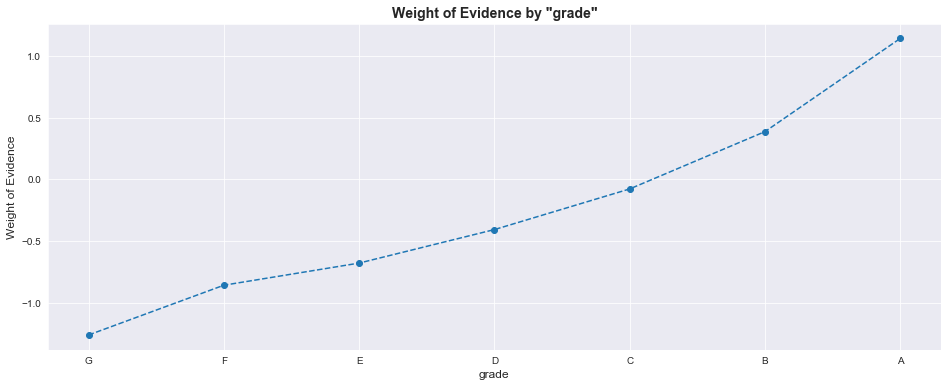

In [49]:
plot_by_woe(Woe_IV_discrete(df_inputs_prepr, 'grade', df_targets_prepr),0)

grade:G as reference category

### `home_ownership`

In [50]:
df_WoE_IV_Home

home_ownership  n_obs  prop_good  prop_bad  prop_n_obs   n_good   n_bad  \
0          OTHER     45   0.777778  0.222222    0.048254     35.0    10.0   
1           NONE     10   0.800000  0.200000    0.010723      8.0     2.0   
2           RENT  37874   0.874003  0.125997   40.612501  33102.0  4772.0   
3            OWN   8409   0.888572  0.111428    9.017017   7472.0   937.0   
4       MORTGAGE  46919   0.904751  0.095249   50.311505  42450.0  4469.0   

   prop_n_good  prop_n_bad       WoE        IV    sum_IV  
0     0.042135    0.098135 -0.845478  0.000473  0.022938  
1     0.009631    0.019627 -0.711946  0.000071  0.022938  
2    39.849760   46.830226 -0.161412  0.011267  0.022938  
3     8.995148    9.195289 -0.022006  0.000044  0.022938  
4    51.103326   43.856722  0.152922  0.011082  0.022938

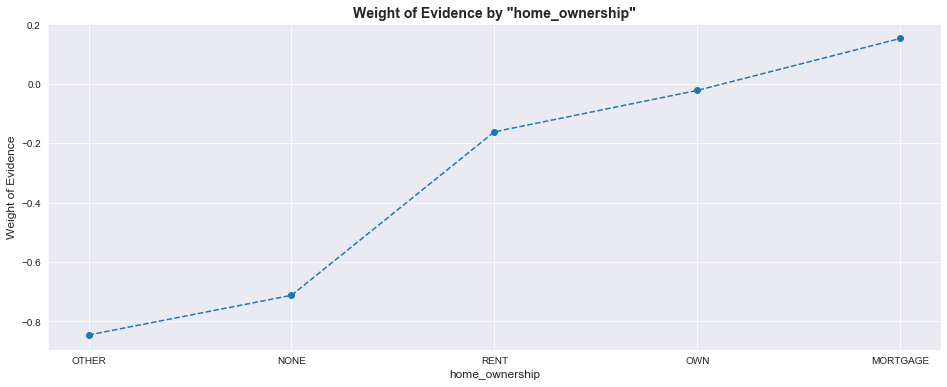

In [51]:
plot_by_woe(df_WoE_IV_Home,0)

- Categories OTHER & NONE are as associated with highest probability of deafault
- But these 2 categories had very low number of observation. the proportion is less than 0.1% each.
- WoE could not be calculated for Category ANY because there is only one observation with this home ownership status.
- It really doesn't make sense to have dummy variables for these categories so we don't want to have dummies for them but we don't want to remove them either because that would imply losing the information about these customers.
- In Such cases, we combine underrepresented categories that are similar to them.
- Combine OTHER, NONE, ANY with the riskiest category with enough number of observations wich is category RENT. 
    - RENT has similar/closer WOE to OTHER & NONE (negative value of WoE) and has good amount number of observation

In [52]:
df_inputs_prepr['home_ownership:RENT'].sum()

37874

In [53]:
sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER']]).sum()

37919

In [54]:
# Combine RENT, OTHER, NONE, ANY
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], 
                                                             df_inputs_prepr['home_ownership:OTHER'],
                                                             df_inputs_prepr['home_ownership:NONE'],
                                                             df_inputs_prepr['home_ownership:ANY']])

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [55]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'].value_counts()

0    55328
1    37929
Name: home_ownership:RENT_OTHER_NONE_ANY, dtype: int64

Reference Category : 'home_ownership:RENT_OTHER_NONE_ANY'

### `addr_state`

In [56]:
df_WoE_IV_addrState

addr_state  n_obs  prop_good  prop_bad  prop_n_obs   n_good   n_bad  \
0          NE      1   0.000000  1.000000    0.001072      0.0     1.0   
1          ID      2   0.500000  0.500000    0.002145      1.0     1.0   
2          NV   1298   0.855932  0.144068    1.391853   1111.0   187.0   
3          HI    486   0.860082  0.139918    0.521141    418.0    68.0   
4          FL   6426   0.870059  0.129941    6.890636   5591.0   835.0   
5          AL   1182   0.873096  0.126904    1.267465   1032.0   150.0   
6          NJ   3676   0.875408  0.124592    3.941795   3218.0   458.0   
7          LA   1130   0.876106  0.123894    1.211705    990.0   140.0   
8          NY   8031   0.879965  0.120035    8.611686   7067.0   964.0   
9          RI    403   0.880893  0.119107    0.432139    355.0    48.0   
10         NC   2478   0.881759  0.118241    2.657173   2185.0   293.0   
11         MI   2358   0.882103  0.117897    2.528497   2080.0   278.0   
12         DE    208   0.884615  0.115385    0.223040    184.0    24.0   
13         MD   2203   0.884703  0.115297    2.362289   1949.0   254.0   
14         OK    833   0.885954  0.114046    0.893231    738.0    95.0   
15         MO   1491   0.885983  0.114017    1.598808   1321.0   170.0   
16         AR    728   0.887363  0.112637    0.780638    646.0    82.0   
17         PA   3334   0.888122  0.111878    3.575067   2961.0   373.0   
18         SD    179   0.888268  0.111732    0.191943    159.0    20.0   
19         AZ   2067   0.888728  0.111272    2.216456   1837.0   230.0   
20         NM    513   0.888889  0.111111    0.550093    456.0    57.0   
21         CA  14251   0.889411  0.110589   15.281427  12675.0  1576.0   
22         MA   2214   0.893857  0.106143    2.374085   1979.0   235.0   
23         GA   3015   0.893864  0.106136    3.233001   2695.0   320.0   
24         IN   1315   0.894297  0.105703    1.410082   1176.0   139.0   
25         VA   2856   0.894958  0.105042    3.062505   2556.0   300.0   
26         NH    402   0.895522  0.104478    0.431067    360.0    42.0   
27         OH   3102   0.895551  0.104449    3.326292   2778.0   324.0   
28         UT    672   0.895833  0.104167    0.720589    602.0    70.0   
29         WI   1171   0.896670  0.103330    1.255670   1050.0   121.0   
30         MN   1632   0.897059  0.102941    1.750003   1464.0   168.0   
31         WA   2145   0.899767  0.100233    2.300095   1930.0   215.0   
32         CO   1916   0.906054  0.093946    2.054537   1736.0   180.0   
33         TX   7281   0.906057  0.093943    7.807457   6597.0   684.0   
34         SC   1135   0.906608  0.093392    1.217067   1029.0   106.0   
35         TN   1139   0.906936  0.093064    1.221356   1033.0   106.0   
36         OR   1135   0.907489  0.092511    1.217067   1030.0   105.0   
37         IL   3779   0.908706  0.091294    4.052243   3434.0   345.0   
38         KY    851   0.909518  0.090482    0.912532    774.0    77.0   
39         CT   1429   0.909727  0.090273    1.532325   1300.0   129.0   
40         WV    486   0.917695  0.082305    0.521141    446.0    40.0   
41         WY    209   0.918660  0.081340    0.224112    192.0    17.0   
42         AK    248   0.919355  0.080645    0.265932    228.0    20.0   
43         KS    830   0.920482  0.079518    0.890014    764.0    66.0   
44         VT    178   0.921348  0.078652    0.190870    164.0    14.0   
45         DC    297   0.922559  0.077441    0.318475    274.0    23.0   
46         MS    246   0.922764  0.077236    0.263787    227.0    19.0   
47         MT    293   0.928328  0.071672    0.314186    272.0    21.0   
48         ME      2   1.000000  0.000000    0.002145      2.0     0.0   
49         IA      1   1.000000  0.000000    0.001072      1.0     0.0   

    prop_n_good  prop_n_bad       WoE        IV  sum_IV  
0      0.000000    0.009814      -inf       inf     inf  
1      0.001204    0.009814 -2.098241  0.000181     inf  
2      1.337475    1.835132 -0.316333  0.001574     in

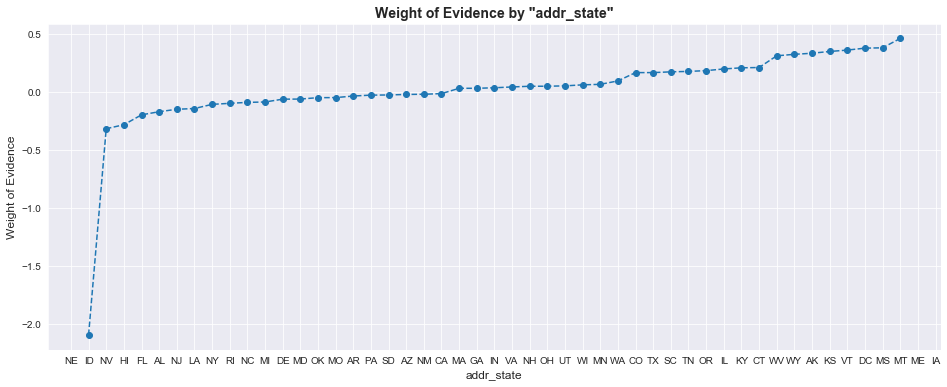

In [57]:
plot_by_woe(df_WoE_IV_addrState,0)

There are no borrowers in our dataset from one of the sates : North Dakota (ND)

In [58]:
# Create categories for ND just incase there are some borrower in the future
# We dont have any info/data for ND, thus we assume it as high risk. finally impute as default(0)
if 'addr_state:ND' in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [59]:
df_inputs_prepr['addr_state:ND']

362514    0
288564    0
213591    0
263083    0
165001    0
         ..
115       0
296284    0
61777     0
91763     0
167512    0
Name: addr_state:ND, Length: 93257, dtype: int64

- NE & IA have extreme low WoE & low number of observation, thus we will make combine them into same category/dummy
- ME & ID have extrem high WoE, probably it caused by very low number of observation, thus we will keep it mind later.

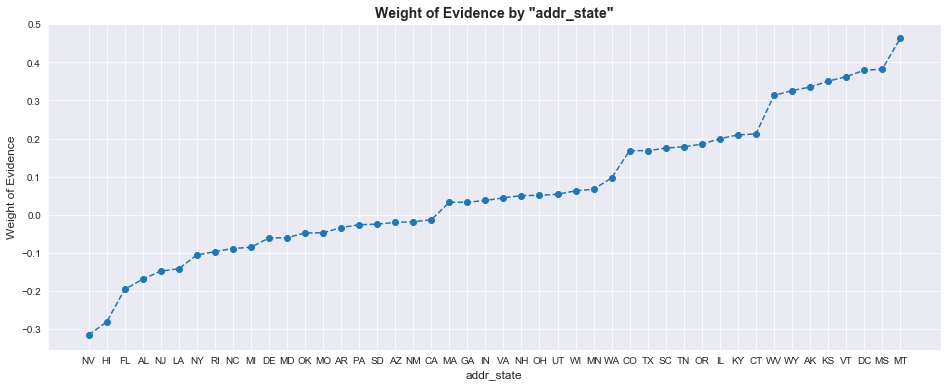

In [60]:
#lets see the plot without NE, IA, ME, ID
plot_by_woe(df_WoE_IV_addrState.iloc[2:-2, : ])

- Now we get different perspective from this plot(without NE, IA, ME, ID) compare to plot before.
- NV has lowest WoE
- FL, HI, AL have low & quiet similar WoE --> probably we'll make it on 1 category (dummy)

- Remember NE & IA have low WoE also & have low number of observation
- we have no Information about ND. in term of risk management, we consider ND as a high risk (low WoE-->higher probability to deafult)



<b>In Conclusion we'll keep 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL' in one category/dummy</b>

- 'WV' 'NH' 'WY' 'DC' have high & quiet similar WoE
- Remember ME, ID have very high WoE & low number of Observation

<b>In Conclusion we'll keep 'WV' 'NH' 'WY' 'DC' 'ME 'ID' in one category/dummy</b>

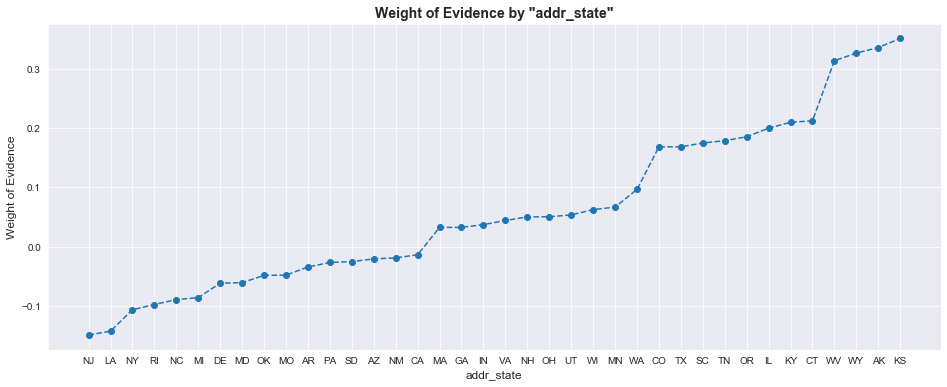

In [61]:
#lets see the plot without 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL' &  'WV' 'NH' 'WY' 'DC' 'ME 'ID'
plot_by_woe(df_WoE_IV_addrState.iloc[6:-6, : ])

- 'NM' to 'CA' have low WoE. it seems that we can make it into 1 category. but before we do that. lets see the number of observation for each of it
- 'NY' & 'CA' stands out with high number of borrowers / high number of observation. thus we'll leave it by itself

<b> So the group of category should be:
    1. 'NM' 'VA'
    2. 'NY'
    3. 'OK 'TN' 'MO' 'LA' 'MD' 'NC'
    4. 'CA'
</b> 


- For the next group / category we'll do the same step as before

<b> So the group of category should be:
    1. 'UT' 'KY' 'AZ' 'NJ'
    2. 'AR' 'MI' 'PA' 'OH' 'MN'
    3. 'RI' 'MA' 'DE' 'SD' 'IN'
    4. 'GA' 'WA' 'OR'
    5. 'WI' 'MT'
    6. 'TX'
    7. 'IL' 'CT'
    8. 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
</b> 

In [62]:
# Group of state with LOWEST WoE / Highest Probability to Default 
# Reference Category
df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

# Group of state with HIGHEST WoE / Lowest Probability to Default 
df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

############################################################################################################################

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

Reference Category 'addr_state:ND_NE_IA_NV_FL_HI_AL'

### `verification_status`

In [63]:
df_WoE_IV_VerifStat

verification_status  n_obs  prop_good  prop_bad  prop_n_obs   n_good  \
0            Verified  33641   0.872031  0.127969   36.073431  29336.0   
1     Source Verified  29963   0.895738  0.104262   32.129492  26839.0   
2        Not Verified  29653   0.906890  0.093110   31.797077  26892.0   

    n_bad  prop_n_good  prop_n_bad       WoE        IV    sum_IV  
0  4305.0    35.316070   42.247301 -0.179202  0.012421  0.022684  
1  3124.0    32.310063   30.657507  0.052501  0.000868  0.022684  
2  2761.0    32.373867   27.095191  0.177995  0.009396  0.022684

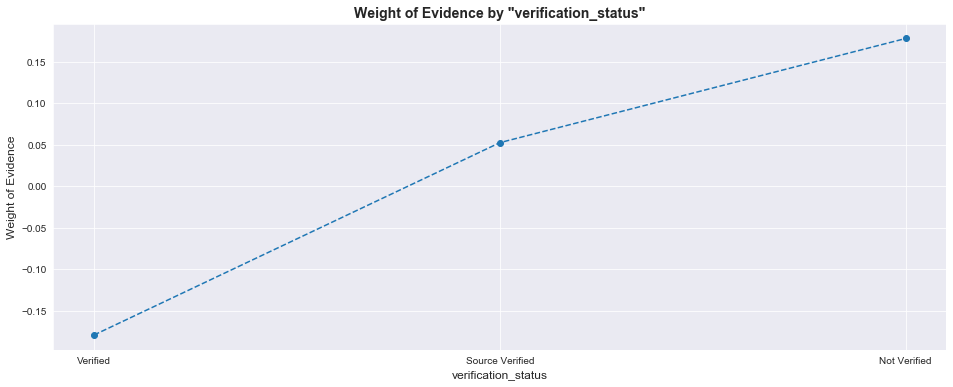

In [64]:
plot_by_woe(df_WoE_IV_VerifStat,0)

verification_status:Verified = Reference Category

###  `purpose`

In [65]:
df_WoE_IV_purpose

purpose  n_obs  prop_good  prop_bad  prop_n_obs   n_good  \
0          educational     89   0.752809  0.247191    0.095435     67.0   
1     renewable_energy     70   0.771429  0.228571    0.075061     54.0   
2       small_business   1431   0.777079  0.222921    1.534469   1112.0   
3              medical    918   0.857298  0.142702    0.984377    787.0   
4                house    439   0.858770  0.141230    0.470742    377.0   
5                other   4806   0.861007  0.138993    5.153501   4138.0   
6              wedding    456   0.864035  0.135965    0.488971    394.0   
7               moving    602   0.878738  0.121262    0.645528    529.0   
8             vacation    496   0.881048  0.118952    0.531864    437.0   
9   debt_consolidation  55012   0.885916  0.114084   58.989674  48736.0   
10      major_purchase   1991   0.900552  0.099448    2.134960   1793.0   
11    home_improvement   5299   0.906397  0.093603    5.682147   4803.0   
12                 car   1072   0.916045  0.083955    1.149512    982.0   
13         credit_card  20576   0.916505  0.083495   22.063759  18858.0   

     n_bad  prop_n_good  prop_n_bad       WoE        IV    sum_IV  
0     22.0     0.080658    0.215898 -0.984590  0.001332  0.045124  
1     16.0     0.065008    0.157017 -0.881845  0.000811  0.045124  
2    319.0     1.338678    3.130520 -0.849516  0.015222  0.045124  
3    131.0     0.947428    1.285574 -0.305210  0.001032  0.045124  
4     62.0     0.453851    0.608440 -0.293130  0.000453  0.045124  
5    668.0     4.981521    6.555447 -0.274561  0.004321  0.045124  
6     62.0     0.474316    0.608440 -0.249024  0.000334  0.045124  
7     73.0     0.636835    0.716389 -0.117712  0.000094  0.045124  
8     59.0     0.526081    0.578999 -0.095845  0.000051  0.045124  
9   6276.0    58.670712   61.589794 -0.048556  0.001417  0.045124  
10   198.0     2.158499    1.943081  0.105138  0.000226  0.045124  
11   496.0     5.782080    4.867517  0.172179  0.001575  0.045124  
12    90.0     1.182178    0.883219  0.291541  0.000872  0.045124  
13  1718.0    22.702156   16.859666  0.297536  0.017383  0.045124

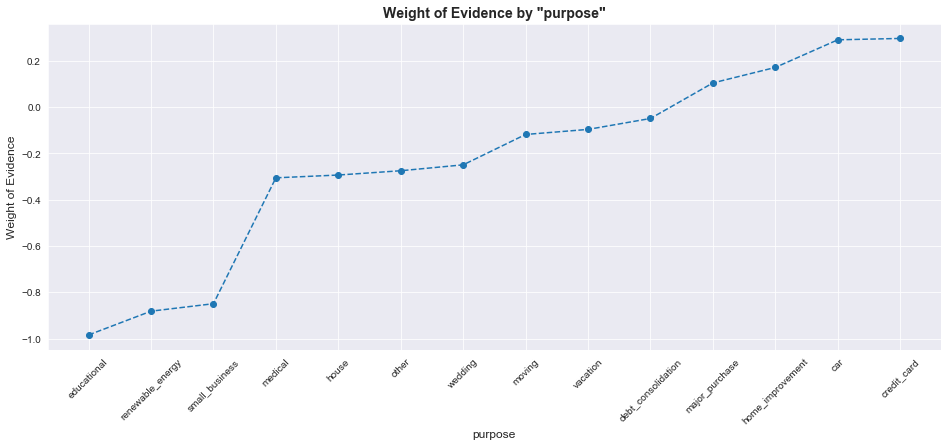

In [66]:
plot_by_woe(df_WoE_IV_purpose, 45)

- We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.

- We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.

- We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.

- We leave 'debt_consolidtion' in a separate category.

- We leave 'credit_card' in a separate category.

- **'educ__sm_b__wedd__ren_en__mov__house' will be the reference category**.

In [67]:
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], 
                                                                       df_inputs_prepr['purpose:small_business'],
                                                                       df_inputs_prepr['purpose:wedding'], 
                                                                       df_inputs_prepr['purpose:renewable_energy'],
                                                                       df_inputs_prepr['purpose:moving'], 
                                                                       df_inputs_prepr['purpose:house']])

df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], 
                                                     df_inputs_prepr['purpose:medical'],
                                                     df_inputs_prepr['purpose:vacation']])

df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], 
                                                              df_inputs_prepr['purpose:car'],
                                                              df_inputs_prepr['purpose:home_improvement']])

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

### `initial_list_status`

In [68]:
df_WoE_IV_initListStat

initial_list_status  n_obs  prop_good  prop_bad  prop_n_obs   n_good  \
0                   f  60491   0.879685  0.120315   64.864836  53213.0   
1                   w  32766   0.911127  0.088873   35.135164  29854.0   

    n_bad  prop_n_good  prop_n_bad       WoE        IV    sum_IV  
0  7278.0    64.060337   71.422964 -0.108794  0.008010  0.024888  
1  2912.0    35.939663   28.577036  0.229238  0.016878  0.024888

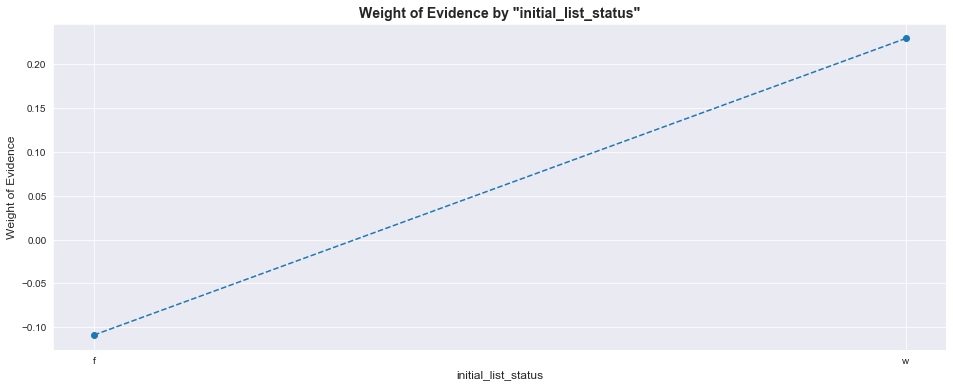

In [69]:
plot_by_woe(df_WoE_IV_initListStat,0)

initial_list_status:f = Reference Category

## Preprocessing Continuous Variables

### Automating Calculations and Visualizing Results

In [70]:
def Woe_IV_continuous (df_predictor, feature_name, df_target):
    df = pd.concat([df_predictor[feature_name], df_target],axis=1)
    df = pd.merge(df.groupby(feature_name, as_index=False).count(), 
               df.groupby(feature_name, as_index=False).mean(), on=feature_name)
    df.columns = [feature_name, 'n_obs', 'prop_good']
    
    df['prop_bad'] = 1 - df['prop_good']
    
    #prop_n_obs
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()*100
    
    #n_good & n_bad
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = df['prop_bad'] * df['n_obs']
    
    #prop_n_good & prop_n_bad
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()*100
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()*100
    
    #WoE
    df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
#     df = df.sort_values('WoE')
#     df = df.reset_index(drop=True)
    
    #IV
    df['IV'] = df['WoE'] * (df['prop_n_good'] - df['prop_n_bad'])/100
    df['sum_IV'] = df['IV'].sum()
    

    
    return df

## Preprocessing Continuous Variables: Creating Dummy Variables, Part 1

### `term_int`

In [71]:
df_inputs_prepr['term_int'].unique()

array([60, 36], dtype=int64)

In [72]:
df_Con_Woe_IV_term = Woe_IV_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
df_Con_Woe_IV_term

term_int  n_obs  prop_good  prop_bad  prop_n_obs   n_good   n_bad  \
0        36  67534   0.902597  0.097403   72.417084  60956.0  6578.0   
1        60  25723   0.859581  0.140419   27.582916  22111.0  3612.0   

   prop_n_good  prop_n_bad       WoE        IV    sum_IV  
0    73.381728   64.553484  0.128181  0.011316  0.036603  
1    26.618272   35.446516 -0.286427  0.025286  0.036603

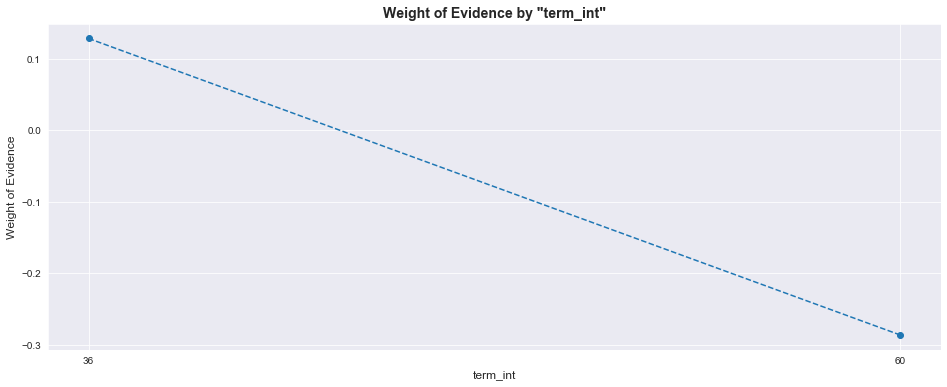

In [73]:
plot_by_woe(df_Con_Woe_IV_term,0)

In [74]:
#create dummy
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### `emp_length_int`

In [75]:
df_inputs_prepr['emp_length_int'].unique()

array([ 0., 10.,  1.,  2.,  9.,  3.,  6.,  4.,  7.,  8.,  5.])

In [76]:
df_Con_Woe_IV_emp_len = Woe_IV_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
df_Con_Woe_IV_emp_len

emp_length_int  n_obs  prop_good  prop_bad  prop_n_obs   n_good   n_bad  \
0              0.0  11553   0.874491  0.125509   12.388346  10103.0  1450.0   
1              1.0   5968   0.892594  0.107406    6.399520   5327.0   641.0   
2              2.0   8295   0.887402  0.112598    8.894775   7361.0   934.0   
3              3.0   7391   0.889325  0.110675    7.925410   6573.0   818.0   
4              4.0   5555   0.889469  0.110531    5.956657   4941.0   614.0   
5              5.0   6172   0.886261  0.113739    6.618270   5470.0   702.0   
6              6.0   5225   0.878852  0.121148    5.602797   4592.0   633.0   
7              7.0   5131   0.893588  0.106412    5.502000   4585.0   546.0   
8              8.0   4542   0.890137  0.109863    4.870412   4043.0   499.0   
9              9.0   3621   0.892847  0.107153    3.882818   3233.0   388.0   
10            10.0  29804   0.900517  0.099483   31.958995  26839.0  2965.0   

    prop_n_good  prop_n_bad       WoE        IV    sum_IV  
0     12.162471   14.229637 -0.156972  0.003245  0.007766  
1      6.412896    6.290481  0.019273  0.000024  0.007766  
2      8.861521    9.165849 -0.033766  0.000103  0.007766  
3      7.912890    8.027478 -0.014377  0.000016  0.007766  
4      5.948210    6.025515 -0.012913  0.000010  0.007766  
5      6.585046    6.889107 -0.045140  0.000137  0.007766  
6      5.528068    6.211973 -0.116640  0.000798  0.007766  
7      5.519641    5.358194  0.029686  0.000048  0.007766  
8      4.867155    4.896958 -0.006104  0.000002  0.007766  
9      3.892039    3.807655  0.021920  0.000018  0.007766  
10    32.310063   29.097154  0.104738  0.003365  0.007766

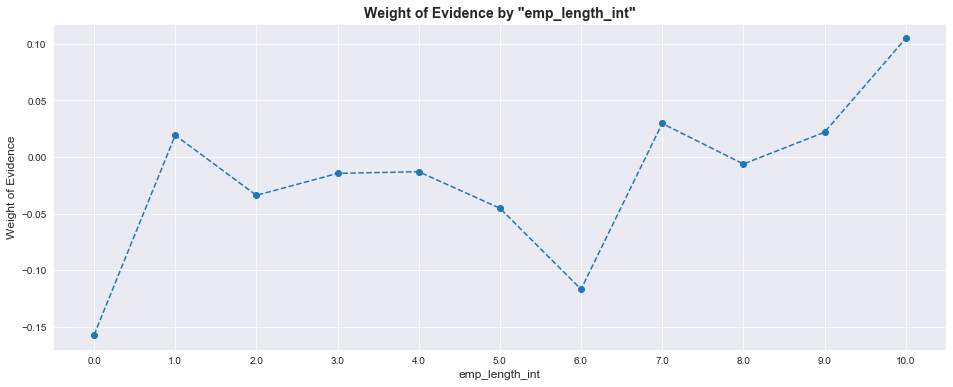

In [77]:
plot_by_woe(df_Con_Woe_IV_emp_len)

We'll do coarse classing like we did it before on `addr_state` variable.

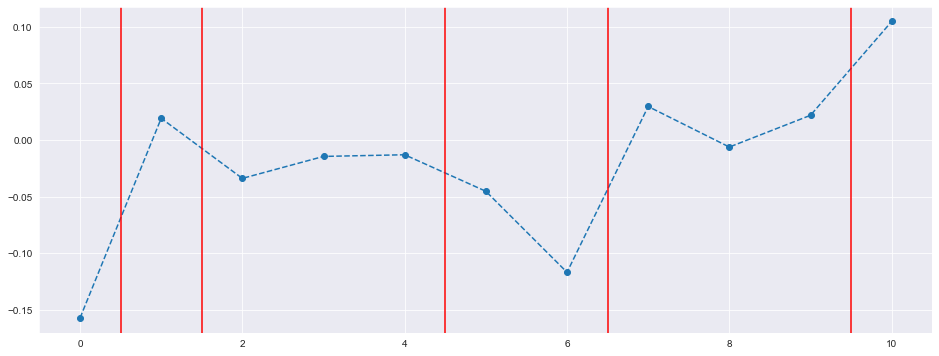

In [78]:
data = df_Con_Woe_IV_emp_len
plt.figure(figsize=(16,6))
plt.plot(data['emp_length_int'], data['WoE'], '--o')
plt.axvline([0.5], color='red') # 0
plt.axvline([1.5], color='red') # 1
plt.axvline([4.5], color='red') # 2-4
plt.axvline([6.5], color='red') # 5-6
plt.axvline([9.5], color='red') # 7-9
# plt.axvline([10.3], color='red') # 10
plt.show()

emp_length:0 = Reference Category

In [79]:
# Create dummy
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [80]:
len(df_inputs_prepr.columns)

230

## Preprocessing Continuous Variables: Creating Dummy Variables, Part 2

### `mths_since_issue_d`

In [81]:
df_inputs_prepr['mths_since_issue_d'].unique()

array([ 41.,  38.,  66.,  37.,  58.,  50.,  86.,  51.,  48.,  59.,  72.,
        77.,  47.,  46.,  56.,  55., 119.,  63., 102.,  39.,  53.,  40.,
        52.,  43.,  49.,  57.,  45.,  36.,  54.,  74.,  44.,  73., 103.,
        70.,  95.,  89.,  68.,  82.,  71.,  76., 104.,  65.,  80.,  91.,
        75.,  67.,  42.,  61.,  64.,  60.,  85.,  88., 110.,  96.,  78.,
        83.,  69.,  90.,  62., 108.,  79.,  92., 118.,  99.,  81., 115.,
        97., 114., 116., 100.,  93., 117., 106., 124., 101., 125.,  87.,
        84.,  94., 105., 109.,  98., 107., 112., 113., 122., 111., 120.,
       121., 123., 126.])

In [82]:
df_inputs_prepr['mths_since_issue_d'].nunique()

91

In [83]:
df_inputs_prepr['mths_since_issue_d'].describe()

count    93257.000000
mean        51.237387
std         14.310668
min         36.000000
25%         41.000000
50%         47.000000
75%         57.000000
max        126.000000
Name: mths_since_issue_d, dtype: float64

In [84]:
# FINE CLASSING: using the 'cut' method, we split the variable into 50 categories by its values
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [85]:
df_inputs_prepr['mths_since_issue_d_factor']
# The value of interval
# e.g : 43.2, 45.0 --> Greater than 43.2, Less than or Equal to 45.0

362514     (39.6, 41.4]
288564     (37.8, 39.6]
213591     (64.8, 66.6]
263083    (35.91, 37.8]
165001     (57.6, 59.4]
              ...      
115        (70.2, 72.0]
296284     (37.8, 39.6]
61777      (48.6, 50.4]
91763      (50.4, 52.2]
167512     (57.6, 59.4]
Name: mths_since_issue_d_factor, Length: 93257, dtype: category
Categories (50, interval[float64]): [(35.91, 37.8] < (37.8, 39.6] < (39.6, 41.4] < (41.4, 43.2] ... (118.8, 120.6] < (120.6, 122.4] < (122.4, 124.2] < (124.2, 126.0]]

In [86]:
df_Con_Woe_IV_Issue_date = Woe_IV_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
df_Con_Woe_IV_Issue_date

mths_since_issue_d_factor  n_obs  prop_good  prop_bad  prop_n_obs  n_good  \
0              (35.91, 37.8]   7191   0.945766  0.054234    7.710949  6801.0   
1               (37.8, 39.6]   9752   0.930373  0.069627   10.457124  9073.0   
2               (39.6, 41.4]   9506   0.919945  0.080055   10.193337  8745.0   
3               (41.4, 43.2]   7240   0.909116  0.090884    7.763492  6582.0   
4               (43.2, 45.0]   7217   0.902868  0.097132    7.738829  6516.0   
5               (45.0, 46.8]   3104   0.895296  0.104704    3.328436  2779.0   
6               (46.8, 48.6]   6197   0.890269  0.109731    6.645078  5517.0   
7               (48.6, 50.4]   5821   0.885930  0.114070    6.241891  5157.0   
8               (50.4, 52.2]   5021   0.878909  0.121091    5.384046  4413.0   
9               (52.2, 54.0]   4497   0.874138  0.125862    4.822158  3931.0   
10              (54.0, 55.8]   2064   0.866279  0.133721    2.213239  1788.0   
11              (55.8, 57.6]   3572   0.861422  0.138578    3.830275  3077.0   
12              (57.6, 59.4]   2904   0.850895  0.149105    3.113975  2471.0   
13              (59.4, 61.2]   2474   0.847615  0.152385    2.652884  2097.0   
14              (61.2, 63.0]   2539   0.851910  0.148090    2.722584  2163.0   
15              (63.0, 64.8]   1115   0.837668  0.162332    1.195621   934.0   
16              (64.8, 66.6]   1721   0.816967  0.183033    1.845438  1406.0   
17              (66.6, 68.4]   1296   0.852623  0.147377    1.389708  1105.0   
18              (68.4, 70.2]   1097   0.839562  0.160438    1.176319   921.0   
19              (70.2, 72.0]   1001   0.816184  0.183816    1.073378   817.0   
20              (72.0, 73.8]    447   0.829978  0.170022    0.479321   371.0   
21              (73.8, 75.6]    790   0.853165  0.146835    0.847121   674.0   
22              (75.6, 77.4]    754   0.867374  0.132626    0.808518   654.0   
23              (77.4, 79.2]    690   0.844928  0.155072    0.739891   583.0   
24              (79.2, 81.0]    599   0.876461  0.123539    0.642311   525.0   
25              (81.0, 82.8]    254   0.870079  0.129921    0.272366   221.0   
26              (82.8, 84.6]    533   0.878049  0.121951    0.571539   468.0   
27              (84.6, 86.4]    459   0.836601  0.163399    0.492188   384.0   
28              (86.4, 88.2]    443   0.864560  0.135440    0.475031   383.0   
29              (88.2, 90.0]    439   0.863326  0.136674    0.470742   379.0   
30              (90.0, 91.8]    194   0.835052  0.164948    0.208027   162.0   
31              (91.8, 93.6]    367   0.896458  0.103542    0.393536   329.0   
32              (93.6, 95.4]    257   0.879377  0.120623    0.275583   226.0   
33              (95.4, 97.2]    276   0.836957  0.163043    0.295956   231.0   
34              (97.2, 99.0]    234   0.829060  0.170940    0.250920   194.0   
35             (99.0, 100.8]    100   0.920000  0.080000    0.107231    92.0   
36            (100.8, 102.6]    170   0.835294  0.164706    0.182292   142.0   
37            (102.6, 104.4]    150   0.873333  0.126667    0.160846   131.0   
38            (104.4, 106.2]    129   0.868217  0.131783    0.138327   112.0   
39            (106.2, 108.0]    119   0.815126  0.184874    0.127604    97.0   
40            (108.0, 109.8]     36   0.861111  0.138889    0.038603    31.0   
41            (109.8, 111.6]     40   0.800000  0.200000    0.042892    32.0   
42            (111.6, 113.4]     37   0.972973  0.027027    0.039675    36.0   
43            (113.4, 115.2]     57   0.824561  0.175439    0.061121    47.0   
44            (115.2, 117.0]    131   0.801527  0.198473    0.140472   105.0   
45            (117.0, 118.8]     59   0.813559  0.186441    0.063266    48.0   
46            (118.8, 120.6]     83   0.734940  0.265060    0.089001    61.0   
47            (120.6, 122.4]     41   0.609756  0.390244    0.043965    25.0   
48            (122.4, 124.2]     23   0.695652  0.304348    0.024663    16.0   
49 

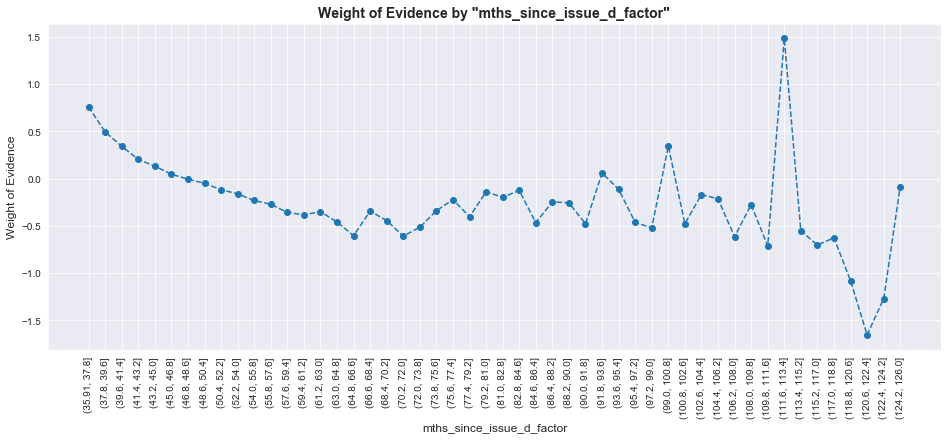

In [87]:
plot_by_woe(df_Con_Woe_IV_Issue_date,90)

First 3 Category of `mths_since_issue_d_factor` has high or distinctive WoE compare to the rest of it. Thus we'll keep it as it is and see the other category except these values.

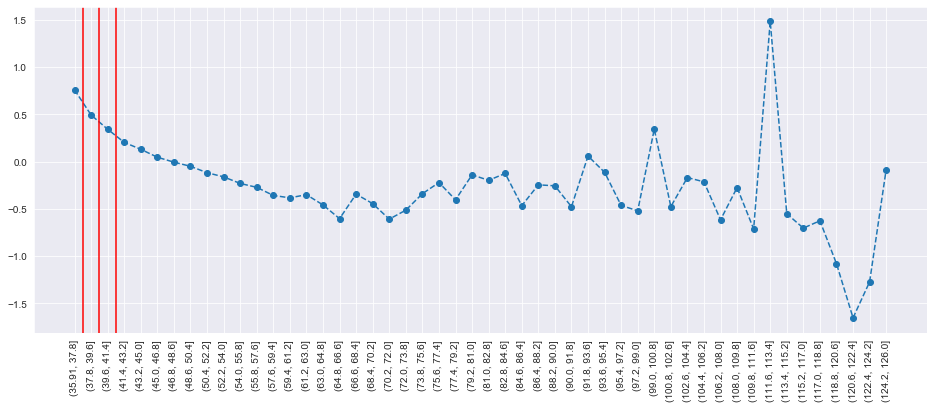

In [88]:
data = df_Con_Woe_IV_Issue_date
plt.figure(figsize=(16,6))
plt.plot(np.array(data['mths_since_issue_d_factor'].apply(str)), data['WoE'], '--o')
plt.xticks(rotation = 90)
plt.axvline([0.5], color='red')
plt.axvline([1.5], color='red')
plt.axvline([2.5], color='red')
plt.show()

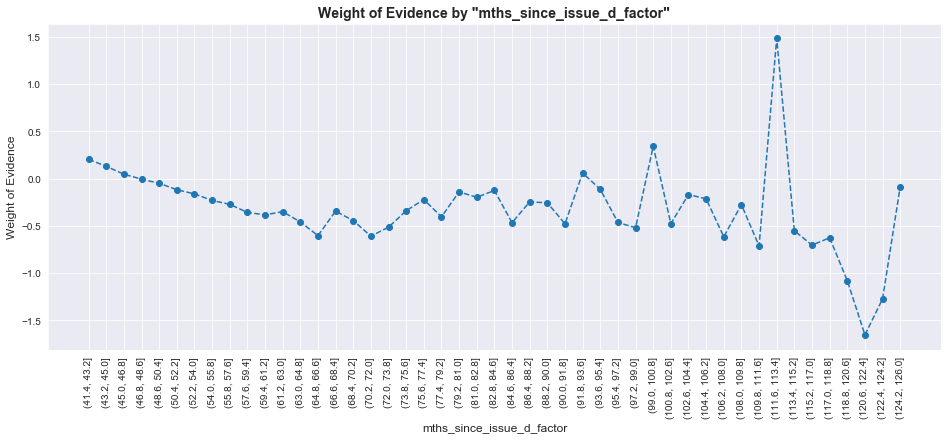

In [89]:
plot_by_woe(df_Con_Woe_IV_Issue_date.iloc[3:,:],90)

Important determinant was the number of observations that fall into a given category. If we check out the remaining categories we can notice that they contain a very small number of observations altogether.


In fact this is the reason why their weights of evidence vary a lot. So even if you have forgotten to check the number of observations that fall into each category such a plot can serve as a red flag.


Whenever you see a WoE plot that goes up and down like this (`mnths_since_issue_d_factor` > 65) we must make sure to check the number of observations in the respective categories.

OK so we know that these intervals (`mnths_since_issue_d_factor` > 65) refer to only a small portion of our data. Therefore we can create only one dummy variable for all of them. But alternatively we prefer to make (64.8-66.6) - (82.8-84.6) as one category & (84.6-86.4)-(124.2-126.0) as another one.

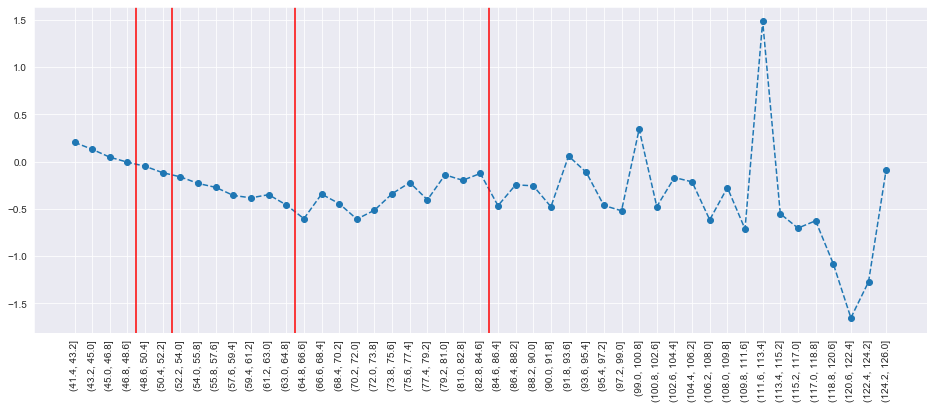

In [90]:
data = df_Con_Woe_IV_Issue_date.iloc[3:,:]
plt.figure(figsize=(16,6))
plt.plot(np.array(data['mths_since_issue_d_factor'].apply(str)), data['WoE'], '--o')
plt.xticks(rotation = 90)
plt.axvline([3.5], color='red')
plt.axvline([5.5], color='red')
plt.axvline([12.5], color='red')
plt.axvline([23.5], color='red')
plt.show()

In [91]:
# We create the following categories:
# < 38
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
#38 - 39
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
#40 - 41
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)


#42 - 48
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
#49 - 52
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
#53 - 64
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
#65 - 84
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
#> 84
df_inputs_prepr['mths_since_issue_d:>84'] = np.where((df_inputs_prepr['mths_since_issue_d']>84), 1, 0)
# df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

## `int_rate`

In [92]:
df_inputs_prepr['int_rate'].unique()

array([14.99, 20.99, 14.65, 14.49,  8.9 , 16.2 , 15.95, 22.2 , 11.99,
       10.99, 19.05, 11.71, 12.99, 19.99, 14.47, 14.64, 12.12, 10.78,
       18.49, 14.11, 16.29, 17.58, 16.78, 15.99, 20.31, 19.52, 15.22,
       13.98,  7.69, 11.67, 21.15, 16.59, 15.61, 15.31, 13.65, 19.47,
        9.49, 11.14, 17.27, 20.8 , 17.57, 19.72, 13.66, 20.2 , 18.25,
       14.33, 10.64, 14.3 , 18.92, 11.26, 15.81,  6.03, 19.13, 14.35,
        6.62,  7.62, 13.35, 12.68, 13.49, 18.99, 22.9 , 14.09, 23.63,
       10.95, 10.16, 13.11, 10.  , 12.49, 13.68, 22.45, 18.85,  6.49,
       13.67, 15.7 , 17.49, 23.28, 19.69, 18.24,  8.39, 22.4 ,  6.99,
       23.43, 14.16, 17.1 , 15.88, 19.2 ,  6.91,  9.99, 11.55, 17.76,
       21.7 , 13.53,  9.17, 17.14, 20.5 ,  7.49, 14.31, 12.42, 24.08,
       16.49, 12.39, 10.15, 15.21, 24.5 , 25.57, 15.1 , 15.8 , 20.49,
       11.44, 23.7 ,  8.63, 16.99,  7.12, 13.23, 19.24,  9.63, 17.56,
       15.59, 11.83, 13.99,  9.71,  7.9 , 18.75, 22.95,  9.91, 15.96,
        6.17, 16.02,

In [93]:
df_inputs_prepr['int_rate'].nunique()

473

In [94]:
#FINE CLASSING
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [95]:
df_inputs_prepr['int_rate_factor']

362514    (14.914, 15.327]
288564    (20.694, 21.106]
213591    (14.502, 14.914]
263083    (14.089, 14.502]
165001      (8.722, 9.135]
                ...       
115       (11.612, 12.025]
296284     (9.961, 10.374]
61777       (8.722, 9.135]
91763       (8.722, 9.135]
167512      (7.484, 7.897]
Name: int_rate_factor, Length: 93257, dtype: category
Categories (50, interval[float64]): [(5.399, 5.833] < (5.833, 6.246] < (6.246, 6.658] < (6.658, 7.071] ... (24.409, 24.822] < (24.822, 25.234] < (25.234, 25.647] < (25.647, 26.06]]

In [96]:
df_Con_Woe_IV_int_rate = Woe_IV_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_Con_Woe_IV_int_rate

int_rate_factor  n_obs  prop_good  prop_bad  prop_n_obs  n_good  n_bad  \
0     (5.399, 5.833]    198   0.969697  0.030303    0.212317   192.0    6.0   
1     (5.833, 6.246]   2086   0.979866  0.020134    2.236829  2044.0   42.0   
2     (6.246, 6.658]   1974   0.972138  0.027862    2.116731  1919.0   55.0   
3     (6.658, 7.071]    477   0.951782  0.048218    0.511490   454.0   23.0   
4     (7.071, 7.484]    804   0.981343  0.018657    0.862134   789.0   15.0   
5     (7.484, 7.897]   3245   0.965485  0.034515    3.479632  3133.0  112.0   
6      (7.897, 8.31]   2429   0.951009  0.048991    2.604630  2310.0  119.0   
7      (8.31, 8.722]   1680   0.965476  0.034524    1.801473  1622.0   58.0   
8     (8.722, 9.135]   2384   0.942114  0.057886    2.556376  2246.0  138.0   
9     (9.135, 9.548]   1590   0.976730  0.023270    1.704966  1553.0   37.0   
10    (9.548, 9.961]   1881   0.931419  0.068581    2.017007  1752.0  129.0   
11   (9.961, 10.374]   2766   0.936370  0.063630    2.965997  2590.0  176.0   
12  (10.374, 10.786]   1390   0.917986  0.082014    1.490505  1276.0  114.0   
13  (10.786, 11.199]   4464   0.937500  0.062500    4.786772  4185.0  279.0   
14  (11.199, 11.612]   1213   0.916735  0.083265    1.300707  1112.0  101.0   
15  (11.612, 12.025]   3737   0.931496  0.068504    4.007206  3481.0  256.0   
16  (12.025, 12.438]   3077   0.905752  0.094248    3.299484  2787.0  290.0   
17   (12.438, 12.85]   2754   0.920116  0.079884    2.953130  2534.0  220.0   
18   (12.85, 13.263]   5440   0.904044  0.095956    5.833342  4918.0  522.0   
19  (13.263, 13.676]   3806   0.897793  0.102207    4.081195  3417.0  389.0   
20  (13.676, 14.089]   2692   0.894874  0.105126    2.886647  2409.0  283.0   
21  (14.089, 14.502]   5760   0.887153  0.112847    6.176480  5110.0  650.0   
22  (14.502, 14.914]   1187   0.867734  0.132266    1.272827  1030.0  157.0   
23  (14.914, 15.327]   4811   0.882145  0.117855    5.158862  4244.0  567.0   
24   (15.327, 15.74]   3146   0.886840  0.113160    3.373473  2790.0  356.0   
25   (15.74, 16.153]   1869   0.837346  0.162654    2.004139  1565.0  304.0   
26  (16.153, 16.566]   3230   0.849226  0.150774    3.463547  2743.0  487.0   
27  (16.566, 16.978]   1035   0.852174  0.147826    1.109836   882.0  153.0   
28  (16.978, 17.391]   2843   0.848048  0.151952    3.048565  2411.0  432.0   
29  (17.391, 17.804]   2992   0.837567  0.162433    3.208338  2506.0  486.0   
30  (17.804, 18.217]    286   0.835664  0.164336    0.306679   239.0   47.0   
31   (18.217, 18.63]   2729   0.827409  0.172591    2.926322  2258.0  471.0   
32   (18.63, 19.042]   1835   0.820163  0.179837    1.967681  1505.0  330.0   
33  (19.042, 19.455]   1135   0.786784  0.213216    1.217067   893.0  242.0   
34  (19.455, 19.868]   1680   0.816667  0.183333    1.801473  1372.0  308.0   
35  (19.868, 20.281]   1244   0.849678  0.150322    1.333948  1057.0  187.0   
36  (20.281, 20.694]    805   0.814907  0.185093    0.863206   656.0  149.0   
37  (20.694, 21.106]    956   0.791841  0.208159    1.025124   757.0  199.0   
38  (21.106, 21.519]    701   0.757489  0.242511    0.751686   531.0  170.0   
39  (21.519, 21.932]    222   0.801802  0.198198    0.238052   178.0   44.0   
40  (21.932, 22.345]    832   0.775240  0.224760    0.892158   645.0  187.0   
41  (22.345, 22.758]    586   0.737201  0.262799    0.628371   432.0  154.0   
42   (22.758, 23.17]    375   0.741333  0.258667    0.402115   278.0   97.0   
43   (23.17, 23.583]    655   0.778626  0.221374    0.702360   510.0  145.0   
44  (23.583, 23.996]    408   0.750000  0.250000    0.437501   306.0  102.0   
45  (23.996, 24.409]    393   0.834606  0.165394    0.421416   328.0   65.0   
46  (24.409, 24.822]    436   0.786697  0.213303    0.467525   343.0   93.0   
47  (24.822, 25.234]    351   0.792023  0.207977    0.376379   278.0   73.0   
48  (25.234, 25.647]    194   0.757732  0.242268    0.208027   147.0   47.0   
49   (25.647, 26.06]    474   0.738397  0.261603    0.5

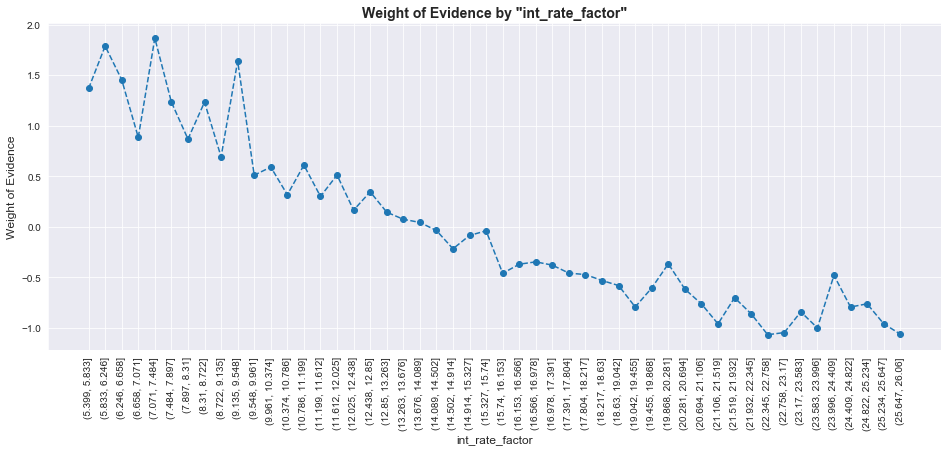

In [97]:
plot_by_woe(df_Con_Woe_IV_int_rate,90)

- The Graph show Monotonic Relationship. 
    - A monotonic relationship is a relationship that does one of the following: 
            (1) as the value of one variable increases, so does the value of the other variable; or 
            (2) as the value of one variable increases, the other variable value decreases.
- The Greate the Interest Rate the Lower the Weight of evidence (Monotonic relationship type 2) = <b>the higher the interest rate give higher probability of Deafault (Monotonic relationship type 2)</b>

1.  The first 10 interval of interest rate have relativly high WoE, but have low Number of Observation. Bundled them in  one category / dummy (5.399 - 9.548) **Greter than 5.399 and Less tha or Equal to 9.548**
2. interval betwwen (9.548 - 12.025) have realativly same WoE,  Bundled them in  one category / dummy.
3. 12.025 - 15.74
4. 15.74 - 20.281
5. value grater than 20.281

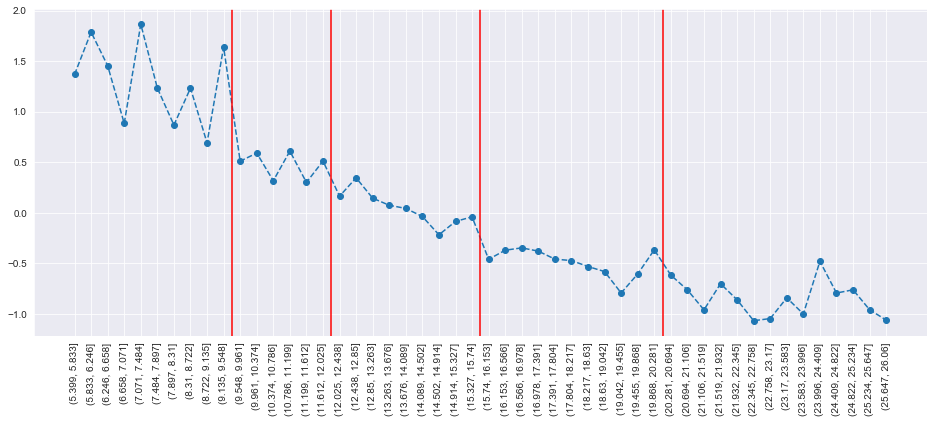

In [98]:
data = df_Con_Woe_IV_int_rate
plt.figure(figsize=(16,6))
plt.plot(np.array(data['int_rate_factor'].apply(str)), data['WoE'], '--o')
plt.xticks(rotation = 90)
plt.axvline([9.5], color='red')
plt.axvline([15.5], color='red')
plt.axvline([24.5], color='red')
plt.axvline([35.5], color='red')
plt.show()

In [99]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

## `funded_amnt`

In [100]:
df_inputs_prepr['funded_amnt'].unique()

array([32500, 11000, 30000, ..., 30600, 32850, 29875], dtype=int64)

In [101]:
df_inputs_prepr['funded_amnt'].nunique()

1237

In [102]:
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [103]:
df_inputs_prepr['funded_amnt_factor']

362514    (32240.0, 32930.0]
288564    (10850.0, 11540.0]
213591    (29480.0, 30170.0]
263083    (14300.0, 14990.0]
165001    (14990.0, 15680.0]
                 ...        
115         (7400.0, 8090.0]
296284    (23960.0, 24650.0]
61777     (34310.0, 35000.0]
91763     (17750.0, 18440.0]
167512    (15680.0, 16370.0]
Name: funded_amnt_factor, Length: 93257, dtype: category
Categories (50, interval[float64]): [(465.5, 1190.0] < (1190.0, 1880.0] < (1880.0, 2570.0] < (2570.0, 3260.0] ... (32240.0, 32930.0] < (32930.0, 33620.0] < (33620.0, 34310.0] < (34310.0, 35000.0]]

In [104]:
df_Con_Woe_IV_funded_amnt= Woe_IV_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
df_Con_Woe_IV_funded_amnt

funded_amnt_factor  n_obs  prop_good  prop_bad  prop_n_obs  n_good  n_bad  \
0      (465.5, 1190.0]    319   0.880878  0.119122    0.342065   281.0   38.0   
1     (1190.0, 1880.0]    800   0.896250  0.103750    0.857844   717.0   83.0   
2     (1880.0, 2570.0]   1513   0.900198  0.099802    1.622398  1362.0  151.0   
3     (2570.0, 3260.0]   1817   0.893781  0.106219    1.948379  1624.0  193.0   
4     (3260.0, 3950.0]   1245   0.891566  0.108434    1.335020  1110.0  135.0   
5     (3950.0, 4640.0]   2298   0.882942  0.117058    2.464158  2029.0  269.0   
6     (4640.0, 5330.0]   3957   0.898155  0.101845    4.243113  3554.0  403.0   
7     (5330.0, 6020.0]   4186   0.906593  0.093407    4.488671  3795.0  391.0   
8     (6020.0, 6710.0]   1718   0.881839  0.118161    1.842221  1515.0  203.0   
9     (6710.0, 7400.0]   2880   0.893403  0.106597    3.088240  2573.0  307.0   
10    (7400.0, 8090.0]   4266   0.895218  0.104782    4.574456  3819.0  447.0   
11    (8090.0, 8780.0]   1617   0.890538  0.109462    1.733918  1440.0  177.0   
12    (8780.0, 9470.0]   2320   0.888793  0.111207    2.487749  2062.0  258.0   
13   (9470.0, 10160.0]   8552   0.891955  0.108045    9.170357  7628.0  924.0   
14  (10160.0, 10850.0]   1642   0.872716  0.127284    1.760726  1433.0  209.0   
15  (10850.0, 11540.0]   2091   0.880918  0.119082    2.242191  1842.0  249.0   
16  (11540.0, 12230.0]   5767   0.906190  0.093810    6.183986  5226.0  541.0   
17  (12230.0, 12920.0]   1228   0.875407  0.124593    1.316791  1075.0  153.0   
18  (12920.0, 13610.0]   1860   0.898925  0.101075    1.994488  1672.0  188.0   
19  (13610.0, 14300.0]   2087   0.899377  0.100623    2.237902  1877.0  210.0   
20  (14300.0, 14990.0]   1255   0.886853  0.113147    1.345743  1113.0  142.0   
21  (14990.0, 15680.0]   5441   0.903143  0.096857    5.834415  4914.0  527.0   
22  (15680.0, 16370.0]   2920   0.882534  0.117466    3.131132  2577.0  343.0   
23  (16370.0, 17060.0]   1625   0.880000  0.120000    1.742497  1430.0  195.0   
24  (17060.0, 17750.0]    921   0.850163  0.149837    0.987593   783.0  138.0   
25  (17750.0, 18440.0]   2898   0.885783  0.114217    3.107542  2567.0  331.0   
26  (18440.0, 19130.0]    989   0.858443  0.141557    1.060510   849.0  140.0   
27  (19130.0, 19820.0]   1057   0.875118  0.124882    1.133427   925.0  132.0   
28  (19820.0, 20510.0]   5055   0.896736  0.103264    5.420505  4533.0  522.0   
29  (20510.0, 21200.0]   1635   0.895413  0.104587    1.753220  1464.0  171.0   
30  (21200.0, 21890.0]    476   0.834034  0.165966    0.510417   397.0   79.0   
31  (21890.0, 22580.0]   1028   0.883268  0.116732    1.102330   908.0  120.0   
32  (22580.0, 23270.0]    633   0.892575  0.107425    0.678769   565.0   68.0   
33  (23270.0, 23960.0]    497   0.837022  0.162978    0.532936   416.0   81.0   
34  (23960.0, 24650.0]   2491   0.898033  0.101967    2.671113  2237.0  254.0   
35  (24650.0, 25340.0]   2500   0.903200  0.096800    2.680764  2258.0  242.0   
36  (25340.0, 26030.0]    487   0.852156  0.147844    0.522213   415.0   72.0   
37  (26030.0, 26720.0]    299   0.822742  0.177258    0.320619   246.0   53.0   
38  (26720.0, 27410.0]    410   0.870732  0.129268    0.439645   357.0   53.0   
39  (27410.0, 28100.0]   1604   0.895885  0.104115    1.719978  1437.0  167.0   
40  (28100.0, 28790.0]    204   0.857843  0.142157    0.218750   175.0   29.0   
41  (28790.0, 29480.0]    286   0.846154  0.153846    0.306679   242.0   44.0   
42  (29480.0, 30170.0]   1762   0.879682  0.120318    1.889402  1550.0  212.0   
43  (30170.0, 30860.0]    133   0.827068  0.172932    0.142617   110.0   23.0   
44  (30860.0, 31550.0]    218   0.830275  0.169725    0.233763   181.0   37.0   
45  (31550.0, 32240.0]    367   0.920981  0.079019    0.393536   338.0   29.0   
46  (32240.0, 32930.0]    139   0.884892  0.115108    0.149050   123.0   16.0   
47  (32930.0, 33620.0]    275   0.901818  0.098182    0.294884   248.0   27.0   
48  (33620.0, 34310.0]    142   0.8

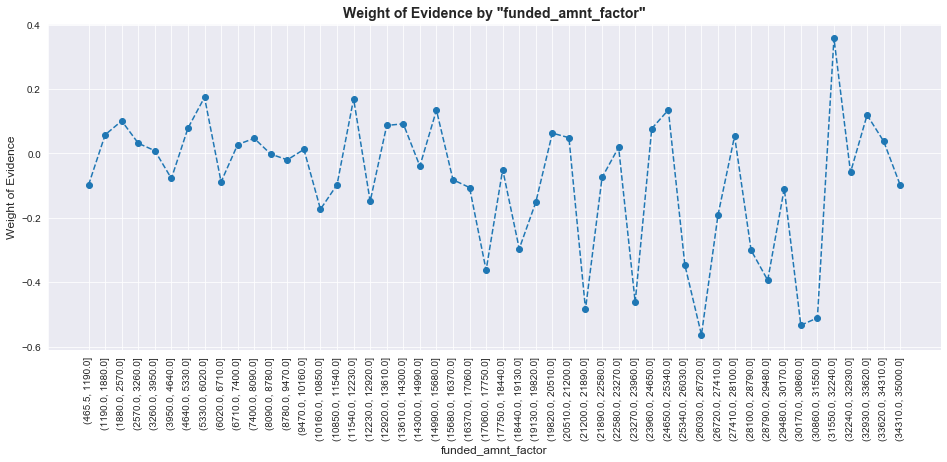

In [105]:
plot_by_woe(df_Con_Woe_IV_funded_amnt,90)

1. if we look at the graph above the pattern is quite straight horizontal. there seems to be no association between 'funded_amnt' and WoE
2. if we look at the Information Value of `funded_amnt` it has very low value (0.014139). this point is confirm our first point. and it lead us to conclusion that `funded_amnt` has no association to the independent variable (`good_bad`)
3. according to our points above, we leave the `funded_amnt` as it is and not to proceed it into coarse classing & crate dummy
4. probably we'll not using this variable in our PD Model

### `mths_since_earliest_cr_line`

In [106]:
df_inputs_prepr['mths_since_earliest_cr_line'].unique()

array([188., 172., 189., 112., 374., 207., 332., 266., 383., 269., 328.,
       237., 293., 242., 228., 287., 231., 206., 263., 167., 239., 134.,
       441., 195., 127., 286., 192., 518., 170., 147., 150., 252., 202.,
       197., 190., 300., 233., 220., 416., 225., 217., 200., 209., 592.,
       194., 262., 156., 227., 391., 141., 183., 302., 267., 312., 362.,
       216., 438., 249., 273., 182., 221., 187., 567., 245., 205., 347.,
       214., 299., 176., 397., 386., 253., 243., 398., 153., 466., 198.,
       229., 241., 180., 389., 181., 169., 261., 378., 324., 400., 232.,
       486., 123., 350., 549., 139., 244., 255., 126., 219., 175., 115.,
       413., 173., 210., 274., 354., 254., 327., 321., 323., 201., 171.,
       280., 443., 329., 294., 257., 223., 258., 259., 158., 348., 162.,
       168., 303., 313., 298., 320.,  91., 439., 174., 520., 251., 317.,
       144., 204., 246., 406., 119., 304., 279., 379., 230., 160., 305.,
        79., 196., 306., 333., 331., 256., 113., 34

In [107]:
df_inputs_prepr['mths_since_earliest_cr_line'].nunique()

606

In [108]:
df_inputs_prepr['mths_since_earliest_cr_line'].describe()

count    93257.000000
mean       242.400570
std         86.612445
min          0.000000
25%        184.000000
50%        226.000000
75%        286.000000
max        804.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [109]:
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
df_inputs_prepr['mths_since_earliest_cr_line_factor']

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


362514    (176.88, 192.96]
288564     (160.8, 176.88]
213591    (176.88, 192.96]
263083     (96.48, 112.56]
165001    (369.84, 385.92]
                ...       
115       (128.64, 144.72]
296284    (369.84, 385.92]
61777     (257.28, 273.36]
91763     (289.44, 305.52]
167512     (225.12, 241.2]
Name: mths_since_earliest_cr_line_factor, Length: 93257, dtype: category
Categories (50, interval[float64]): [(-0.804, 16.08] < (16.08, 32.16] < (32.16, 48.24] < (48.24, 64.32] ... (739.68, 755.76] < (755.76, 771.84] < (771.84, 787.92] < (787.92, 804.0]]

In [110]:
df_Con_Woe_IV_msecl = Woe_IV_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
df_Con_Woe_IV_msecl

mths_since_earliest_cr_line_factor  n_obs  prop_good  prop_bad  prop_n_obs  \
0                     (-0.804, 16.08]      5   1.000000  0.000000    0.005362   
1                      (16.08, 32.16]      0        NaN       NaN    0.000000   
2                      (32.16, 48.24]      0        NaN       NaN    0.000000   
3                      (48.24, 64.32]      0        NaN       NaN    0.000000   
4                       (64.32, 80.4]    122   0.909836  0.090164    0.130821   
5                       (80.4, 96.48]    713   0.906031  0.093969    0.764554   
6                     (96.48, 112.56]   1234   0.861426  0.138574    1.323225   
7                    (112.56, 128.64]   2695   0.866048  0.133952    2.889863   
8                    (128.64, 144.72]   4026   0.865127  0.134873    4.317102   
9                     (144.72, 160.8]   5087   0.887360  0.112640    5.454818   
10                    (160.8, 176.88]   6138   0.885305  0.114695    6.581812   
11                   (176.88, 192.96]   7449   0.885488  0.114512    7.987604   
12                   (192.96, 209.04]  10245   0.887653  0.112347   10.985771   
13                   (209.04, 225.12]   8784   0.884107  0.115893    9.419132   
14                    (225.12, 241.2]   7483   0.888414  0.111586    8.024063   
15                    (241.2, 257.28]   6284   0.890675  0.109325    6.738368   
16                   (257.28, 273.36]   5772   0.891026  0.108974    6.189348   
17                   (273.36, 289.44]   5214   0.897392  0.102608    5.591001   
18                   (289.44, 305.52]   3751   0.902959  0.097041    4.022218   
19                    (305.52, 321.6]   2744   0.903790  0.096210    2.942406   
20                    (321.6, 337.68]   2845   0.902636  0.097364    3.050709   
21                   (337.68, 353.76]   2512   0.900478  0.099522    2.693632   
22                   (353.76, 369.84]   2058   0.915452  0.084548    2.206805   
23                   (369.84, 385.92]   1585   0.907886  0.092114    1.699604   
24                    (385.92, 402.0]   1431   0.906359  0.093641    1.534469   
25                    (402.0, 418.08]   1190   0.920168  0.079832    1.276044   
26                   (418.08, 434.16]    780   0.906410  0.093590    0.836398   
27                   (434.16, 450.24]    529   0.911153  0.088847    0.567250   
28                   (450.24, 466.32]    512   0.929688  0.070312    0.549020   
29                    (466.32, 482.4]    476   0.915966  0.084034    0.510417   
30                    (482.4, 498.48]    378   0.915344  0.084656    0.405332   
31                   (498.48, 514.56]    277   0.931408  0.068592    0.297029   
32                   (514.56, 530.64]    206   0.917476  0.082524    0.220895   
33                   (530.64, 546.72]    198   0.909091  0.090909    0.212317   
34                    (546.72, 562.8]    134   0.910448  0.089552    0.143689   
35                    (562.8, 578.88]    113   0.831858  0.168142    0.121171   
36                   (578.88, 594.96]     69   0.898551  0.101449    0.073989   
37                   (594.96, 611.04]     88   0.852273  0.147727    0.094363   
38                   (611.04, 627.12]     43   0.813953  0.186047    0.046109   
39                    (627.12, 643.2]     27   0.962963  0.037037    0.028952   
40                    (643.2, 659.28]     28   0.892857  0.107143    0.030025   
41                   (659.28, 675.36]      6   1.000000  0.000000    0.006434   
42                   (675.36, 691.44]      9   0.888889  0.111111    0.009651   
43                   (691.44, 707.52]      8   0.875000  0.125000    0.008578   
44                    (707.52, 723.6]      5   0.800000  0.200000    0.005362   
45                    (723.6, 739.68]      1   1.000000  0.000000    0.001072   
46                   (739.68, 755.76]      0        NaN       NaN    0.000000   
47                   (755.76, 771.84]      2   1.000000  0.000000    0.002145   
48                   (771.84, 787.

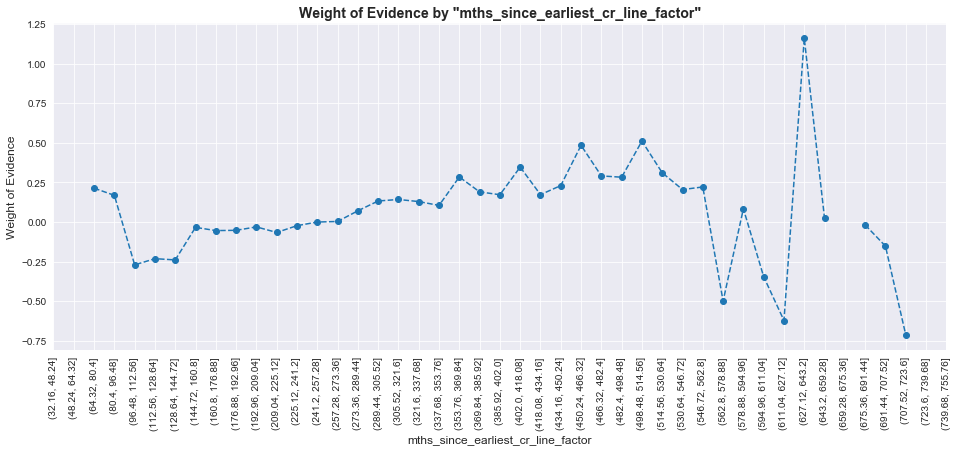

In [111]:
plot_by_woe(df_Con_Woe_IV_msecl, 90)

In [112]:
df_Con_Woe_IV_msecl.iloc[8:, : ]

mths_since_earliest_cr_line_factor  n_obs  prop_good  prop_bad  prop_n_obs  \
8                    (128.64, 144.72]   4026   0.865127  0.134873    4.317102   
9                     (144.72, 160.8]   5087   0.887360  0.112640    5.454818   
10                    (160.8, 176.88]   6138   0.885305  0.114695    6.581812   
11                   (176.88, 192.96]   7449   0.885488  0.114512    7.987604   
12                   (192.96, 209.04]  10245   0.887653  0.112347   10.985771   
13                   (209.04, 225.12]   8784   0.884107  0.115893    9.419132   
14                    (225.12, 241.2]   7483   0.888414  0.111586    8.024063   
15                    (241.2, 257.28]   6284   0.890675  0.109325    6.738368   
16                   (257.28, 273.36]   5772   0.891026  0.108974    6.189348   
17                   (273.36, 289.44]   5214   0.897392  0.102608    5.591001   
18                   (289.44, 305.52]   3751   0.902959  0.097041    4.022218   
19                    (305.52, 321.6]   2744   0.903790  0.096210    2.942406   
20                    (321.6, 337.68]   2845   0.902636  0.097364    3.050709   
21                   (337.68, 353.76]   2512   0.900478  0.099522    2.693632   
22                   (353.76, 369.84]   2058   0.915452  0.084548    2.206805   
23                   (369.84, 385.92]   1585   0.907886  0.092114    1.699604   
24                    (385.92, 402.0]   1431   0.906359  0.093641    1.534469   
25                    (402.0, 418.08]   1190   0.920168  0.079832    1.276044   
26                   (418.08, 434.16]    780   0.906410  0.093590    0.836398   
27                   (434.16, 450.24]    529   0.911153  0.088847    0.567250   
28                   (450.24, 466.32]    512   0.929688  0.070312    0.549020   
29                    (466.32, 482.4]    476   0.915966  0.084034    0.510417   
30                    (482.4, 498.48]    378   0.915344  0.084656    0.405332   
31                   (498.48, 514.56]    277   0.931408  0.068592    0.297029   
32                   (514.56, 530.64]    206   0.917476  0.082524    0.220895   
33                   (530.64, 546.72]    198   0.909091  0.090909    0.212317   
34                    (546.72, 562.8]    134   0.910448  0.089552    0.143689   
35                    (562.8, 578.88]    113   0.831858  0.168142    0.121171   
36                   (578.88, 594.96]     69   0.898551  0.101449    0.073989   
37                   (594.96, 611.04]     88   0.852273  0.147727    0.094363   
38                   (611.04, 627.12]     43   0.813953  0.186047    0.046109   
39                    (627.12, 643.2]     27   0.962963  0.037037    0.028952   
40                    (643.2, 659.28]     28   0.892857  0.107143    0.030025   
41                   (659.28, 675.36]      6   1.000000  0.000000    0.006434   
42                   (675.36, 691.44]      9   0.888889  0.111111    0.009651   
43                   (691.44, 707.52]      8   0.875000  0.125000    0.008578   
44                    (707.52, 723.6]      5   0.800000  0.200000    0.005362   
45                    (723.6, 739.68]      1   1.000000  0.000000    0.001072   
46                   (739.68, 755.76]      0        NaN       NaN    0.000000   
47                   (755.76, 771.84]      2   1.000000  0.000000    0.002145   
48                   (771.84, 787.92]      0        NaN       NaN    0.000000   
49                    (787.92, 804.0]      1   1.000000  0.000000    0.001072   

    n_good   n_bad  prop_n_good  prop_n_bad       WoE            IV  sum_IV  
8   3483.0   543.0     4.193001    5.328754 -0.239701  2.722408e-03     inf  
9   4514.0   573.0     5.434168    5.623160 -0.034187  6.461162e-05     inf  
10  5434.0   704.0     6.541707    6.908734 -0.054588  2.003534e-04     inf  
11  6596.0   853.0     7.940578    8.370952 -0.052782  2.271579e-04     inf  
12  9094.0  1151.0    10.947789   11.295388 -0.031257  1.086486e-04     inf  
13  7766.0  1018.0     9.349080    9.990186 -0.0663

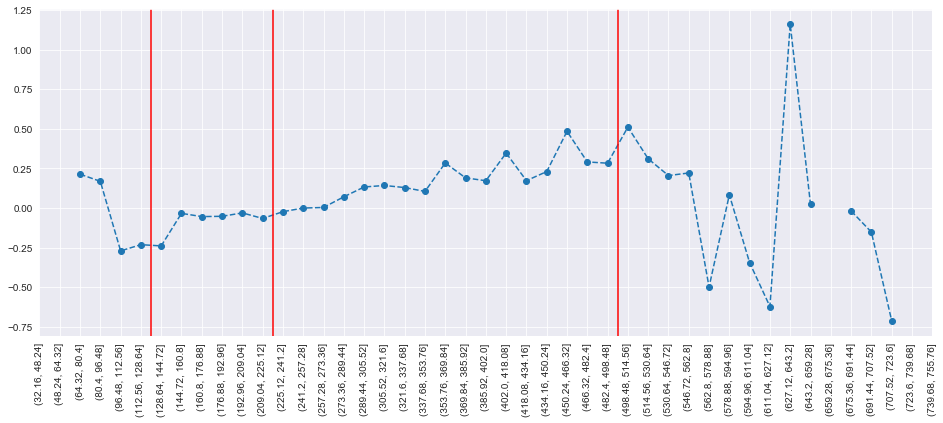

In [113]:
data = df_Con_Woe_IV_msecl
plt.figure(figsize=(16,6))
plt.plot(np.array(data['mths_since_earliest_cr_line_factor'].apply(str)), data['WoE'], '--o')
plt.xticks(rotation = 90)
plt.axvline([7.5], color='red') # <141
plt.axvline([13.5], color='red') # 141 - 248
plt.axvline([30.5], color='red') # 248 - 549
                                # > 549 

plt.show()

In [114]:
# We create the following categories:
# < 141
df_inputs_prepr['mths_since_earliest_cr_line:<141'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(141)), 1, 0)

# 141 - 248
df_inputs_prepr['mths_since_earliest_cr_line:141-248'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(141, 248)), 1, 0)

# 248 - 549
df_inputs_prepr['mths_since_earliest_cr_line:248-549'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 549)), 1, 0)

# > 549
df_inputs_prepr['mths_since_earliest_cr_line:>549'] = np.where((df_inputs_prepr['mths_since_earliest_cr_line']>549), 1, 0)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

### `delinq_2yrs`

In [115]:
df_inputs_prepr['delinq_2yrs'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  6.,  5.,  7., 16.,  8., 18., 10.,  9.,
       13., 11., 14., 12., 19., 15.])

In [116]:
df_inputs_prepr['delinq_2yrs'].nunique()
# No need to fine classing

19

In [117]:
df_Con_Woe_IV_delinq_2yrs= Woe_IV_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
df_Con_Woe_IV_delinq_2yrs

delinq_2yrs  n_obs  prop_good  prop_bad  prop_n_obs   n_good   n_bad  \
0           0.0  76566   0.890944  0.109056   82.102148  68216.0  8350.0   
1           1.0  11297   0.890413  0.109587   12.113836  10059.0  1238.0   
2           2.0   3192   0.885025  0.114975    3.422799   2825.0   367.0   
3           3.0   1134   0.893298  0.106702    1.215995   1013.0   121.0   
4           4.0    510   0.886275  0.113725    0.546876    452.0    58.0   
5           5.0    270   0.911111  0.088889    0.289523    246.0    24.0   
6           6.0    128   0.859375  0.140625    0.137255    110.0    18.0   
7           7.0     67   0.925373  0.074627    0.071844     62.0     5.0   
8           8.0     29   0.896552  0.103448    0.031097     26.0     3.0   
9           9.0     22   0.954545  0.045455    0.023591     21.0     1.0   
10         10.0      9   0.888889  0.111111    0.009651      8.0     1.0   
11         11.0     10   1.000000  0.000000    0.010723     10.0     0.0   
12         12.0      8   0.625000  0.375000    0.008578      5.0     3.0   
13         13.0      7   0.857143  0.142857    0.007506      6.0     1.0   
14         14.0      2   1.000000  0.000000    0.002145      2.0     0.0   
15         15.0      1   1.000000  0.000000    0.001072      1.0     0.0   
16         16.0      1   1.000000  0.000000    0.001072      1.0     0.0   
17         18.0      3   1.000000  0.000000    0.003217      3.0     0.0   
18         19.0      1   1.000000  0.000000    0.001072      1.0     0.0   

    prop_n_good  prop_n_bad       WoE            IV  sum_IV  
0     82.121661   81.943081  0.002177  3.887564e-06     inf  
1     12.109502   12.149166 -0.003270  1.297041e-06     inf  
2      3.400869    3.601570 -0.057339  1.150797e-04     inf  
3      1.219498    1.187439  0.026640  8.540572e-06     inf  
4      0.544139    0.569185 -0.045001  1.127126e-05     inf  
5      0.296146    0.235525  0.229037  1.388456e-04     inf  
6      0.132423    0.176644 -0.288132  1.274136e-04     inf  
7      0.074639    0.049068  0.419456  1.072583e-04     inf  
8      0.031300    0.029441  0.061244  1.138767e-06     inf  
9      0.025281    0.009814  0.946282  1.463638e-04     inf  
10     0.009631    0.009814 -0.018799  3.435779e-08     inf  
11     0.012038    0.000000       inf           inf     inf  
12     0.006019    0.029441 -1.587415  3.717947e-04     inf  
13     0.007223    0.009814 -0.306481  7.939266e-06     inf  
14     0.002408    0.000000       inf           inf     inf  
15     0.001204    0.000000       inf           inf     inf  
16     0.001204    0.000000       inf           inf     inf  
17     0.003612    0.000000       inf           inf     inf  
18     0.001204    0.000000       inf           inf     inf

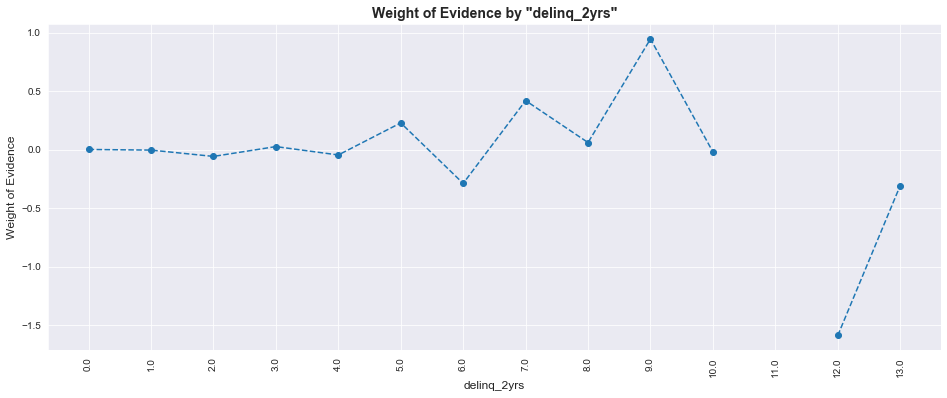

In [118]:
plot_by_woe(df_Con_Woe_IV_delinq_2yrs,90)

In [119]:
# Categories: 0 
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
# Categories: 1-3
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
# Categories: >=4
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

### `inq_last_6mths`

Definition : Simply put, a credit inquiry is a credit check. Inquiries happen when there is a legally permitted request to see your credit report from a company or person.

- https://www.transunion.com/article/credit-corner-whats-an-inquiry
- https://www.lendingclub.com/loans/resource-center/key-terms-about-money-and-credit

In [120]:
df_inputs_prepr['inq_last_6mths'].unique()

array([ 0.,  1.,  2.,  5.,  4.,  6.,  3.,  7.,  8., 11.,  9., 18., 19.,
       24., 10., 12., 13., 14.])

In [121]:
df_inputs_prepr['inq_last_6mths'].nunique()

18

In [122]:
df_Con_Woe_IV_inq_last6 = Woe_IV_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_Con_Woe_IV_inq_last6

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


inq_last_6mths  n_obs  prop_good  prop_bad  prop_n_obs   n_good   n_bad  \
0              0.0  48295   0.910094  0.089906   51.786997  43953.0  4342.0   
1              1.0  25985   0.882394  0.117606   27.863860  22929.0  3056.0   
2              2.0  11611   0.861252  0.138748   12.450540  10000.0  1611.0   
3              3.0   5086   0.846245  0.153755    5.453746   4304.0   782.0   
4              4.0   1431   0.841370  0.158630    1.534469   1204.0   227.0   
5              5.0    551   0.842105  0.157895    0.590840    464.0    87.0   
6              6.0    211   0.763033  0.236967    0.226256    161.0    50.0   
7              7.0     36   0.527778  0.472222    0.038603     19.0    17.0   
8              8.0     21   0.523810  0.476190    0.022518     11.0    10.0   
9              9.0      7   0.428571  0.571429    0.007506      3.0     4.0   
10            10.0      7   0.857143  0.142857    0.007506      6.0     1.0   
11            11.0      7   1.000000  0.000000    0.007506      7.0     0.0   
12            12.0      3   1.000000  0.000000    0.003217      3.0     0.0   
13            13.0      1   0.000000  1.000000    0.001072      0.0     1.0   
14            14.0      1   0.000000  1.000000    0.001072      0.0     1.0   
15            18.0      2   0.500000  0.500000    0.002145      1.0     1.0   
16            19.0      1   1.000000  0.000000    0.001072      1.0     0.0   
17            24.0      1   1.000000  0.000000    0.001072      1.0     0.0   

    prop_n_good  prop_n_bad       WoE        IV  sum_IV  
0     52.912709   42.610402  0.216545  0.022309     inf  
1     27.603019   29.990186 -0.082945  0.001980     inf  
2     12.038475   15.809617 -0.272511  0.010277     inf  
3      5.181360    7.674190 -0.392795  0.009792     inf  
4      1.449432    2.227674 -0.429786  0.003345     inf  
5      0.558585    0.853778 -0.424264  0.001252     inf  
6      0.193819    0.490677 -0.928859  0.002757     inf  
7      0.022873    0.166830 -1.987015  0.002860     inf  
8      0.013242    0.098135 -2.002930  0.001700     inf  
9      0.003612    0.039254 -2.385923  0.000850     inf  
10     0.007223    0.009814 -0.306481  0.000008     inf  
11     0.008427    0.000000       inf       inf     inf  
12     0.003612    0.000000       inf       inf     inf  
13     0.000000    0.009814      -inf       inf     inf  
14     0.000000    0.009814      -inf       inf     inf  
15     0.001204    0.009814 -2.098241  0.000181     inf  
16     0.001204    0.000000       inf       inf     inf  
17     0.001204    0.000000       inf       inf     inf

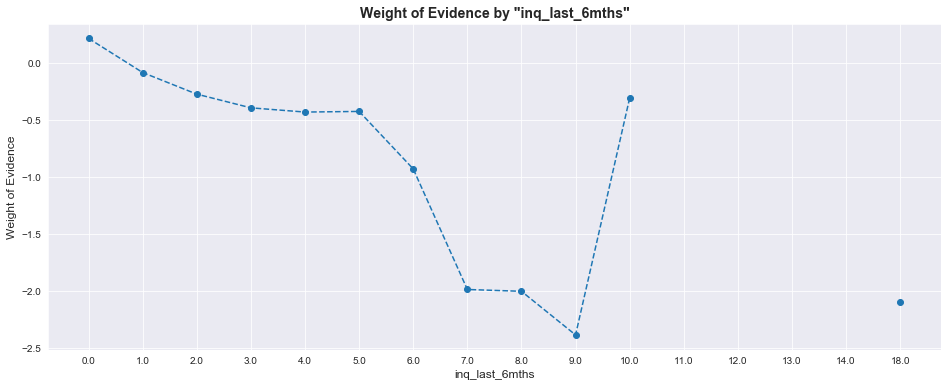

In [123]:
plot_by_woe(df_Con_Woe_IV_inq_last6,0)

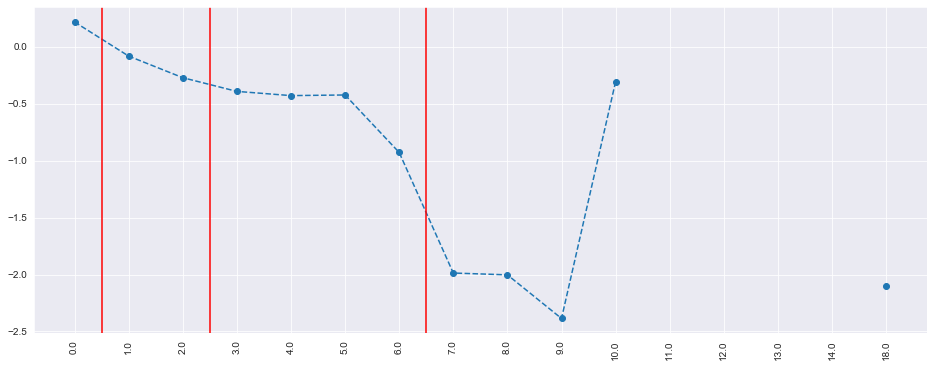

In [124]:
data = df_Con_Woe_IV_inq_last6
plt.figure(figsize=(16,6))
plt.plot(np.array(data['inq_last_6mths'].apply(str)), data['WoE'], '--o')
plt.xticks(rotation = 90)
plt.axvline([0.5], color='red') # = 0
plt.axvline([2.5], color='red') # 1-2
plt.axvline([6.5], color='red') # 3-6
plt.show()                                

In [125]:
# Categories: 0
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
# Categories 1 - 2
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
# Categories 3 - 6
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
# Categories > 6
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

### `open_acc`

In [126]:
df_inputs_prepr['open_acc'].unique()

array([ 7., 18.,  9., 12.,  5., 22.,  3., 17., 16.,  6., 10., 20., 23.,
       13.,  4., 15., 14., 11., 19., 24., 21.,  8., 31., 26.,  1., 32.,
       37., 27., 25.,  2., 28., 29., 30., 39., 34., 33., 35., 36., 40.,
        0., 38., 53., 48., 52., 46., 42., 45., 43., 58., 41., 49., 61.,
       50.])

In [127]:
df_inputs_prepr['open_acc'].nunique()

53

In [128]:
# pd.options.display.max_rows = None
pd.set_option("display.max_rows",None)

In [129]:
df_Con_Woe_IV_open_acc = Woe_IV_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
df_Con_Woe_IV_open_acc

open_acc  n_obs  prop_good  prop_bad  prop_n_obs  n_good  n_bad  \
0        0.0      7   1.000000  0.000000    0.007506     7.0    0.0   
1        1.0     32   0.875000  0.125000    0.034314    28.0    4.0   
2        2.0    334   0.838323  0.161677    0.358150   280.0   54.0   
3        3.0   1122   0.852941  0.147059    1.203127   957.0  165.0   
4        4.0   2560   0.892188  0.107812    2.745102  2284.0  276.0   
5        5.0   4403   0.891438  0.108562    4.721361  3925.0  478.0   
6        6.0   6216   0.890766  0.109234    6.665451  5537.0  679.0   
7        7.0   7433   0.886856  0.113144    7.970447  6592.0  841.0   
8        8.0   8314   0.893433  0.106567    8.915148  7428.0  886.0   
9        9.0   8768   0.888230  0.111770    9.401975  7788.0  980.0   
10      10.0   8576   0.889109  0.110891    9.196093  7625.0  951.0   
11      11.0   7740   0.894444  0.105556    8.299645  6923.0  817.0   
12      12.0   6886   0.887017  0.112983    7.383896  6108.0  778.0   
13      13.0   5914   0.893304  0.106696    6.341615  5283.0  631.0   
14      14.0   4960   0.895766  0.104234    5.318636  4443.0  517.0   
15      15.0   4006   0.892162  0.107838    4.295656  3574.0  432.0   
16      16.0   3269   0.898134  0.101866    3.505367  2936.0  333.0   
17      17.0   2680   0.886940  0.113060    2.873779  2377.0  303.0   
18      18.0   2259   0.902169  0.097831    2.422338  2038.0  221.0   
19      19.0   1811   0.893429  0.106571    1.941945  1618.0  193.0   
20      20.0   1444   0.898199  0.101801    1.548409  1297.0  147.0   
21      21.0   1037   0.880424  0.119576    1.111981   913.0  124.0   
22      22.0    784   0.887755  0.112245    0.840688   696.0   88.0   
23      23.0    628   0.904459  0.095541    0.673408   568.0   60.0   
24      24.0    473   0.890063  0.109937    0.507201   421.0   52.0   
25      25.0    391   0.882353  0.117647    0.419271   345.0   46.0   
26      26.0    250   0.884000  0.116000    0.268076   221.0   29.0   
27      27.0    204   0.911765  0.088235    0.218750   186.0   18.0   
28      28.0    153   0.895425  0.104575    0.164063   137.0   16.0   
29      29.0    128   0.843750  0.156250    0.137255   108.0   20.0   
30      30.0    107   0.906542  0.093458    0.114737    97.0   10.0   
31      31.0     73   0.890411  0.109589    0.078278    65.0    8.0   
32      32.0     62   0.951613  0.048387    0.066483    59.0    3.0   
33      33.0     47   0.851064  0.148936    0.050398    40.0    7.0   
34      34.0     40   0.825000  0.175000    0.042892    33.0    7.0   
35      35.0     33   0.939394  0.060606    0.035386    31.0    2.0   
36      36.0     22   0.772727  0.227273    0.023591    17.0    5.0   
37      37.0     21   0.857143  0.142857    0.022518    18.0    3.0   
38      38.0     14   0.928571  0.071429    0.015012    13.0    1.0   
39      39.0     12   0.916667  0.083333    0.012868    11.0    1.0   
40      40.0      9   0.555556  0.444444    0.009651     5.0    4.0   
41      41.0      6   1.000000  0.000000    0.006434     6.0    0.0   
42      42.0      7   1.000000  0.000000    0.007506     7.0    0.0   
43      43.0      4   1.000000  0.000000    0.004289     4.0    0.0   
44      45.0      4   1.000000  0.000000    0.004289     4.0    0.0   
45      46.0      2   1.000000  0.000000    0.002145     2.0    0.0   
46      48.0      2   1.000000  0.000000    0.002145     2.0    0.0   
47      49.0      2   1.000000  0.000000    0.002145     2.0    0.0   
48      50.0      1   1.000000  0.000000    0.001072     1.0    0.0   
49      52.0      1   1.000000  0.000000    0.001072     1.0    0.0   
50      53.0      2   1.000000  0.000000    0.002145     2.0    0.0   
51      58.0      3   1.000000  0.000000    0.003217     3.0    0.0   
52      61.0      1   1.000000  0.000000    0.001072     1.0    0.0   

    prop_n_good  prop_n_bad       WoE            IV  sum_IV  
0      0.008427    0.000000       inf           inf     inf  
1      0.033708    0.039254 -0.152331  8.4489

In [130]:
pd.reset_option('display.max_rows')

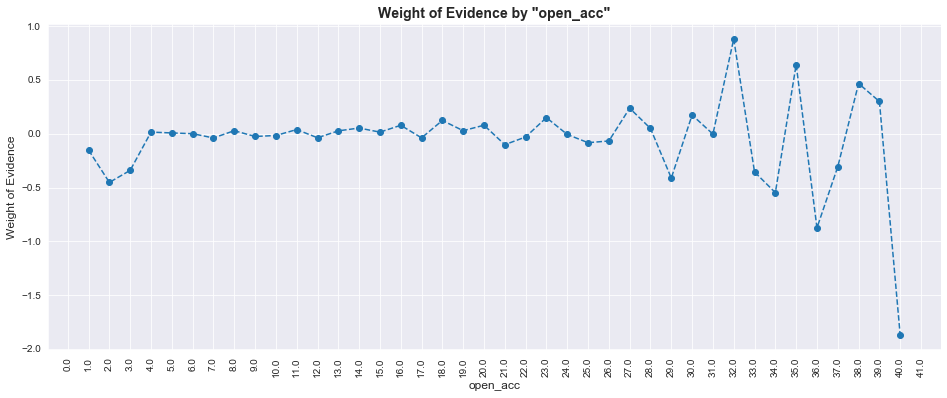

In [131]:
plot_by_woe(df_Con_Woe_IV_open_acc, 90)
# from 41 - end :we found sam case as funded_amount_factor 

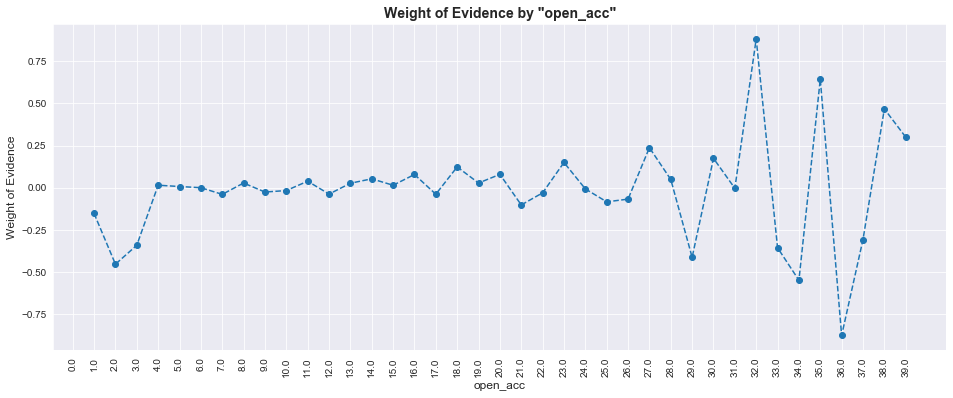

In [132]:
# Exclue value > 40
plot_by_woe(df_Con_Woe_IV_open_acc.iloc[ :40 , :], 90)

In [133]:
# 0
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
# 1-3
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
# 4-12
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
# 13-17
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
# 18-22
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
# 23-25
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
# 26-30
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
# >30
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

### `pub_rec`

Number of derogatory public records

If you’ve experienced financial misfortune, from late bills to bankruptcy, that negative information can appear on your credit reports as a “derogatory mark.” It may stay there for several years, but there are a few ways you can address it: dispute the mark if it’s an error, start healing your credit or wait out the clock.

https://www.creditkarma.com/advice/i/what-does-derogatory-mean

In [134]:
df_Con_Woe_IV_pub_rec = Woe_IV_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
df_Con_Woe_IV_pub_rec

pub_rec  n_obs  prop_good  prop_bad  prop_n_obs   n_good   n_bad  \
0       0.0  80923   0.889179  0.110821   86.774183  71955.0  8968.0   
1       1.0  10670   0.901125  0.098875   11.441500   9615.0  1055.0   
2       2.0   1097   0.904284  0.095716    1.176319    992.0   105.0   
3       3.0    331   0.900302  0.099698    0.354933    298.0    33.0   
4       4.0    112   0.857143  0.142857    0.120098     96.0    16.0   
5       5.0     73   0.904110  0.095890    0.078278     66.0     7.0   
6       6.0     19   0.894737  0.105263    0.020374     17.0     2.0   
7       7.0     14   0.785714  0.214286    0.015012     11.0     3.0   
8       8.0      5   0.800000  0.200000    0.005362      4.0     1.0   
9       9.0      2   1.000000  0.000000    0.002145      2.0     0.0   
10     10.0      3   1.000000  0.000000    0.003217      3.0     0.0   
11     11.0      5   1.000000  0.000000    0.005362      5.0     0.0   
12     12.0      1   1.000000  0.000000    0.001072      1.0     0.0   
13     14.0      1   1.000000  0.000000    0.001072      1.0     0.0   
14     49.0      1   1.000000  0.000000    0.001072      1.0     0.0   

    prop_n_good  prop_n_bad       WoE            IV  sum_IV  
0     86.622847   88.007851 -0.015862  2.196953e-04     inf  
1     11.574994   10.353288  0.111543  1.362727e-03     inf  
2      1.194217    1.030422  0.147522  2.416334e-04     inf  
3      0.358747    0.323847  0.102345  3.571813e-05     inf  
4      0.115569    0.157017 -0.306481  1.270283e-04     inf  
5      0.079454    0.068695  0.145504  1.565497e-05     inf  
6      0.020465    0.019627  0.041825  3.506324e-07     inf  
7      0.013242    0.029441 -0.798958  1.294176e-04     inf  
8      0.004815    0.009814 -0.711946  3.558416e-05     inf  
9      0.002408    0.000000       inf           inf     inf  
10     0.003612    0.000000       inf           inf     inf  
11     0.006019    0.000000       inf           inf     inf  
12     0.001204    0.000000       inf           inf     inf  
13     0.001204    0.000000       inf           inf     inf  
14     0.001204    0.000000       inf           inf     inf

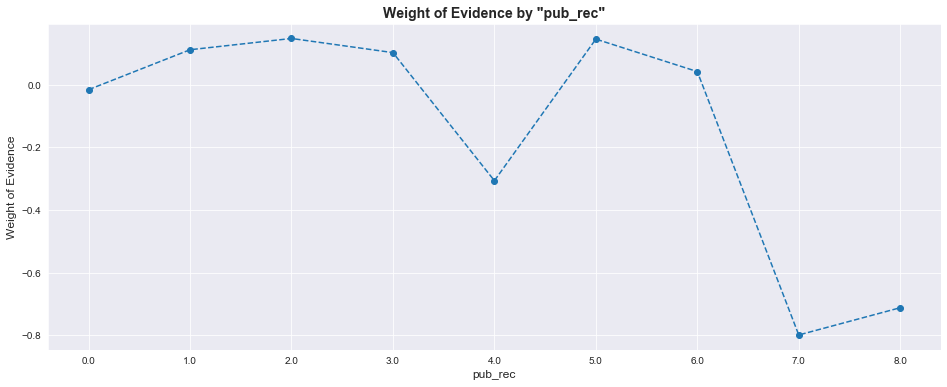

In [135]:
plot_by_woe(df_Con_Woe_IV_pub_rec)

In [136]:
#0-2
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec']>=0)&(df_inputs_prepr['pub_rec']<=2),1,0)
#3-4
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec']>=3)&(df_inputs_prepr['pub_rec']<=4),1,0)
#>=5
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

### `total_acc`

The total number of credit lines currently in the borrower's credit file

https://www.rockethq.com/learn/credit/how-many-lines-of-credit-should-i-have

In [137]:
df_inputs_prepr['total_acc'].unique()

array([ 20.,  43.,  38.,  31.,  36.,  48.,  10.,  45.,   5.,  32.,  26.,
        41.,  40.,  47.,   8.,  14.,  42.,  24.,   6.,  23.,  17.,  11.,
        25.,  21.,  28.,  29.,  12.,  37.,  19.,  35.,  34.,  30.,  18.,
        13.,   9.,  44.,  50.,  22.,  33.,  59.,  16.,  15.,  27.,  39.,
        46.,  63.,   7.,  52.,  56.,  54.,  49.,   4.,  57.,  60.,  53.,
        67.,  51.,  55.,  65.,  61., 156.,   3.,  66.,  58.,  80.,  64.,
        62.,  73.,  71.,  72.,  91.,  79.,  69.,   2.,  78.,   0.,  81.,
        92.,  74.,  70.,  77.,  75.,  68.,  76.,  85.,  88.,  94.,  97.,
         1.,  99.,  86.,  89.,  84.,  83.,  82.,  93.])

In [138]:
df_inputs_prepr['total_acc'].nunique()

96

In [139]:
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
df_inputs_prepr['total_acc_factor']

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


362514    (18.72, 21.84]
288564    (40.56, 43.68]
213591    (37.44, 40.56]
263083     (28.08, 31.2]
165001    (18.72, 21.84]
               ...      
115         (6.24, 9.36]
296284    (21.84, 24.96]
61777      (31.2, 34.32]
91763     (21.84, 24.96]
167512    (34.32, 37.44]
Name: total_acc_factor, Length: 93257, dtype: category
Categories (50, interval[float64]): [(-0.156, 3.12] < (3.12, 6.24] < (6.24, 9.36] < (9.36, 12.48] ... (143.52, 146.64] < (146.64, 149.76] < (149.76, 152.88] < (152.88, 156.0]]

In [140]:
df_Con_Woe_IV_total_acc = Woe_IV_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
df_Con_Woe_IV_total_acc

total_acc_factor  n_obs  prop_good  prop_bad  prop_n_obs   n_good   n_bad  \
0     (-0.156, 3.12]    125   0.776000  0.224000    0.134038     97.0    28.0   
1       (3.12, 6.24]   1499   0.850567  0.149433    1.607386   1275.0   224.0   
2       (6.24, 9.36]   3715   0.871871  0.128129    3.983615   3239.0   476.0   
3      (9.36, 12.48]   6288   0.874841  0.125159    6.742657   5501.0   787.0   
4      (12.48, 15.6]   8289   0.888286  0.111714    8.888341   7363.0   926.0   
5      (15.6, 18.72]   9843   0.890176  0.109824   10.554704   8762.0  1081.0   
6     (18.72, 21.84]  10270   0.893866  0.106134   11.012578   9180.0  1090.0   
7     (21.84, 24.96]   9971   0.892789  0.107211   10.691959   8902.0  1069.0   
8     (24.96, 28.08]  11873   0.892108  0.107892   12.731484  10592.0  1281.0   
9      (28.08, 31.2]   7289   0.892715  0.107285    7.816035   6507.0   782.0   
10     (31.2, 34.32]   6151   0.902617  0.097383    6.595752   5552.0   599.0   
11    (34.32, 37.44]   4745   0.905796  0.094204    5.088090   4298.0   447.0   
12    (37.44, 40.56]   3615   0.897372  0.102628    3.876385   3244.0   371.0   
13    (40.56, 43.68]   2883   0.890045  0.109955    3.091457   2566.0   317.0   
14     (43.68, 46.8]   1938   0.891641  0.108359    2.078128   1728.0   210.0   
15     (46.8, 49.92]   1478   0.905954  0.094046    1.584868   1339.0   139.0   
16    (49.92, 53.04]   1309   0.902215  0.097785    1.403648   1181.0   128.0   
17    (53.04, 56.16]    640   0.893750  0.106250    0.686276    572.0    68.0   
18    (56.16, 59.28]    428   0.873832  0.126168    0.458947    374.0    54.0   
19     (59.28, 62.4]    386   0.878238  0.121762    0.413910    339.0    47.0   
20     (62.4, 65.52]    322   0.844720  0.155280    0.345282    272.0    50.0   
21    (65.52, 68.64]     57   0.947368  0.052632    0.061121     54.0     3.0   
22    (68.64, 71.76]     43   0.906977  0.093023    0.046109     39.0     4.0   
23    (71.76, 74.88]     24   1.000000  0.000000    0.025735     24.0     0.0   
24     (74.88, 78.0]     26   0.923077  0.076923    0.027880     24.0     2.0   
25     (78.0, 81.12]     13   0.769231  0.230769    0.013940     10.0     3.0   
26    (81.12, 84.24]     11   0.909091  0.090909    0.011795     10.0     1.0   
27    (84.24, 87.36]      8   0.875000  0.125000    0.008578      7.0     1.0   
28    (87.36, 90.48]      6   0.833333  0.166667    0.006434      5.0     1.0   
29     (90.48, 93.6]      7   0.857143  0.142857    0.007506      6.0     1.0   
30     (93.6, 96.72]      1   1.000000  0.000000    0.001072      1.0     0.0   
31    (96.72, 99.84]      3   1.000000  0.000000    0.003217      3.0     0.0   
32   (99.84, 102.96]      0        NaN       NaN    0.000000      NaN     NaN   
33  (102.96, 106.08]      0        NaN       NaN    0.000000      NaN     NaN   
34   (106.08, 109.2]      0        NaN       NaN    0.000000      NaN     NaN   
35   (109.2, 112.32]      0        NaN       NaN    0.000000      NaN     NaN   
36  (112.32, 115.44]      0        NaN       NaN    0.000000      NaN     NaN   
37  (115.44, 118.56]      0        NaN       NaN    0.000000      NaN     NaN   
38  (118.56, 121.68]      0        NaN       NaN    0.000000      NaN     NaN   
39   (121.68, 124.8]      0        NaN       NaN    0.000000      NaN     NaN   
40   (124.8, 127.92]      0        NaN       NaN    0.000000      NaN     NaN   
41  (127.92, 131.04]      0        NaN       NaN    0.000000      NaN     NaN   
42  (131.04, 134.16]      0        NaN       NaN    0.000000      NaN     NaN   
43  (134.16, 137.28]      0        NaN       NaN    0.000000      NaN     NaN   
44   (137.28, 140.4]      0        NaN       NaN    0.000000      NaN     NaN   
45   (140.4, 143.52]      0        NaN       NaN    0.000000      NaN     NaN   
46  (143.52, 146.64]      0        NaN       NaN    0.000000      NaN     NaN   
47  (146.64, 149.76]      0        NaN       NaN    0.000000      NaN     NaN   
48  (149.76, 152.88]      0        

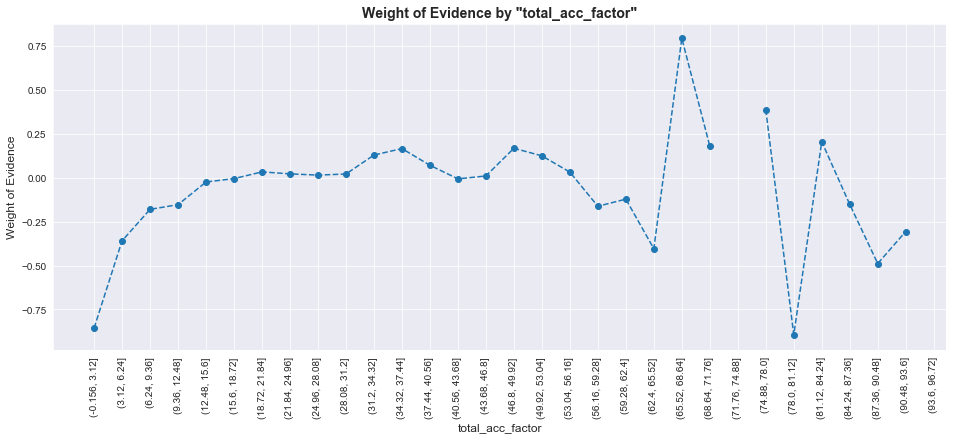

In [141]:
plot_by_woe(df_Con_Woe_IV_total_acc,90)

In [142]:
#<=21
df_inputs_prepr['total_acc:<=21'] = np.where((df_inputs_prepr['total_acc']<=21),1,0)
#22-51
df_inputs_prepr['total_acc:22-51'] = np.where((df_inputs_prepr['total_acc']>=22)&(df_inputs_prepr['total_acc']<=51),1,0)
#>51
df_inputs_prepr['total_acc:>=51'] = np.where((df_inputs_prepr['total_acc']>=52),1,0)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

### `acc_now_delinq`

The number of accounts on which the borrower is now delinquent.



In [143]:
df_inputs_prepr['acc_now_delinq'].unique()

array([0., 1., 2., 3.])

In [144]:
df_inputs_prepr['acc_now_delinq'].nunique()

4

In [145]:
df_Con_Woe_IV_acc_now_delinq = Woe_IV_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
df_Con_Woe_IV_acc_now_delinq

acc_now_delinq  n_obs  prop_good  prop_bad  prop_n_obs   n_good    n_bad  \
0             0.0  92871   0.890827  0.109173   99.586090  82732.0  10139.0   
1             1.0    360   0.872222  0.127778    0.386030    314.0     46.0   
2             2.0     22   0.818182  0.181818    0.023591     18.0      4.0   
3             3.0      4   0.750000  0.250000    0.004289      3.0      1.0   

   prop_n_good  prop_n_bad       WoE            IV    sum_IV  
0    99.596711   99.499509  0.000976  9.491073e-07  0.000298  
1     0.378008    0.451423 -0.177489  1.303033e-04  0.000298  
2     0.021669    0.039254 -0.594163  1.044831e-04  0.000298  
3     0.003612    0.009814 -0.999628  6.199695e-05  0.000298

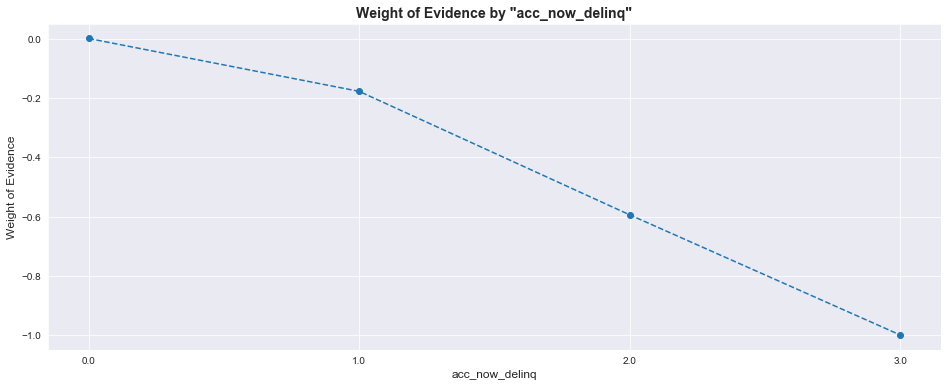

In [146]:
plot_by_woe(df_Con_Woe_IV_acc_now_delinq)

In [147]:
# Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### `total_rev_hi_lim`

Total revolving high credit/credit limit

https://www.investopedia.com/terms/r/revolvingcredit.asp

https://www.creditkarma.com/advice/i/what-is-revolving-credit

In [148]:
df_inputs_prepr['total_rev_hi_lim'].unique()

array([25100., 24000., 30000., ..., 61299., 21188., 13962.])

In [149]:
df_inputs_prepr['total_rev_hi_lim'].nunique()

4926

In [150]:
df_inputs_prepr['total_rev_hi_lim'].describe()

count    9.325700e+04
mean     2.758552e+04
std      2.939144e+04
min      0.000000e+00
25%      1.150000e+04
50%      2.010000e+04
75%      3.450000e+04
max      2.013133e+06
Name: total_rev_hi_lim, dtype: float64

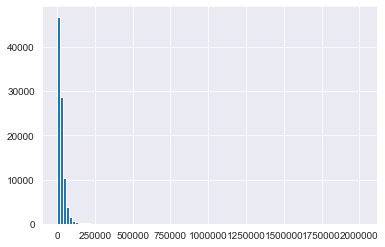

In [151]:
df_inputs_prepr['total_rev_hi_lim'].hist(bins=100)

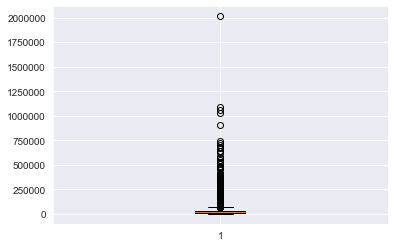

In [152]:
plt.boxplot(df_inputs_prepr['total_rev_hi_lim'])
plt.show()

In [153]:
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [154]:
pd.set_option('display.max_rows',None)

In [155]:
df_Con_Woe_IV_total_rev_hilim = Woe_IV_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
df_Con_Woe_IV_total_rev_hilim

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


total_rev_hi_lim_factor  n_obs  prop_good  prop_bad  prop_n_obs  \
0          (-2013.133, 1006.566]    238   0.840336  0.159664    0.255209   
1           (1006.566, 2013.133]    678   0.827434  0.172566    0.727023   
2             (2013.133, 3019.7]   1121   0.852810  0.147190    1.202055   
3             (3019.7, 4026.266]   1461   0.878166  0.121834    1.566638   
4           (4026.266, 5032.832]   2163   0.867776  0.132224    2.319397   
5           (5032.832, 6039.399]   2411   0.873911  0.126089    2.585329   
6           (6039.399, 7045.966]   2376   0.871212  0.128788    2.547798   
7           (7045.966, 8052.532]   2825   0.875398  0.124602    3.029263   
8           (8052.532, 9059.098]   2686   0.873045  0.126955    2.880213   
9          (9059.098, 10065.665]   3514   0.870233  0.129767    3.768082   
10        (10065.665, 11072.232]   2599   0.882647  0.117353    2.786922   
11        (11072.232, 12078.798]   3226   0.875387  0.124613    3.459258   
12        (12078.798, 13085.364]   2673   0.876543  0.123457    2.866273   
13        (13085.364, 14091.931]   2702   0.884160  0.115840    2.897370   
14        (14091.931, 15098.498]   3151   0.884481  0.115519    3.378835   
15        (15098.498, 16105.064]   2999   0.873958  0.126042    3.215844   
16         (16105.064, 17111.63]   2401   0.890462  0.109538    2.574606   
17         (17111.63, 18118.197]   2545   0.878978  0.121022    2.729018   
18        (18118.197, 19124.764]   2282   0.878177  0.121823    2.447001   
19         (19124.764, 20131.33]   2717   0.878911  0.121089    2.913454   
20         (20131.33, 21137.896]   2167   0.892940  0.107060    2.323686   
21        (21137.896, 22144.463]   1999   0.893447  0.106553    2.143539   
22         (22144.463, 23151.03]   1903   0.893326  0.106674    2.040597   
23         (23151.03, 24157.596]   1963   0.890474  0.109526    2.104936   
24        (24157.596, 25164.163]   2075   0.887229  0.112771    2.225034   
25        (25164.163, 26170.729]   1656   0.899758  0.100242    1.775738   
26        (26170.729, 27177.296]   1561   0.888533  0.111467    1.673869   
27        (27177.296, 28183.862]   1617   0.889920  0.110080    1.733918   
28        (28183.862, 29190.428]   1483   0.903574  0.096426    1.590229   
29        (29190.428, 30196.995]   1486   0.891655  0.108345    1.593446   
30        (30196.995, 31203.562]   1428   0.902661  0.097339    1.531252   
31        (31203.562, 32210.128]   1224   0.907680  0.092320    1.312502   
32        (32210.128, 33216.694]   1177   0.896347  0.103653    1.262104   
33        (33216.694, 34223.261]   1147   0.893636  0.106364    1.229934   
34        (34223.261, 35229.828]   1286   0.891913  0.108087    1.378985   
35        (35229.828, 36236.394]   1000   0.897000  0.103000    1.072306   
36         (36236.394, 37242.96]    934   0.905782  0.094218    1.001533   
37         (37242.96, 38249.527]    902   0.879157  0.120843    0.967220   
38        (38249.527, 39256.094]    891   0.900112  0.099888    0.955424   
39         (39256.094, 40262.66]    828   0.903382  0.096618    0.887869   
40         (40262.66, 41269.227]    797   0.908407  0.091593    0.854628   
41        (41269.227, 42275.793]    729   0.914952  0.085048    0.781711   
42         (42275.793, 43282.36]    716   0.895251  0.104749    0.767771   
43         (43282.36, 44288.926]    755   0.911258  0.088742    0.809591   
44        (44288.926, 45295.492]    647   0.919629  0.080371    0.693782   
45        (45295.492, 46302.059]    660   0.921212  0.078788    0.707722   
46        (46302.059, 47308.626]    550   0.932727  0.067273    0.589768   
47        (47308.626, 48315.192]    592   0.930743  0.069257    0.634805   
48        (48315.192, 49321.758]    522   0.900383  0.099617    0.559744   
49        (49321.758, 50328.325]    501   0.924152  0.075848    0.537225   
50        (50328.325, 51334.892]    506   0.897233  0.102767    0.542587   
51        (51334.892, 52341.458]    453   0.920530  0.079

In [156]:
pd.reset_option('display.max_rows')

In [157]:
df_Con_Woe_IV_total_rev_hilim.iloc[:50,:]

total_rev_hi_lim_factor  n_obs  prop_good  prop_bad  prop_n_obs  n_good  \
0    (-2013.133, 1006.566]    238   0.840336  0.159664    0.255209   200.0   
1     (1006.566, 2013.133]    678   0.827434  0.172566    0.727023   561.0   
2       (2013.133, 3019.7]   1121   0.852810  0.147190    1.202055   956.0   
3       (3019.7, 4026.266]   1461   0.878166  0.121834    1.566638  1283.0   
4     (4026.266, 5032.832]   2163   0.867776  0.132224    2.319397  1877.0   
5     (5032.832, 6039.399]   2411   0.873911  0.126089    2.585329  2107.0   
6     (6039.399, 7045.966]   2376   0.871212  0.128788    2.547798  2070.0   
7     (7045.966, 8052.532]   2825   0.875398  0.124602    3.029263  2473.0   
8     (8052.532, 9059.098]   2686   0.873045  0.126955    2.880213  2345.0   
9    (9059.098, 10065.665]   3514   0.870233  0.129767    3.768082  3058.0   
10  (10065.665, 11072.232]   2599   0.882647  0.117353    2.786922  2294.0   
11  (11072.232, 12078.798]   3226   0.875387  0.124613    3.459258  2824.0   
12  (12078.798, 13085.364]   2673   0.876543  0.123457    2.866273  2343.0   
13  (13085.364, 14091.931]   2702   0.884160  0.115840    2.897370  2389.0   
14  (14091.931, 15098.498]   3151   0.884481  0.115519    3.378835  2787.0   
15  (15098.498, 16105.064]   2999   0.873958  0.126042    3.215844  2621.0   
16   (16105.064, 17111.63]   2401   0.890462  0.109538    2.574606  2138.0   
17   (17111.63, 18118.197]   2545   0.878978  0.121022    2.729018  2237.0   
18  (18118.197, 19124.764]   2282   0.878177  0.121823    2.447001  2004.0   
19   (19124.764, 20131.33]   2717   0.878911  0.121089    2.913454  2388.0   
20   (20131.33, 21137.896]   2167   0.892940  0.107060    2.323686  1935.0   
21  (21137.896, 22144.463]   1999   0.893447  0.106553    2.143539  1786.0   
22   (22144.463, 23151.03]   1903   0.893326  0.106674    2.040597  1700.0   
23   (23151.03, 24157.596]   1963   0.890474  0.109526    2.104936  1748.0   
24  (24157.596, 25164.163]   2075   0.887229  0.112771    2.225034  1841.0   
25  (25164.163, 26170.729]   1656   0.899758  0.100242    1.775738  1490.0   
26  (26170.729, 27177.296]   1561   0.888533  0.111467    1.673869  1387.0   
27  (27177.296, 28183.862]   1617   0.889920  0.110080    1.733918  1439.0   
28  (28183.862, 29190.428]   1483   0.903574  0.096426    1.590229  1340.0   
29  (29190.428, 30196.995]   1486   0.891655  0.108345    1.593446  1325.0   
30  (30196.995, 31203.562]   1428   0.902661  0.097339    1.531252  1289.0   
31  (31203.562, 32210.128]   1224   0.907680  0.092320    1.312502  1111.0   
32  (32210.128, 33216.694]   1177   0.896347  0.103653    1.262104  1055.0   
33  (33216.694, 34223.261]   1147   0.893636  0.106364    1.229934  1025.0   
34  (34223.261, 35229.828]   1286   0.891913  0.108087    1.378985  1147.0   
35  (35229.828, 36236.394]   1000   0.897000  0.103000    1.072306   897.0   
36   (36236.394, 37242.96]    934   0.905782  0.094218    1.001533   846.0   
37   (37242.96, 38249.527]    902   0.879157  0.120843    0.967220   793.0   
38  (38249.527, 39256.094]    891   0.900112  0.099888    0.955424   802.0   
39   (39256.094, 40262.66]    828   0.903382  0.096618    0.887869   748.0   
40   (40262.66, 41269.227]    797   0.908407  0.091593    0.854628   724.0   
41  (41269.227, 42275.793]    729   0.914952  0.085048    0.781711   667.0   
42   (42275.793, 43282.36]    716   0.895251  0.104749    0.767771   641.0   
43   (43282.36, 44288.926]    755   0.911258  0.088742    0.809591   688.0   
44  (44288.926, 45295.492]    647   0.919629  0.080371    0.693782   595.0   
45  (45295.492, 46302.059]    660   0.921212  0.078788    0.707722   608.0   
46  (46302.059, 47308.626]    550   0.932727  0.067273    0.589768   513.0   
47  (47308.626, 48315.192]    592   0.930743  0.069257    0.634805   551.0   
48  (48315.192, 49321.758]    522   0.900383  0.099617    0.559744   470.0   
49  (49321.758, 50328.325]    501   0.924152  0.075848    0.537225   463.0   

    n_bad  prop_n_good  

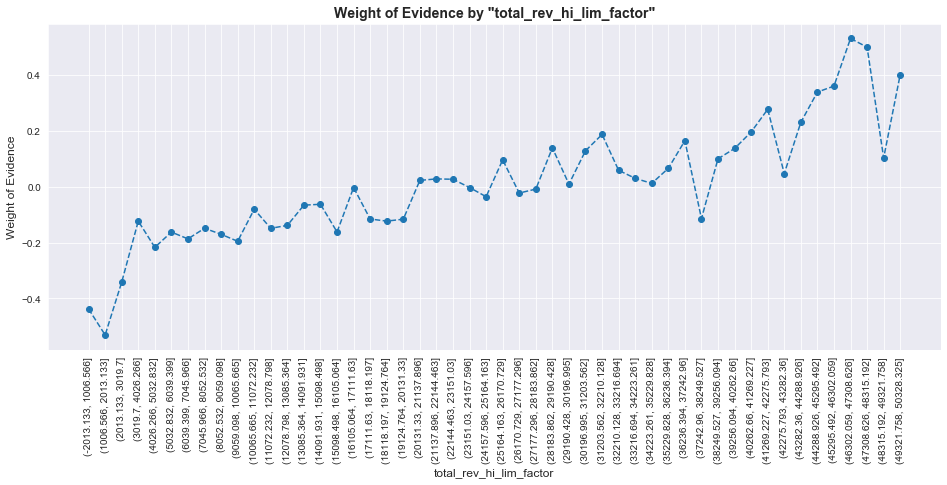

In [158]:
plot_by_woe(df_Con_Woe_IV_total_rev_hilim.iloc[:50,:],90)

In [159]:
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

### `installment`

In [160]:
df_inputs_prepr['installment'].unique()

array([ 773.01,  297.53, 1034.83, ...,  414.23,  494.33,  121.42])

In [161]:
df_inputs_prepr['installment'].nunique()

26917

In [162]:
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [163]:
df_Con_Woe_IV_installment = Woe_IV_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
df_Con_Woe_IV_installment

installment_factor  n_obs  prop_good  prop_bad  prop_n_obs  n_good  \
0      (14.369, 43.585]    485   0.872165  0.127835    0.520068   423.0   
1       (43.585, 71.41]   1246   0.904494  0.095506    1.336093  1127.0   
2       (71.41, 99.235]   1731   0.895436  0.104564    1.856161  1550.0   
3      (99.235, 127.06]   2292   0.896597  0.103403    2.457724  2055.0   
4     (127.06, 154.885]   2602   0.886241  0.113759    2.790139  2306.0   
5     (154.885, 182.71]   4133   0.897653  0.102347    4.431839  3710.0   
6     (182.71, 210.535]   4109   0.905086  0.094914    4.406104  3719.0   
7     (210.535, 238.36]   3730   0.901877  0.098123    3.999700  3364.0   
8     (238.36, 266.185]   4660   0.899785  0.100215    4.996944  4193.0   
9     (266.185, 294.01]   4975   0.888844  0.111156    5.334720  4422.0   
10    (294.01, 321.835]   5186   0.906286  0.093714    5.560977  4700.0   
11    (321.835, 349.66]   6432   0.892568  0.107432    6.897069  5741.0   
12    (349.66, 377.485]   4758   0.881673  0.118327    5.102030  4195.0   
13    (377.485, 405.31]   4352   0.900276  0.099724    4.666674  3918.0   
14    (405.31, 433.135]   3429   0.882765  0.117235    3.676936  3027.0   
15    (433.135, 460.96]   3225   0.879380  0.120620    3.458185  2836.0   
16    (460.96, 488.785]   3865   0.894437  0.105563    4.144461  3457.0   
17    (488.785, 516.61]   3861   0.884227  0.115773    4.140172  3414.0   
18    (516.61, 544.435]   2730   0.868864  0.131136    2.927394  2372.0   
19    (544.435, 572.26]   2564   0.877535  0.122465    2.749391  2250.0   
20    (572.26, 600.085]   2434   0.873870  0.126130    2.609992  2127.0   
21    (600.085, 627.91]   2294   0.901918  0.098082    2.459869  2069.0   
22    (627.91, 655.735]   2091   0.901004  0.098996    2.242191  1884.0   
23    (655.735, 683.56]   2295   0.894989  0.105011    2.460941  2054.0   
24    (683.56, 711.385]   1650   0.876970  0.123030    1.769304  1447.0   
25    (711.385, 739.21]   1252   0.892173  0.107827    1.342527  1117.0   
26    (739.21, 767.035]   1360   0.897794  0.102206    1.458336  1221.0   
27    (767.035, 794.86]   1160   0.886207  0.113793    1.243874  1028.0   
28    (794.86, 822.685]   1023   0.888563  0.111437    1.096969   909.0   
29    (822.685, 850.51]    967   0.885212  0.114788    1.036919   856.0   
30    (850.51, 878.335]   1046   0.894837  0.105163    1.121632   936.0   
31    (878.335, 906.16]    707   0.861386  0.138614    0.758120   609.0   
32    (906.16, 933.985]    604   0.855960  0.144040    0.647673   517.0   
33    (933.985, 961.81]    635   0.861417  0.138583    0.680914   547.0   
34    (961.81, 989.635]    460   0.850000  0.150000    0.493261   391.0   
35   (989.635, 1017.46]    441   0.854875  0.145125    0.472887   377.0   
36  (1017.46, 1045.285]    305   0.875410  0.124590    0.327053   267.0   
37  (1045.285, 1073.11]    206   0.878641  0.121359    0.220895   181.0   
38  (1073.11, 1100.935]    228   0.894737  0.105263    0.244486   204.0   
39  (1100.935, 1128.76]    247   0.931174  0.068826    0.264859   230.0   
40  (1128.76, 1156.585]    227   0.916300  0.083700    0.243413   208.0   
41  (1156.585, 1184.41]    287   0.895470  0.104530    0.307752   257.0   
42  (1184.41, 1212.235]    308   0.905844  0.094156    0.330270   279.0   
43  (1212.235, 1240.06]    284   0.901408  0.098592    0.304535   256.0   
44  (1240.06, 1267.885]    159   0.861635  0.138365    0.170497   137.0   
45  (1267.885, 1295.71]    132   0.833333  0.166667    0.141544   110.0   
46  (1295.71, 1323.535]     47   0.787234  0.212766    0.050398    37.0   
47  (1323.535, 1351.36]     21   0.714286  0.285714    0.022518    15.0   
48  (1351.36, 1379.185]     15   0.733333  0.266667    0.016085    11.0   
49  (1379.185, 1407.01]      7   1.000000  0.000000    0.007506     7.0   

    n_bad  prop_n_good  prop_n_bad       WoE        IV  sum_IV  
0    62.0     0.509227    0.608440 -0.178003  0.000177     inf  
1   119.0     1.356736    1.167812  0.149950  0.0

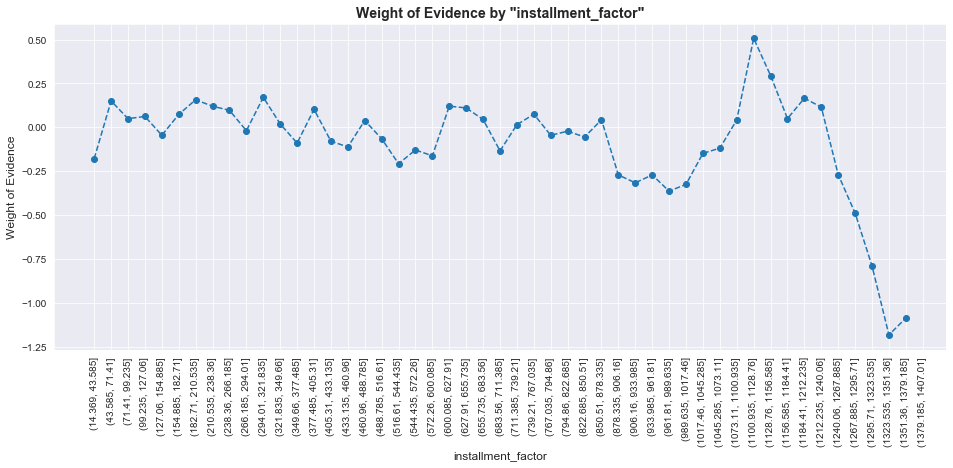

In [164]:
plot_by_woe(df_Con_Woe_IV_installment, 90)

Vary Low Information Value. No need for further fine classing.

## Preprocessing Continuous Variables: Creating Dummy Variables, Part 3

### `annual_inc`

In [165]:
df_inputs_prepr['annual_inc'].unique()

array([ 65000.,  60000., 175000., ...,  81961.,  29310.,  47939.])

In [166]:
df_inputs_prepr['annual_inc'].nunique()

9043

In [167]:
# Fine Classing
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
df_inputs_prepr['annual_inc_factor']

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


362514     (-2695.2, 154704.0]
288564     (-2695.2, 154704.0]
213591    (154704.0, 304608.0]
263083     (-2695.2, 154704.0]
165001     (-2695.2, 154704.0]
                  ...         
115        (-2695.2, 154704.0]
296284     (-2695.2, 154704.0]
61777      (-2695.2, 154704.0]
91763      (-2695.2, 154704.0]
167512     (-2695.2, 154704.0]
Name: annual_inc_factor, Length: 93257, dtype: category
Categories (50, interval[float64]): [(-2695.2, 154704.0] < (154704.0, 304608.0] < (304608.0, 454512.0] < (454512.0, 604416.0] ... (6900384.0, 7050288.0] < (7050288.0, 7200192.0] < (7200192.0, 7350096.0] < (7350096.0, 7500000.0]]

In [168]:
df_Con_Woe_IV_ann_inc = Woe_IV_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_Con_Woe_IV_ann_inc
#with 50 class/ dummy weve got 94% of data is in class 1 ((-5243.882, 144693.64), 
# Hence try to make it finer class (100 class/dummy)

annual_inc_factor  n_obs  prop_good  prop_bad  prop_n_obs   n_good  \
0      (-2695.2, 154704.0]  89203   0.889040  0.110960   95.652873  79305.0   
1     (154704.0, 304608.0]   3626   0.926641  0.073359    3.888180   3360.0   
2     (304608.0, 454512.0]    282   0.929078  0.070922    0.302390    262.0   
3     (454512.0, 604416.0]     86   0.965116  0.034884    0.092218     83.0   
4     (604416.0, 754320.0]     23   0.956522  0.043478    0.024663     22.0   
5     (754320.0, 904224.0]     18   0.944444  0.055556    0.019302     17.0   
6    (904224.0, 1054128.0]      7   1.000000  0.000000    0.007506      7.0   
7   (1054128.0, 1204032.0]      6   1.000000  0.000000    0.006434      6.0   
8   (1204032.0, 1353936.0]      2   0.500000  0.500000    0.002145      1.0   
9   (1353936.0, 1503840.0]      2   1.000000  0.000000    0.002145      2.0   
10  (1503840.0, 1653744.0]      0        NaN       NaN    0.000000      NaN   
11  (1653744.0, 1803648.0]      0        NaN       NaN    0.000000      NaN   
12  (1803648.0, 1953552.0]      0        NaN       NaN    0.000000      NaN   
13  (1953552.0, 2103456.0]      0        NaN       NaN    0.000000      NaN   
14  (2103456.0, 2253360.0]      0        NaN       NaN    0.000000      NaN   
15  (2253360.0, 2403264.0]      0        NaN       NaN    0.000000      NaN   
16  (2403264.0, 2553168.0]      0        NaN       NaN    0.000000      NaN   
17  (2553168.0, 2703072.0]      0        NaN       NaN    0.000000      NaN   
18  (2703072.0, 2852976.0]      0        NaN       NaN    0.000000      NaN   
19  (2852976.0, 3002880.0]      0        NaN       NaN    0.000000      NaN   
20  (3002880.0, 3152784.0]      0        NaN       NaN    0.000000      NaN   
21  (3152784.0, 3302688.0]      0        NaN       NaN    0.000000      NaN   
22  (3302688.0, 3452592.0]      0        NaN       NaN    0.000000      NaN   
23  (3452592.0, 3602496.0]      0        NaN       NaN    0.000000      NaN   
24  (3602496.0, 3752400.0]      0        NaN       NaN    0.000000      NaN   
25  (3752400.0, 3902304.0]      0        NaN       NaN    0.000000      NaN   
26  (3902304.0, 4052208.0]      0        NaN       NaN    0.000000      NaN   
27  (4052208.0, 4202112.0]      0        NaN       NaN    0.000000      NaN   
28  (4202112.0, 4352016.0]      0        NaN       NaN    0.000000      NaN   
29  (4352016.0, 4501920.0]      0        NaN       NaN    0.000000      NaN   
30  (4501920.0, 4651824.0]      0        NaN       NaN    0.000000      NaN   
31  (4651824.0, 4801728.0]      0        NaN       NaN    0.000000      NaN   
32  (4801728.0, 4951632.0]      0        NaN       NaN    0.000000      NaN   
33  (4951632.0, 5101536.0]      0        NaN       NaN    0.000000      NaN   
34  (5101536.0, 5251440.0]      0        NaN       NaN    0.000000      NaN   
35  (5251440.0, 5401344.0]      0        NaN       NaN    0.000000      NaN   
36  (5401344.0, 5551248.0]      0        NaN       NaN    0.000000      NaN   
37  (5551248.0, 5701152.0]      0        NaN       NaN    0.000000      NaN   
38  (5701152.0, 5851056.0]      0        NaN       NaN    0.000000      NaN   
39  (5851056.0, 6000960.0]      0        NaN       NaN    0.000000      NaN   
40  (6000960.0, 6150864.0]      0        NaN       NaN    0.000000      NaN   
41  (6150864.0, 6300768.0]      0        NaN       NaN    0.000000      NaN   
42  (6300768.0, 6450672.0]      0        NaN       NaN    0.000000      NaN   
43  (6450672.0, 6600576.0]      0        NaN       NaN    0.000000      NaN   
44  (6600576.0, 6750480.0]      0        NaN       NaN    0.000000      NaN   
45  (6750480.0, 6900384.0]      0        NaN       NaN    0.000000      NaN   
46  (6900384.0, 7050288.0]      0        NaN       NaN    0.000000      NaN   
47  (7050288.0, 7200192.0]      0        NaN       NaN    0.000000      NaN   
48  (7200192.0, 7350096.0]      0        NaN       NaN    0.000000      NaN   
49  (7350096.0, 7500000.0]      2   1.000000  0.000000    0

In [169]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
df_inputs_prepr['annual_inc_factor']

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


362514      (-2695.2, 79752.0]
288564      (-2695.2, 79752.0]
213591    (154704.0, 229656.0]
263083      (-2695.2, 79752.0]
165001     (79752.0, 154704.0]
                  ...         
115         (-2695.2, 79752.0]
296284     (79752.0, 154704.0]
61777      (79752.0, 154704.0]
91763       (-2695.2, 79752.0]
167512     (79752.0, 154704.0]
Name: annual_inc_factor, Length: 93257, dtype: category
Categories (100, interval[float64]): [(-2695.2, 79752.0] < (79752.0, 154704.0] < (154704.0, 229656.0] < (229656.0, 304608.0] ... (7200192.0, 7275144.0] < (7275144.0, 7350096.0] < (7350096.0, 7425048.0] < (7425048.0, 7500000.0]]

In [170]:
pd.set_option('display.max_rows', None)

In [171]:
df_Con_Woe_IV_ann_inc = Woe_IV_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_Con_Woe_IV_ann_inc

annual_inc_factor  n_obs  prop_good  prop_bad  prop_n_obs   n_good  \
0       (-2695.2, 79752.0]  62621   0.877932  0.122068   67.148847  54977.0   
1      (79752.0, 154704.0]  26582   0.915206  0.084794   28.504027  24328.0   
2     (154704.0, 229656.0]   2916   0.926269  0.073731    3.126843   2701.0   
3     (229656.0, 304608.0]    710   0.928169  0.071831    0.761337    659.0   
4     (304608.0, 379560.0]    171   0.929825  0.070175    0.183364    159.0   
5     (379560.0, 454512.0]    111   0.927928  0.072072    0.119026    103.0   
6     (454512.0, 529464.0]     53   0.962264  0.037736    0.056832     51.0   
7     (529464.0, 604416.0]     33   0.969697  0.030303    0.035386     32.0   
8     (604416.0, 679368.0]     10   1.000000  0.000000    0.010723     10.0   
9     (679368.0, 754320.0]     13   0.923077  0.076923    0.013940     12.0   
10    (754320.0, 829272.0]      5   1.000000  0.000000    0.005362      5.0   
11    (829272.0, 904224.0]     13   0.923077  0.076923    0.013940     12.0   
12    (904224.0, 979176.0]      3   1.000000  0.000000    0.003217      3.0   
13   (979176.0, 1054128.0]      4   1.000000  0.000000    0.004289      4.0   
14  (1054128.0, 1129080.0]      3   1.000000  0.000000    0.003217      3.0   
15  (1129080.0, 1204032.0]      3   1.000000  0.000000    0.003217      3.0   
16  (1204032.0, 1278984.0]      2   0.500000  0.500000    0.002145      1.0   
17  (1278984.0, 1353936.0]      0        NaN       NaN    0.000000      NaN   
18  (1353936.0, 1428888.0]      0        NaN       NaN    0.000000      NaN   
19  (1428888.0, 1503840.0]      2   1.000000  0.000000    0.002145      2.0   
20  (1503840.0, 1578792.0]      0        NaN       NaN    0.000000      NaN   
21  (1578792.0, 1653744.0]      0        NaN       NaN    0.000000      NaN   
22  (1653744.0, 1728696.0]      0        NaN       NaN    0.000000      NaN   
23  (1728696.0, 1803648.0]      0        NaN       NaN    0.000000      NaN   
24  (1803648.0, 1878600.0]      0        NaN       NaN    0.000000      NaN   
25  (1878600.0, 1953552.0]      0        NaN       NaN    0.000000      NaN   
26  (1953552.0, 2028504.0]      0        NaN       NaN    0.000000      NaN   
27  (2028504.0, 2103456.0]      0        NaN       NaN    0.000000      NaN   
28  (2103456.0, 2178408.0]      0        NaN       NaN    0.000000      NaN   
29  (2178408.0, 2253360.0]      0        NaN       NaN    0.000000      NaN   
30  (2253360.0, 2328312.0]      0        NaN       NaN    0.000000      NaN   
31  (2328312.0, 2403264.0]      0        NaN       NaN    0.000000      NaN   
32  (2403264.0, 2478216.0]      0        NaN       NaN    0.000000      NaN   
33  (2478216.0, 2553168.0]      0        NaN       NaN    0.000000      NaN   
34  (2553168.0, 2628120.0]      0        NaN       NaN    0.000000      NaN   
35  (2628120.0, 2703072.0]      0        NaN       NaN    0.000000      NaN   
36  (2703072.0, 2778024.0]      0        NaN       NaN    0.000000      NaN   
37  (2778024.0, 2852976.0]      0        NaN       NaN    0.000000      NaN   
38  (2852976.0, 2927928.0]      0        NaN       NaN    0.000000      NaN   
39  (2927928.0, 3002880.0]      0        NaN       NaN    0.000000      NaN   
40  (3002880.0, 3077832.0]      0        NaN       NaN    0.000000      NaN   
41  (3077832.0, 3152784.0]      0        NaN       NaN    0.000000      NaN   
42  (3152784.0, 3227736.0]      0        NaN       NaN    0.000000      NaN   
43  (3227736.0, 3302688.0]      0        NaN       NaN    0.000000      NaN   
44  (3302688.0, 3377640.0]      0        NaN       NaN    0.000000      NaN   
45  (3377640.0, 3452592.0]      0        NaN       NaN    0.000000      NaN   
46  (3452592.0, 3527544.0]      0        NaN       NaN    0.000000      NaN   
47  (3527544.0, 3602496.0]      0        NaN       NaN    0.000000      NaN   
48  (3602496.0, 3677448.0]      0        NaN       NaN    0.000000      NaN   
49  (3677448.0, 3752400.0]      0        NaN       NaN    0

In [172]:
pd.reset_option('display.max_rows')

- With 100 class / dummy majority of data (94%) is on class 1 & 2
- It means a lot of annual income lies between class 1 & 2
- Hence we make 140000 as an annual income theshold
- for value > 140000 well make it as one category/class/dummy
- for value <= 140000 we'll do fine & coarse classing by WoE

In [173]:
#temporary dataframe for annual income <= 140000
df_inputs_prepr_temp = df_inputs_prepr[df_inputs_prepr['annual_inc']<=140000]

df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [174]:
df_Con_Woe_IV_ann_inc = Woe_IV_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_Con_Woe_IV_ann_inc

annual_inc_factor  n_obs  prop_good  prop_bad  prop_n_obs  n_good  \
0       (4664.8, 7504.0]     10   1.000000  0.000000    0.011404    10.0   
1      (7504.0, 10208.0]     84   0.761905  0.238095    0.095791    64.0   
2     (10208.0, 12912.0]    123   0.780488  0.219512    0.140265    96.0   
3     (12912.0, 15616.0]    304   0.851974  0.148026    0.346672   259.0   
4     (15616.0, 18320.0]    383   0.827676  0.172324    0.436761   317.0   
5     (18320.0, 21024.0]    733   0.840382  0.159618    0.835890   616.0   
6     (21024.0, 23728.0]    704   0.846591  0.153409    0.802819   596.0   
7     (23728.0, 26432.0]   1785   0.861064  0.138936    2.035557  1537.0   
8     (26432.0, 29136.0]   1355   0.853137  0.146863    1.545198  1156.0   
9     (29136.0, 31840.0]   2292   0.854276  0.145724    2.613723  1958.0   
10    (31840.0, 34544.0]   2130   0.855399  0.144601    2.428984  1822.0   
11    (34544.0, 37248.0]   3525   0.853050  0.146950    4.019797  3007.0   
12    (37248.0, 39952.0]   1926   0.880582  0.119418    2.196349  1696.0   
13    (39952.0, 42656.0]   4973   0.867484  0.132516    5.671049  4314.0   
14    (42656.0, 45360.0]   4038   0.875929  0.124071    4.604806  3537.0   
15    (45360.0, 48064.0]   3015   0.880597  0.119403    3.438209  2655.0   
16    (48064.0, 50768.0]   4397   0.878326  0.121674    5.014198  3862.0   
17    (50768.0, 53472.0]   2898   0.885783  0.114217    3.304786  2567.0   
18    (53472.0, 56176.0]   4143   0.873280  0.126720    4.724544  3618.0   
19    (56176.0, 58880.0]   1810   0.883425  0.116575    2.064066  1599.0   
20    (58880.0, 61584.0]   4726   0.881083  0.118917    5.389379  4164.0   
21    (61584.0, 64288.0]   2246   0.895815  0.104185    2.561266  2012.0   
22    (64288.0, 66992.0]   3455   0.895803  0.104197    3.939971  3095.0   
23    (66992.0, 69696.0]   1965   0.907379  0.092621    2.240823  1783.0   
24    (69696.0, 72400.0]   4096   0.899902  0.100098    4.670947  3686.0   
25    (72400.0, 75104.0]   3495   0.897854  0.102146    3.985586  3138.0   
26    (75104.0, 77808.0]    967   0.915202  0.084798    1.102736   885.0   
27    (77808.0, 80512.0]   3571   0.901988  0.098012    4.072254  3221.0   
28    (80512.0, 83216.0]   1319   0.924185  0.075815    1.504145  1219.0   
29    (83216.0, 85920.0]   2274   0.899736  0.100264    2.593197  2046.0   
30    (85920.0, 88624.0]   1144   0.905594  0.094406    1.304581  1036.0   
31    (88624.0, 91328.0]   2425   0.924536  0.075464    2.765392  2242.0   
32    (91328.0, 94032.0]   1141   0.911481  0.088519    1.301160  1040.0   
33    (94032.0, 96736.0]   1562   0.913572  0.086428    1.781255  1427.0   
34    (96736.0, 99440.0]    916   0.918122  0.081878    1.044577   841.0   
35   (99440.0, 102144.0]   2307   0.902904  0.097096    2.630829  2083.0   
36  (102144.0, 104848.0]    552   0.898551  0.101449    0.629483   496.0   
37  (104848.0, 107552.0]   1094   0.932358  0.067642    1.247562  1020.0   
38  (107552.0, 110256.0]   1562   0.915493  0.084507    1.781255  1430.0   
39  (110256.0, 112960.0]    295   0.908475  0.091525    0.336409   268.0   
40  (112960.0, 115664.0]    790   0.911392  0.088608    0.900891   720.0   
41  (115664.0, 118368.0]    358   0.935754  0.064246    0.408252   335.0   
42  (118368.0, 121072.0]   1473   0.918534  0.081466    1.679762  1353.0   
43  (121072.0, 123776.0]    204   0.936275  0.063725    0.232635   191.0   
44  (123776.0, 126480.0]    870   0.928736  0.071264    0.992120   808.0   
45  (126480.0, 129184.0]    239   0.933054  0.066946    0.272548   223.0   
46  (129184.0, 131888.0]    734   0.927793  0.072207    0.837030   681.0   
47  (131888.0, 134592.0]    207   0.932367  0.067633    0.236056   193.0   
48  (134592.0, 137296.0]    449   0.915367  0.084633    0.512025   411.0   
49  (137296.0, 140000.0]    627   0.909091  0.090909    0.715011   570.0   

    n_bad  prop_n_good  prop_n_bad       WoE        IV  sum_IV  
0     0.0     0.012836    0.000000       inf       inf     inf  


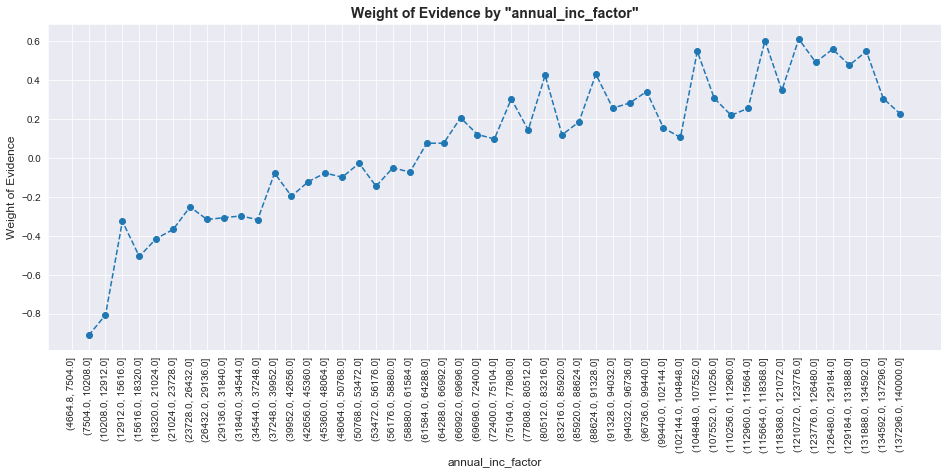

In [175]:
plot_by_woe(df_Con_Woe_IV_ann_inc,90)

- WoE is monotonically increase with income, so we split income in 10 equal categories, each with width of 15k.
- It also means The higher the Annual Income give lower probability of default (the higher the probability of being good borrower)

In [176]:
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

### `mths _since_last_delinq`

The number of months since the borrower's last delinquency.

In [177]:
#Remember step from general preprocessing. We've got a lot of null values in this feature
print(f"Null : {df_inputs_prepr['mths_since_last_delinq'].isnull().sum()}")
print(f"Not Null : {(len(df_inputs_prepr['mths_since_last_delinq']))-(df_inputs_prepr['mths_since_last_delinq'].isnull().sum())}")

Null : 50166
Not Null : 43091


In [178]:
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
288564  29755527   32278795      11000        11000          11000.0   
213591   1343334    1588314      30000        30000          30000.0   
165001   3293168    4066358      15000        15000          14900.0   
82511    7637853    9319845      10000        10000          10000.0   
97373    6918092    8560078      10925        10925          10925.0   
...          ...        ...        ...          ...              ...   
347179  19666709   21889461      30750        30750          30750.0   
132254   5605578    6987794       8000         8000           8000.0   
63372    7954599    9676752       9600         9600           9600.0   
436344  11727018   13699199       3425         3425           3425.0   
296284  29023401   31546575      24000        24000          24000.0   

              term  int_rate  installment grade sub_grade  ...  \
288564   60 months     20.99       297.53     E        E4  ...   
213591   36 months     14.65      1034.83     C        C2  ...   
165001   36 months      8.90       476.30     A        A5  ...   
82511    36 months     16.20       352.56     C        C4  ...   
97373    60 months     22.20       302.99     E        E4  ...   
...            ...       ...          ...   ...       ...  ...   
347179   36 months     15.61      1075.17     D        D1  ...   
132254   36 months     18.75       292.24     D        D3  ...   
63372    36 months     13.67       326.57     B        B5  ...   
436344   36 months     16.59       121.42     D        D1  ...   
296284   60 months     10.15       511.71     B        B2  ...   

       annual_inc:30K-40K annual_inc:40K-50K annual_inc:50K-60K  \
288564                  0                  0                  1   
213591                  0                  0                  0   
165001                  0                  0                  0   
82511                   0                  1                  0   
97373                   0                  1                  0   
...                   ...                ...                ...   
347179                  0                  0                  0   
132254                  0                  1                  0   
63372                   0                  0                  1   
436344                  0                  0                  0   
296284                  0                  0                  0   

        annual_inc:60K-70K annual_inc:70K-80K annual_inc:80K-90K  \
288564                   0                  0                  0   
213591                   0                  0                  0   
165001                   0                  0                  1   
82511                    0                  0                  0   
97373                    0                  0                  0   
...                    ...                ...                ...   
347179                   1                  0                  0   
132254                   0                  0                  0   
63372                    0                  0                  0   
436344                   1                  0                  0   
296284                   0                  0                  0   

       annual_inc:90K-100K annual_inc:100K-120K annual_inc:120K-140K  \
288564                   0                    0                    0   
213591                   0                    0                    0   
165001                   0                    0                    0   
82511                    0                    0                    0   
97373                    0                    0                    0   
...                    ...                  ...                  ...   
347179                   0                    0                    0   
132254                   0                    0                    0   
63372                    0                    0                    0   
436344        

In [179]:
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'],50)
df_inputs_prepr_temp['mths_since_last_delinq_factor']

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


288564    (-0.17, 3.4]
213591    (40.8, 44.2]
165001    (37.4, 40.8]
82511     (10.2, 13.6]
97373     (71.4, 74.8]
              ...     
347179    (10.2, 13.6]
132254     (6.8, 10.2]
63372     (30.6, 34.0]
436344    (23.8, 27.2]
296284    (57.8, 61.2]
Name: mths_since_last_delinq_factor, Length: 43091, dtype: category
Categories (50, interval[float64]): [(-0.17, 3.4] < (3.4, 6.8] < (6.8, 10.2] < (10.2, 13.6] ... (156.4, 159.8] < (159.8, 163.2] < (163.2, 166.6] < (166.6, 170.0]]

In [180]:
df_Con_Woe_IV_mths_since_last_delinq = Woe_IV_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_Con_Woe_IV_mths_since_last_delinq

mths_since_last_delinq_factor  n_obs  prop_good  prop_bad  prop_n_obs  \
0                   (-0.17, 3.4]   1348   0.868694  0.131306    3.128263   
1                     (3.4, 6.8]   1890   0.880423  0.119577    4.386067   
2                    (6.8, 10.2]   3373   0.887044  0.112956    7.827621   
3                   (10.2, 13.6]   2496   0.895833  0.104167    5.792393   
4                   (13.6, 17.0]   3165   0.884044  0.115956    7.344921   
5                   (17.0, 20.4]   2282   0.893076  0.106924    5.295769   
6                   (20.4, 23.8]   2115   0.898345  0.101655    4.908217   
7                   (23.8, 27.2]   2755   0.895463  0.104537    6.393446   
8                   (27.2, 30.6]   1929   0.896319  0.103681    4.476573   
9                   (30.6, 34.0]   2453   0.891969  0.108031    5.692604   
10                  (34.0, 37.4]   1786   0.904255  0.095745    4.144717   
11                  (37.4, 40.8]   1765   0.887819  0.112181    4.095983   
12                  (40.8, 44.2]   2270   0.876211  0.123789    5.267921   
13                  (44.2, 47.6]   1664   0.899038  0.100962    3.861595   
14                  (47.6, 51.0]   1739   0.888442  0.111558    4.035645   
15                  (51.0, 54.4]   1158   0.887737  0.112263    2.687336   
16                  (54.4, 57.8]   1130   0.911504  0.088496    2.622357   
17                  (57.8, 61.2]   1423   0.895994  0.104006    3.302314   
18                  (61.2, 64.6]   1015   0.887685  0.112315    2.355480   
19                  (64.6, 68.0]   1342   0.891952  0.108048    3.114339   
20                  (68.0, 71.4]    930   0.884946  0.115054    2.158223   
21                  (71.4, 74.8]    928   0.889009  0.110991    2.153582   
22                  (74.8, 78.2]   1195   0.907950  0.092050    2.773201   
23                  (78.2, 81.6]    768   0.880208  0.119792    1.782275   
24                  (81.6, 85.0]    136   0.897059  0.102941    0.315611   
25                  (85.0, 88.4]     10   1.000000  0.000000    0.023207   
26                  (88.4, 91.8]      1   1.000000  0.000000    0.002321   
27                  (91.8, 95.2]      2   1.000000  0.000000    0.004641   
28                  (95.2, 98.6]      3   0.666667  0.333333    0.006962   
29                 (98.6, 102.0]      4   1.000000  0.000000    0.009283   
30                (102.0, 105.4]      2   1.000000  0.000000    0.004641   
31                (105.4, 108.8]      3   1.000000  0.000000    0.006962   
32                (108.8, 112.2]      1   1.000000  0.000000    0.002321   
33                (112.2, 115.6]      1   1.000000  0.000000    0.002321   
34                (115.6, 119.0]      2   1.000000  0.000000    0.004641   
35                (119.0, 122.4]      2   1.000000  0.000000    0.004641   
36                (122.4, 125.8]      1   1.000000  0.000000    0.002321   
37                (125.8, 129.2]      0        NaN       NaN    0.000000   
38                (129.2, 132.6]      1   1.000000  0.000000    0.002321   
39                (132.6, 136.0]      1   1.000000  0.000000    0.002321   
40                (136.0, 139.4]      0        NaN       NaN    0.000000   
41                (139.4, 142.8]      0        NaN       NaN    0.000000   
42                (142.8, 146.2]      1   1.000000  0.000000    0.002321   
43                (146.2, 149.6]      0        NaN       NaN    0.000000   
44                (149.6, 153.0]      0        NaN       NaN    0.000000   
45                (153.0, 156.4]      0        NaN       NaN    0.000000   
46                (156.4, 159.8]      0        NaN       NaN    0.000000   
47                (159.8, 163.2]      0        NaN       NaN    0.000000   
48                (163.2, 166.6]      0        NaN       NaN    0.000000   
49                (166.6, 170.0]      1   1.000000  0.000000    0.002321   

    n_good  n_bad  prop_n_good  prop_n_bad       WoE        IV  sum_IV  
0   1171.0  177.0     3.050115    3.766759 -0.211036 

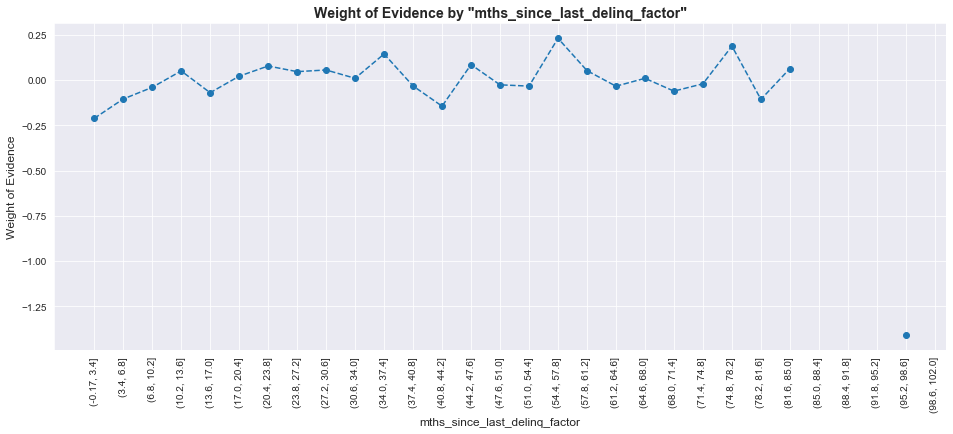

In [181]:
plot_by_woe(df_Con_Woe_IV_mths_since_last_delinq,90)

In [182]:
# Categories: Missing
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)

#0-3
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
#4-30
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
#31-56
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
#>=57
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

### `dti`

A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [183]:
df_inputs_prepr['dti'].unique()

array([ 9.32, 24.19, 13.34, ..., 37.86, 36.4 , 36.91])

In [184]:
df_inputs_prepr['dti'].nunique()

3864

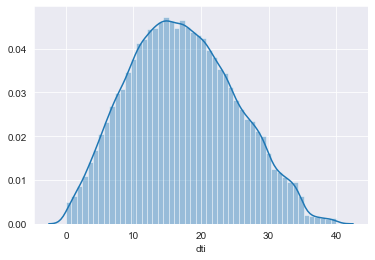

In [185]:
sns.distplot(df_inputs_prepr['dti'])

In [186]:
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 50)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [187]:
# pd.set_option('display.max_rows',None)
df_Con_Woe_IV_dti = Woe_IV_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
df_Con_Woe_IV_dti

dti_factor  n_obs  prop_good  prop_bad  prop_n_obs  n_good  n_bad  \
0       (-0.04, 0.8]    371   0.886792  0.113208    0.397825   329.0   42.0   
1         (0.8, 1.6]    478   0.899582  0.100418    0.512562   430.0   48.0   
2       (1.6, 2.399]    639   0.902973  0.097027    0.685203   577.0   62.0   
3     (2.399, 3.199]    808   0.912129  0.087871    0.866423   737.0   71.0   
4     (3.199, 3.999]   1047   0.916905  0.083095    1.122704   960.0   87.0   
5     (3.999, 4.799]   1260   0.912698  0.087302    1.351105  1150.0  110.0   
6     (4.799, 5.599]   1527   0.912901  0.087099    1.637411  1394.0  133.0   
7     (5.599, 6.398]   1730   0.905202  0.094798    1.855089  1566.0  164.0   
8     (6.398, 7.198]   1999   0.919960  0.080040    2.143539  1839.0  160.0   
9     (7.198, 7.998]   2227   0.908846  0.091154    2.388024  2024.0  203.0   
10    (7.998, 8.798]   2299   0.909526  0.090474    2.465230  2091.0  208.0   
11    (8.798, 9.598]   2590   0.907336  0.092664    2.777271  2350.0  240.0   
12   (9.598, 10.397]   2800   0.912143  0.087857    3.002456  2554.0  246.0   
13  (10.397, 11.197]   3076   0.907672  0.092328    3.298412  2792.0  284.0   
14  (11.197, 11.997]   3151   0.903205  0.096795    3.378835  2846.0  305.0   
15  (11.997, 12.797]   3326   0.901383  0.098617    3.566488  2998.0  328.0   
16  (12.797, 13.597]   3331   0.909937  0.090063    3.571850  3031.0  300.0   
17  (13.597, 14.396]   3431   0.897115  0.102885    3.679080  3078.0  353.0   
18  (14.396, 15.196]   3528   0.896259  0.103741    3.783094  3162.0  366.0   
19  (15.196, 15.996]   3447   0.899333  0.100667    3.696237  3100.0  347.0   
20  (15.996, 16.796]   3342   0.897367  0.102633    3.583645  2999.0  343.0   
21  (16.796, 17.596]   3478   0.890454  0.109546    3.729479  3097.0  381.0   
22  (17.596, 18.395]   3351   0.899731  0.100269    3.593296  3015.0  336.0   
23  (18.395, 19.195]   3266   0.891304  0.108696    3.502150  2911.0  355.0   
24  (19.195, 19.995]   3209   0.885011  0.114989    3.441029  2840.0  369.0   
25  (19.995, 20.795]   3168   0.883838  0.116162    3.397064  2800.0  368.0   
26  (20.795, 21.595]   2960   0.881757  0.118243    3.174024  2610.0  350.0   
27  (21.595, 22.394]   2846   0.875615  0.124385    3.051782  2492.0  354.0   
28  (22.394, 23.194]   2637   0.866894  0.133106    2.827670  2286.0  351.0   
29  (23.194, 23.994]   2565   0.871345  0.128655    2.750464  2235.0  330.0   
30  (23.994, 24.794]   2329   0.873336  0.126664    2.497400  2034.0  295.0   
31  (24.794, 25.594]   2106   0.865147  0.134853    2.258276  1822.0  284.0   
32  (25.594, 26.393]   1957   0.862034  0.137966    2.098502  1687.0  270.0   
33  (26.393, 27.193]   1785   0.866667  0.133333    1.914065  1547.0  238.0   
34  (27.193, 27.993]   1753   0.871078  0.128922    1.879752  1527.0  226.0   
35  (27.993, 28.793]   1575   0.862222  0.137778    1.688881  1358.0  217.0   
36  (28.793, 29.593]   1492   0.866622  0.133378    1.599880  1293.0  199.0   
37  (29.593, 30.392]   1203   0.857855  0.142145    1.289984  1032.0  171.0   
38  (30.392, 31.192]    931   0.862513  0.137487    0.998316   803.0  128.0   
39  (31.192, 31.992]    874   0.862700  0.137300    0.937195   754.0  120.0   
40  (31.992, 32.792]    797   0.855709  0.144291    0.854628   682.0  115.0   
41  (32.792, 33.592]    718   0.862117  0.137883    0.769915   619.0   99.0   
42  (33.592, 34.391]    704   0.859375  0.140625    0.754903   605.0   99.0   
43  (34.391, 35.191]    471   0.872611  0.127389    0.505056   411.0   60.0   
44  (35.191, 35.991]    148   0.912162  0.087838    0.158701   135.0   13.0   
45  (35.991, 36.791]    135   0.866667  0.133333    0.144761   117.0   18.0   
46  (36.791, 37.591]    110   0.936364  0.063636    0.117954   103.0    7.0   
47   (37.591, 38.39]     99   0.868687  0.131313    0.106158    86.0   13.0   
48    (38.39, 39.19]     82   0.841463  0.158537    0.087929    69.0   13.0   
49    (39.19, 39.99]    101   0.891089  0.108911    0.108303

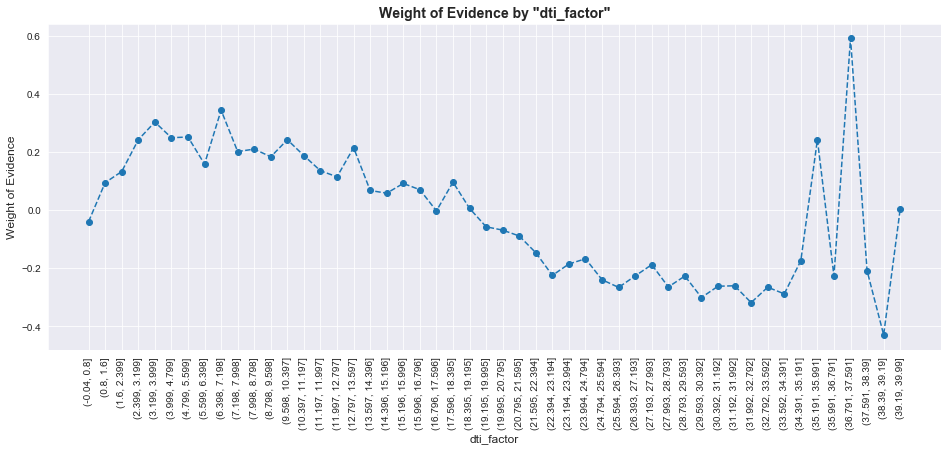

In [188]:
plot_by_woe(df_Con_Woe_IV_dti,90)

In [189]:
#<4.0
df_inputs_prepr['dti:<4'] = np.where((df_inputs_prepr['dti'] < 4.00), 1, 0)
#4.0-8.797
df_inputs_prepr['dti:4.00-8.798'] = np.where((df_inputs_prepr['dti'] >= 4.00) & (df_inputs_prepr['dti'] <= 8.798), 1, 0)
#8.798-13.597
df_inputs_prepr['dti:8.799-13.597'] = np.where((df_inputs_prepr['dti'] > 8.798) & (df_inputs_prepr['dti'] <= 13.597), 1, 0)
#13.598-16.796
df_inputs_prepr['dti:13.598-16.796'] = np.where((df_inputs_prepr['dti'] > 13.597) & (df_inputs_prepr['dti'] <= 16.796), 1, 0)
#16.797-26.393
df_inputs_prepr['dti:16.797-26.393'] = np.where((df_inputs_prepr['dti'] > 16.796) & (df_inputs_prepr['dti'] <= 26.393), 1, 0)
#26.394-31.992
df_inputs_prepr['dti:26.394-31.992'] = np.where((df_inputs_prepr['dti'] > 26.393) & (df_inputs_prepr['dti'] <= 31.992), 1, 0)
#>31.992
df_inputs_prepr['dti:>31.992'] = np.where((df_inputs_prepr['dti'] > 31.992), 1, 0)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

### `mths_since_last_record`

The number of months since the last public record.

In [190]:
#Contin a lot of null
df_inputs_prepr['mths_since_last_record'].isnull().sum()

80686

In [191]:
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]

df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [192]:
df_Con_Woe_IV_mths_since_last_record = Woe_IV_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_Con_Woe_IV_mths_since_last_record

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


mths_since_last_record_factor  n_obs  prop_good  prop_bad  prop_n_obs  \
0                 (-0.129, 2.58]    244   0.741803  0.258197    1.940975   
1                   (2.58, 5.16]     36   0.888889  0.111111    0.286373   
2                   (5.16, 7.74]     39   0.923077  0.076923    0.310238   
3                  (7.74, 10.32]     66   0.939394  0.060606    0.525018   
4                  (10.32, 12.9]     42   0.833333  0.166667    0.334102   
5                  (12.9, 15.48]     69   0.869565  0.130435    0.548882   
6                 (15.48, 18.06]     95   0.863158  0.136842    0.755708   
7                 (18.06, 20.64]     58   0.965517  0.034483    0.461379   
8                 (20.64, 23.22]    101   0.891089  0.108911    0.803436   
9                  (23.22, 25.8]     94   0.946809  0.053191    0.747753   
10                 (25.8, 28.38]    135   0.896296  0.103704    1.073900   
11                (28.38, 30.96]    103   0.922330  0.077670    0.819346   
12                (30.96, 33.54]    196   0.923469  0.076531    1.559144   
13                (33.54, 36.12]    195   0.907692  0.092308    1.551189   
14                 (36.12, 38.7]    166   0.909639  0.090361    1.320500   
15                 (38.7, 41.28]    234   0.905983  0.094017    1.861427   
16                (41.28, 43.86]    194   0.896907  0.103093    1.543234   
17                (43.86, 46.44]    328   0.917683  0.082317    2.609180   
18                (46.44, 49.02]    367   0.920981  0.079019    2.919418   
19                 (49.02, 51.6]    231   0.943723  0.056277    1.837563   
20                 (51.6, 54.18]    447   0.926174  0.073826    3.555803   
21                (54.18, 56.76]    264   0.897727  0.102273    2.100072   
22                (56.76, 59.34]    393   0.928753  0.071247    3.126243   
23                (59.34, 61.92]    287   0.909408  0.090592    2.283032   
24                 (61.92, 64.5]    405   0.920988  0.079012    3.221701   
25                 (64.5, 67.08]    394   0.961929  0.038071    3.134198   
26                (67.08, 69.66]    272   0.893382  0.106618    2.163710   
27                (69.66, 72.24]    366   0.912568  0.087432    2.911463   
28                (72.24, 74.82]    231   0.922078  0.077922    1.837563   
29                 (74.82, 77.4]    350   0.920000  0.080000    2.784186   
30                 (77.4, 79.98]    228   0.903509  0.096491    1.813698   
31                (79.98, 82.56]    355   0.895775  0.104225    2.823960   
32                (82.56, 85.14]    288   0.916667  0.083333    2.290987   
33                (85.14, 87.72]    251   0.816733  0.183267    1.996659   
34                 (87.72, 90.3]    345   0.889855  0.110145    2.744412   
35                 (90.3, 92.88]    249   0.843373  0.156627    1.980749   
36                (92.88, 95.46]    385   0.862338  0.137662    3.062604   
37                (95.46, 98.04]    401   0.877805  0.122195    3.189881   
38               (98.04, 100.62]    327   0.871560  0.128440    2.601225   
39               (100.62, 103.2]    526   0.884030  0.115970    4.184234   
40               (103.2, 105.78]    396   0.891414  0.108586    3.150107   
41              (105.78, 108.36]    565   0.886726  0.113274    4.494471   
42              (108.36, 110.94]    407   0.911548  0.088452    3.237610   
43              (110.94, 113.52]    524   0.883588  0.116412    4.168324   
44               (113.52, 116.1]    515   0.908738  0.091262    4.096731   
45               (116.1, 118.68]    314   0.882166  0.117834    2.497812   
46              (118.68, 121.26]     92   0.847826  0.152174    0.731843   
47              (121.26, 123.84]      0        NaN       NaN    0.000000   
48              (123.84, 126.42]      0        NaN       NaN    0.000000   
49               (126.42, 129.0]      1   0.000000  1.000000    0.007955   

    n_good  n_bad  prop_n_good  prop_n_bad       WoE            IV  sum_IV  
0    181.0   63.0     1.603615    4.906542 -1.118

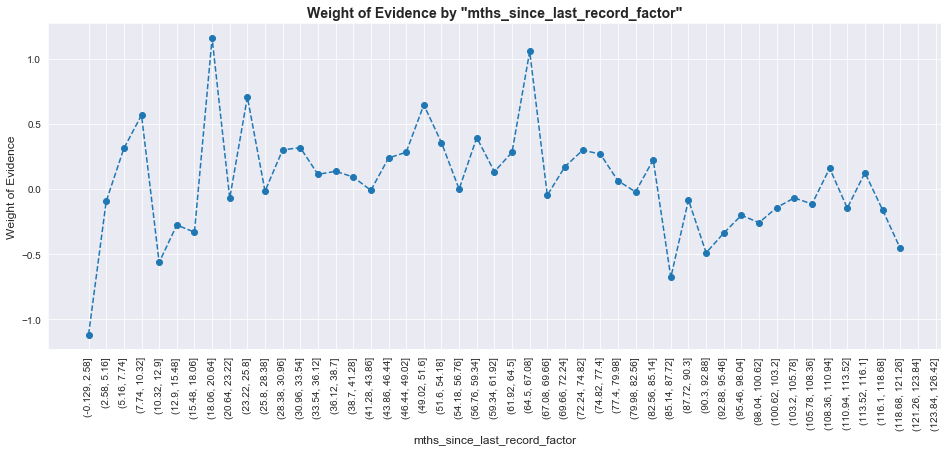

In [193]:
plot_by_woe(df_Con_Woe_IV_mths_since_last_record,90)

In [194]:
# Categories: 'Missing'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)

#'0-2'
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
#'3-20'
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
#'21-31'
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
#'32-80'
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
#'81-86'
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
#'>86'
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

## Final Data

In [195]:
# #Train data
# loan_data_inputs_train = df_inputs_prepr
# loan_data_targets_train = df_targets_prepr

# loan_data_inputs_train.to_csv('X_train.csv')
# loan_data_targets_train.to_csv('y_train.csv')

In [196]:
# Do exactly same data preprocessing to `test data` 
# Step: change variable df_inputs_prepr as X_test, also for targets==y_test
# Rerun the code for Woe,Coarse & Fine Classing
# Save into csv

In [197]:
# #Test data
# loan_data_inputs_test = df_inputs_prepr
# loan_data_targets_test = df_targets_prepr

# loan_data_inputs_test.to_csv('X_test.csv')
# loan_data_targets_test.to_csv('y_test.csv')

In [202]:
or_col = ['id', 'member_id', 'loan_amnt',  'funded_amnt_inv', 'sub_grade', 'emp_title', 'loan_status', 'pymnt_plan', 
          'url', 'desc',  'title', 'zip_code', 'revol_bal', 'revol_util', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 
          'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 
          'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 
          'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 
          'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 
          'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 
          'open_rv_24m', 'max_bal_bc', 'all_util',  'inq_fi', 'total_cu_tl', 'inq_last_12m']

In [215]:
not_include = loan_data[or_col]
not_include.head()

id  member_id  loan_amnt  funded_amnt_inv sub_grade  \
0  1077501    1296599       5000           4975.0        B2   
1  1077430    1314167       2500           2500.0        C4   
2  1077175    1313524       2400           2400.0        C5   
3  1076863    1277178      10000          10000.0        C1   
4  1075358    1311748       3000           3000.0        B5   

                  emp_title  loan_status pymnt_plan  \
0                       NaN   Fully Paid          n   
1                     Ryder  Charged Off          n   
2                       NaN   Fully Paid          n   
3       AIR RESOURCES BOARD   Fully Paid          n   
4  University Medical Group      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc  ... mths_since_rcnt_il  \
0    Borrower added on 12/22/11 > I need to upgra...  ...                NaN   
1    Borrower added on 12/22/11 > I plan to use t...  ...                NaN   
2                                                NaN  ...                NaN   
3    Borrower added on 12/21/11 > to pay for prop...  ...                NaN   
4    Borrower added on 12/21/11 > I plan on combi...  ...                NaN   

  total_bal_il  il_util  open_rv_12m  open_rv_24m  max_bal_bc  all_util  \
0          NaN      NaN          NaN          NaN         NaN       NaN   
1          NaN      NaN          NaN          NaN         NaN       NaN   
2          NaN      NaN          NaN          NaN         NaN       NaN   
3          NaN      NaN          NaN          NaN         NaN       NaN   
4          NaN      NaN          NaN          NaN         NaN       NaN   

   inq_fi  total_cu_tl  inq_last_12m  
0     NaN          NaN           NaN  
1     NaN          NaN           NaN  
2     NaN          NaN           NaN  
3     NaN          NaN           NaN  
4     NaN          NaN           NaN  

[5 rows x 50 columns]

In [216]:
not_include = pd.concat([not_include, loan_data['good_bad']],axis=1)
not_include.head()

id  member_id  loan_amnt  funded_amnt_inv sub_grade  \
0  1077501    1296599       5000           4975.0        B2   
1  1077430    1314167       2500           2500.0        C4   
2  1077175    1313524       2400           2400.0        C5   
3  1076863    1277178      10000          10000.0        C1   
4  1075358    1311748       3000           3000.0        B5   

                  emp_title  loan_status pymnt_plan  \
0                       NaN   Fully Paid          n   
1                     Ryder  Charged Off          n   
2                       NaN   Fully Paid          n   
3       AIR RESOURCES BOARD   Fully Paid          n   
4  University Medical Group      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc  ... total_bal_il  \
0    Borrower added on 12/22/11 > I need to upgra...  ...          NaN   
1    Borrower added on 12/22/11 > I plan to use t...  ...          NaN   
2                                                NaN  ...          NaN   
3    Borrower added on 12/21/11 > to pay for prop...  ...          NaN   
4    Borrower added on 12/21/11 > I plan on combi...  ...          NaN   

  il_util  open_rv_12m  open_rv_24m  max_bal_bc  all_util  inq_fi  \
0     NaN          NaN          NaN         NaN       NaN     NaN   
1     NaN          NaN          NaN         NaN       NaN     NaN   
2     NaN          NaN          NaN         NaN       NaN     NaN   
3     NaN          NaN          NaN         NaN       NaN     NaN   
4     NaN          NaN          NaN         NaN       NaN     NaN   

   total_cu_tl  inq_last_12m  good_bad  
0          NaN           NaN         1  
1          NaN           NaN         0  
2          NaN           NaN         1  
3          NaN           NaN         1  
4          NaN           NaN         1  

[5 rows x 51 columns]

In [204]:
not_include.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt_inv              466285 non-null  float64
 4   sub_grade                    466285 non-null  object 
 5   emp_title                    438697 non-null  object 
 6   loan_status                  466285 non-null  object 
 7   pymnt_plan                   466285 non-null  object 
 8   url                          466285 non-null  object 
 9   desc                         125983 non-null  object 
 10  title                        466265 non-null  object 
 11  zip_code                     466285 non-null  object 
 12  revol_bal                    466285 non-null  int64  
 13 

In [211]:
not_include.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt_inv                     0
sub_grade                           0
emp_title                       27588
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           340302
title                              20
zip_code                            0
revol_bal                           0
revol_util                        340
out_prncp                           0
out_prncp_inv                       0
total_pymnt                         0
total_pymnt_inv                     0
total_rec_prncp                     0
total_rec_int                       0
total_rec_late_fee                  0
recoveries                          0
collection_recovery_fee             0
last_pymnt_d                      376
last_pymnt_amnt                     0
next_pymnt_d                   227214
last_credit_

In [219]:
not_include.corr()['good_bad'].sort_values(ascending=False)

good_bad                       1.000000
total_rec_prncp                0.253875
total_pymnt_inv                0.195169
total_pymnt                    0.194438
last_pymnt_amnt                0.168030
out_prncp                      0.158676
out_prncp_inv                  0.158662
member_id                      0.096759
id                             0.095883
tot_cur_bal                    0.051197
total_rec_int                  0.026726
revol_bal                      0.018348
collections_12_mths_ex_med     0.005114
mths_since_last_major_derog    0.003873
tot_coll_amt                   0.001209
funded_amnt_inv               -0.007191
loan_amnt                     -0.011819
revol_util                    -0.050207
total_rec_late_fee            -0.147750
collection_recovery_fee       -0.299227
recoveries                    -0.441171
policy_code                         NaN
annual_inc_joint                    NaN
dti_joint                           NaN
verification_status_joint           NaN
